In [2]:
import os

# List all files in your Jupyter Notebook directory
print("Current Directory:", os.getcwd())
print("Files and Folders:", os.listdir())


Current Directory: /home/jovyan/Low Wage Industries
Files and Folders: ['Group Project', 'data', 'Merged_Industry_Data.csv', '.git', '.ipynb_checkpoints', 'Low Wgae Industries Map.ipynb', 'Low_Wage_Industries_Map.html', 'week02', 'README.md', 'Untitled.ipynb', 'California_Counties.geojson']


In [3]:
import pandas as pd

# ✅ Use the exact file path
file_path = "Merged_Industry_Data.csv"  # Since you're already in 'Low Wage Industries'
industry_df = pd.read_csv(file_path)

# ✅ Check if data loads correctly
print(industry_df.head())


         County  Quarterly Avg Employment  (2024 1st Q)  \
0       Alameda                                   842.0   
1         Butte                                    83.0   
2  Contra Costa                                   417.0   
3     El Dorado                                    27.0   
4        Fresno                                   783.0   

   Quarterly Avg Employment  (2023 1st Q)  \
0                                   822.0   
1                                    47.0   
2                                   395.0   
3                                    51.0   
4                                   974.0   

   Quarterly Avg Employment  (2022 1st Q)  \
0                                   885.0   
1                                    55.0   
2                                   472.0   
3                                     NaN   
4                                  1000.0   

   Quarterly Avg Employment  (2021 1st Q)  \
0                                   734.0   
1            

In [6]:
import folium
import geopandas as gpd
import pandas as pd
from folium.plugins import FeatureGroupSubGroup
from branca.colormap import linear

# ✅ Load the merged industry dataset
file_path = "Merged_Industry_Data.csv"  # Update with the correct path
industry_df = pd.read_csv(file_path)

# ✅ Load the California Counties GeoJSON
geojson_path = "California_Counties.geojson"  # Ensure this path is correct
ca_counties = gpd.read_file(geojson_path)

# ✅ Standardize county names for merging
ca_counties["County"] = ca_counties["NAME"].str.strip().str.lower()
industry_df["County"] = industry_df["County"].str.strip().str.lower()

# ✅ Merge industry data with county boundaries
merged_gdf = ca_counties.merge(industry_df, on="County", how="left")

# ✅ Ensure the employment column is numeric
merged_gdf["Quarterly Avg Employment  (2024 1st Q)"] = pd.to_numeric(
    merged_gdf["Quarterly Avg Employment  (2024 1st Q)"], errors="coerce"
)

# ✅ Fill missing values with 0
merged_gdf["Quarterly Avg Employment  (2024 1st Q)"].fillna(0, inplace=True)

# ✅ Get min and max values for the color scale
metric_min = merged_gdf["Quarterly Avg Employment  (2024 1st Q)"].min()
metric_max = merged_gdf["Quarterly Avg Employment  (2024 1st Q)"].max()

# ✅ Ensure min ≠ max to prevent an invalid scale
if metric_min == metric_max:
    metric_min = 0
    metric_max += 1

# ✅ Define color scale (light green to dark green)
colormap = linear.Greens_09.scale(metric_min, metric_max).to_step(10)

# ✅ Function to create the interactive map
def create_choropleth_map(merged_gdf):
    m = folium.Map(location=[37.5, -119.5], zoom_start=6, tiles="cartodb positron")

    # ✅ Create industry groups for toggling
    for industry in merged_gdf["Industry"].unique():
        industry_group = folium.FeatureGroup(name=industry, show=False)
        industry_data = merged_gdf[merged_gdf["Industry"] == industry]

        folium.GeoJson(
            industry_data,
            style_function=lambda feature: {
                "fillColor": colormap(feature["properties"].get("Quarterly Avg Employment  (2024 1st Q)", 0)),
                "color": "black",
                "weight": 1,
                "fillOpacity": 0.7,
            },
            tooltip=folium.GeoJsonTooltip(
                fields=["NAME"] + list(merged_gdf.columns[2:]),  # Show all columns for the selected industry
                aliases=["County"] + list(merged_gdf.columns[2:])  # Labels for tooltip
            ),
        ).add_to(industry_group)

        industry_group.add_to(m)  # Add industry layer to the map

    # ✅ Add color legend
    colormap.add_to(m)

    # ✅ Add checkboxes for industries
    folium.LayerControl(collapsed=False).add_to(m)

    return m

# ✅ Generate the new map
new_map = create_choropleth_map(merged_gdf)

# ✅ Display the map
new_map


/tmp/ipykernel_229/1526605861.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_gdf["Quarterly Avg Employment  (2024 1st Q)"].fillna(0, inplace=True)


AssertionError: The field NAME is not available in the data. Choose from: ().

In [7]:
from IPython.display import display

display(new_map)


AssertionError: The field NAME is not available in the data. Choose from: ().

In [8]:
import folium
import geopandas as gpd
import pandas as pd
from folium.plugins import FeatureGroupSubGroup
from branca.colormap import linear

# ✅ Load the merged industry dataset
file_path = "Merged_Industry_Data.csv"  # Update with the correct path
industry_df = pd.read_csv(file_path)

# ✅ Load the California Counties GeoJSON
geojson_path = "California_Counties.geojson"  # Ensure this path is correct
ca_counties = gpd.read_file(geojson_path)

# ✅ Standardize county names for merging
ca_counties["County"] = ca_counties["NAME"].str.strip().str.lower()
industry_df["County"] = industry_df["County"].str.strip().str.lower()

# ✅ Merge industry data with county boundaries
merged_gdf = ca_counties.merge(industry_df, on="County", how="left")

# ✅ Check if the 'NAME' column exists after merging
print("Columns in merged_gdf:", merged_gdf.columns)

# ✅ Ensure the employment column is numeric
merged_gdf["Quarterly Avg Employment  (2024 1st Q)"] = pd.to_numeric(
    merged_gdf["Quarterly Avg Employment  (2024 1st Q)"], errors="coerce"
)

# ✅ Fill missing values properly
merged_gdf["Quarterly Avg Employment  (2024 1st Q)"] = merged_gdf["Quarterly Avg Employment  (2024 1st Q)"].fillna(0)

# ✅ Get min and max values for the color scale
metric_min = merged_gdf["Quarterly Avg Employment  (2024 1st Q)"].min()
metric_max = merged_gdf["Quarterly Avg Employment  (2024 1st Q)"].max()

# ✅ Ensure min ≠ max to prevent an invalid scale
if metric_min == metric_max:
    metric_min = 0
    metric_max += 1

# ✅ Define color scale (light green to dark green)
colormap = linear.Greens_09.scale(metric_min, metric_max).to_step(10)

# ✅ Function to create the interactive map
def create_choropleth_map(merged_gdf):
    m = folium.Map(location=[37.5, -119.5], zoom_start=6, tiles="cartodb positron")

    # ✅ Create industry groups for toggling
    for industry in merged_gdf["Industry"].unique():
        industry_group = folium.FeatureGroup(name=industry, show=False)
        industry_data = merged_gdf[merged_gdf["Industry"] == industry]

        folium.GeoJson(
            industry_data,
            style_function=lambda feature: {
                "fillColor": colormap(feature["properties"].get("Quarterly Avg Employment  (2024 1st Q)", 0)),
                "color": "black",
                "weight": 1,
                "fillOpacity": 0.7,
            },
            tooltip=folium.GeoJsonTooltip(
                fields=["County"] + list(merged_gdf.columns[2:]),  # Show all columns for the selected industry
                aliases=["County"] + list(merged_gdf.columns[2:])  # Labels for tooltip
            ),
        ).add_to(industry_group)

        industry_group.add_to(m)  # Add industry layer to the map

    # ✅ Add color legend
    colormap.add_to(m)

    # ✅ Add checkboxes for industries
    folium.LayerControl(collapsed=False).add_to(m)

    return m

# ✅ Generate the new map
new_map = create_choropleth_map(merged_gdf)

# ✅ Display the map
new_map


Columns in merged_gdf: Index(['OBJECTID', 'NAME', 'STATE_NAME', 'STATE_FIPS', 'CNTY_FIPS', 'FIPS',
       'Shape__Area', 'Shape__Length', 'geometry', 'County',
       'Quarterly Avg Employment  (2024 1st Q)',
       'Quarterly Avg Employment  (2023 1st Q)',
       'Quarterly Avg Employment  (2022 1st Q)',
       'Quarterly Avg Employment  (2021 1st Q)',
       'Quarterly Avg Employment  (2020 1st Q)',
       'Difference in Employment  2020-2024', '2024 Avg Yearly Wage',
       '2023 Avg Yearly Wage', '2022 Avg Yearly Wage', '2021 Avg Yearly Wage',
       '2020 Avg Yearly Wage', 'Difference in Wages 1st Q 2020-2024',
       '2024 Total Establishments', '2023 Total Establishments',
       '2022 Total Establishments', '2021 Total Establishments',
       '2020 Total Establishments',
       'Difference  in Total Establishments  1st Q 2020-2024',
       'Statewide sum Difference In Employment 2020-2024',
       'Avg Difference In Wages Statewide 2020-2024',
       'Statewide sum Difference I

AssertionError: The field County is not available in the data. Choose from: ().

In [9]:
# ✅ Check the column names of both datasets before merging
print("Columns in ca_counties:", ca_counties.columns)
print("Columns in industry_df:", industry_df.columns)

# ✅ Check for missing county names
print("Missing counties in industry data:", set(ca_counties["County"]) - set(industry_df["County"]))
print("Missing counties in GeoJSON:", set(industry_df["County"]) - set(ca_counties["County"]))

# ✅ Print a sample after merging
print("Columns in merged_gdf:", merged_gdf.columns)
print("First rows of merged_gdf:\n", merged_gdf.head())


Columns in ca_counties: Index(['OBJECTID', 'NAME', 'STATE_NAME', 'STATE_FIPS', 'CNTY_FIPS', 'FIPS',
       'Shape__Area', 'Shape__Length', 'geometry', 'County'],
      dtype='object')
Columns in industry_df: Index(['County', 'Quarterly Avg Employment  (2024 1st Q)',
       'Quarterly Avg Employment  (2023 1st Q)',
       'Quarterly Avg Employment  (2022 1st Q)',
       'Quarterly Avg Employment  (2021 1st Q)',
       'Quarterly Avg Employment  (2020 1st Q)',
       'Difference in Employment  2020-2024', '2024 Avg Yearly Wage',
       '2023 Avg Yearly Wage', '2022 Avg Yearly Wage', '2021 Avg Yearly Wage',
       '2020 Avg Yearly Wage', 'Difference in Wages 1st Q 2020-2024',
       '2024 Total Establishments', '2023 Total Establishments',
       '2022 Total Establishments', '2021 Total Establishments',
       '2020 Total Establishments',
       'Difference  in Total Establishments  1st Q 2020-2024',
       'Statewide sum Difference In Employment 2020-2024',
       'Avg Difference In Wage

In [10]:
# ✅ Standardize county names in ca_counties (remove " county" from the end)
ca_counties["County"] = ca_counties["NAME"].str.strip().str.lower().str.replace(" county", "", regex=True)

# ✅ Standardize county names in industry_df
industry_df["County"] = industry_df["County"].str.strip().str.lower()

# ✅ Merge industry data with county boundaries (now names should match)
merged_gdf = ca_counties.merge(industry_df, on="County", how="left")

# ✅ Debugging check: Print counties that are still missing
missing_counties_after_merge = set(ca_counties["County"]) - set(merged_gdf["County"])
print("Missing counties after merging:", missing_counties_after_merge)


Missing counties after merging: set()


In [ ]:
import folium
import geopandas as gpd
import pandas as pd
from folium.plugins import FeatureGroupSubGroup
from branca.colormap import linear

# ✅ Load the merged industry dataset
file_path = "Merged_Industry_Data.csv"  # Update with your actual path
industry_df = pd.read_csv(file_path)

# ✅ Load the California Counties GeoJSON
geojson_path = "California_Counties.geojson"  # Ensure this path is correct
ca_counties = gpd.read_file(geojson_path)

# ✅ Standardize county names in both datasets
ca_counties["County"] = ca_counties["NAME"].str.strip().str.lower().str.replace(" county", "", regex=True)
industry_df["County"] = industry_df["County"].str.strip().str.lower()

# ✅ Merge industry data with county boundaries
merged_gdf = ca_counties.merge(industry_df, on="County", how="left")

# ✅ Ensure the employment column is numeric
merged_gdf["Quarterly Avg Employment  (2024 1st Q)"] = pd.to_numeric(
    merged_gdf["Quarterly Avg Employment  (2024 1st Q)"], errors="coerce"
)

# ✅ Fill missing values properly
merged_gdf["Quarterly Avg Employment  (2024 1st Q)"] = merged_gdf["Quarterly Avg Employment  (2024 1st Q)"].fillna(0)

# ✅ Get min and max values for the color scale
metric_min = merged_gdf["Quarterly Avg Employment  (2024 1st Q)"].min()
metric_max = merged_gdf["Quarterly Avg Employment  (2024 1st Q)"].max()

# ✅ Ensure min ≠ max to prevent an invalid scale
if metric_min == metric_max:
    metric_min = 0
    metric_max += 1

# ✅ Define color scale (light green to dark green)
colormap = linear.Greens_09.scale(metric_min, metric_max).to_step(10)

# ✅ Function to create the interactive map
def create_choropleth_map(merged_gdf):
    m = folium.Map(location=[37.5, -119.5], zoom_start=6, tiles="cartodb positron")

    # ✅ Create industry groups for toggling
    for industry in merged_gdf["Industry"].dropna().unique():
        industry_group = folium.FeatureGroup(name=industry, show=False)
        industry_data = merged_gdf[merged_gdf["Industry"] == industry]

        folium.GeoJson(
            industry_data,
            style_function=lambda feature: {
                "fillColor": colormap(feature["properties"].get("Quarterly Avg Employment  (2024 1st Q)", 0)),
                "color": "black",
                "weight": 1,
                "fillOpacity": 0.7,
            },
            tooltip=folium.GeoJsonTooltip(
                fields=["County"] + list(industry_df.columns[1:]),  # Show all industry metrics
                aliases=["County"] + list(industry_df.columns[1:])  # Labels for tooltip
            ),
        ).add_to(industry_group)

        industry_group.add_to(m)  # Add industry layer to the map

    # ✅ Add color legend
    colormap.add_to(m)

    # ✅ Add checkboxes for industries
    folium.LayerControl(collapsed=False).add_to(m)

    return m

# ✅ Generate the new map
new_map = create_choropleth_map(merged_gdf)

# ✅ Display the map
new_map


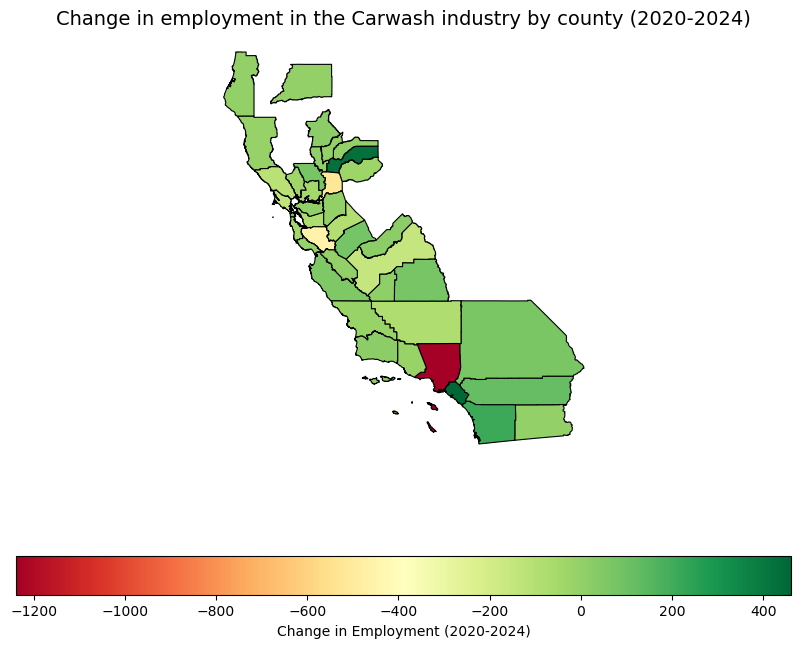

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# ✅ Load the industry dataset
file_path = "Merged_Industry_Data.csv"  # Update with your actual path
industry_df = pd.read_csv(file_path)

# ✅ Load the California Counties GeoJSON
geojson_path = "California_Counties.geojson"  # Ensure this path is correct
ca_counties = gpd.read_file(geojson_path)

# ✅ Standardize county names in both datasets
ca_counties["County"] = ca_counties["NAME"].str.strip().str.lower().str.replace(" county", "", regex=True)
industry_df["County"] = industry_df["County"].str.strip().str.lower()

# ✅ Merge industry data with county boundaries
merged_gdf = ca_counties.merge(industry_df, on="County", how="left")

# ✅ Ensure numeric values
merged_gdf["Difference in Employment  2020-2024"] = pd.to_numeric(
    merged_gdf["Difference in Employment  2020-2024"], errors="coerce"
).fillna(0)

# ✅ Filter data for one industry (Carwash)
industry_name = "Carwash"
industry_data = merged_gdf[merged_gdf["Industry"] == industry_name]

# ✅ Create the static map
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
industry_data.plot(column="Difference in Employment  2020-2024",
                   cmap="RdYlGn",  # Red = decline, Green = increase
                   linewidth=0.8,
                   edgecolor="black",
                   legend=True,
                   legend_kwds={'label': "Change in Employment (2020-2024)", "orientation": "horizontal"},
                   ax=ax)

# ✅ Add title and remove axes
ax.set_title(f"Change in employment in the {industry_name} industry by county (2020-2024)", fontsize=14)
ax.set_axis_off()

# ✅ Show the map
plt.show()


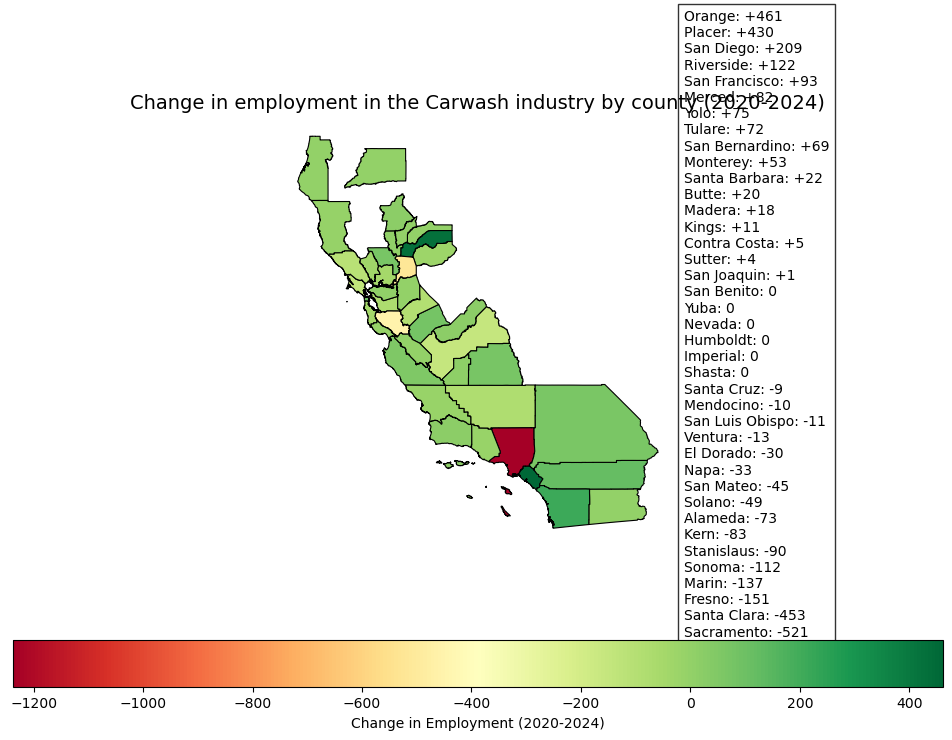

In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# ✅ Load the industry dataset
file_path = "Merged_Industry_Data.csv"  # Update with your actual path
industry_df = pd.read_csv(file_path)

# ✅ Load the California Counties GeoJSON
geojson_path = "California_Counties.geojson"  # Ensure this path is correct
ca_counties = gpd.read_file(geojson_path)

# ✅ Standardize county names in both datasets
ca_counties["County"] = ca_counties["NAME"].str.strip().str.lower().str.replace(" county", "", regex=True)
industry_df["County"] = industry_df["County"].str.strip().str.lower()

# ✅ Merge industry data with county boundaries
merged_gdf = ca_counties.merge(industry_df, on="County", how="left")

# ✅ Ensure numeric values
metric_col = "Difference in Employment  2020-2024"
merged_gdf[metric_col] = pd.to_numeric(merged_gdf[metric_col], errors="coerce").fillna(0)

# ✅ Filter data for one industry (Carwash)
industry_name = "Carwash"
industry_data = merged_gdf[merged_gdf["Industry"] == industry_name]

# ✅ Sort counties by metric value
sorted_data = industry_data[["County", metric_col]].sort_values(by=metric_col, ascending=False)

# ✅ Format county labels with + or - signs
sorted_data["Formatted"] = sorted_data.apply(lambda row: f"{row['County'].title()}: {'+' if row[metric_col] > 0 else ''}{int(row[metric_col])}", axis=1)
county_text = "\n".join(sorted_data["Formatted"])

# ✅ Create the static map
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
industry_data.plot(column=metric_col,
                   cmap="RdYlGn",  # Red = decline, Green = increase
                   linewidth=0.8,
                   edgecolor="black",
                   legend=True,
                   legend_kwds={'label': "Change in Employment (2020-2024)", "orientation": "horizontal"},
                   ax=ax)

# ✅ Add title and remove axes
ax.set_title(f"Change in employment in the {industry_name} industry by county (2020-2024)", fontsize=14)
ax.set_axis_off()

# ✅ Add county text box on the right
plt.text(1.02, 0.5, county_text, transform=ax.transAxes, fontsize=10, va="center", ha="left",
         bbox=dict(facecolor='white', alpha=0.8, edgecolor="black"))

# ✅ Show the map
plt.show()


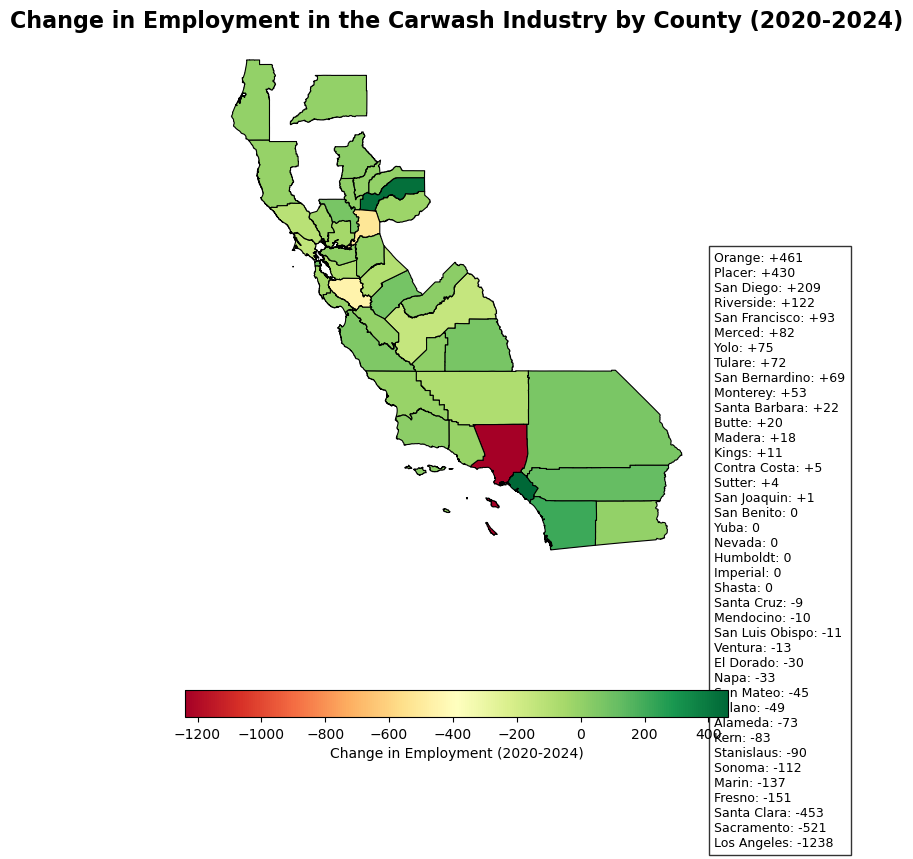

In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# ✅ Load the industry dataset
file_path = "Merged_Industry_Data.csv"  # Update with your actual path
industry_df = pd.read_csv(file_path)

# ✅ Load the California Counties GeoJSON
geojson_path = "California_Counties.geojson"  # Ensure this path is correct
ca_counties = gpd.read_file(geojson_path)

# ✅ Standardize county names in both datasets
ca_counties["County"] = ca_counties["NAME"].str.strip().str.lower().str.replace(" county", "", regex=True)
industry_df["County"] = industry_df["County"].str.strip().str.lower()

# ✅ Merge industry data with county boundaries
merged_gdf = ca_counties.merge(industry_df, on="County", how="left")

# ✅ Ensure numeric values
metric_col = "Difference in Employment  2020-2024"
merged_gdf[metric_col] = pd.to_numeric(merged_gdf[metric_col], errors="coerce").fillna(0)

# ✅ Filter data for one industry (Carwash)
industry_name = "Carwash"
industry_data = merged_gdf[merged_gdf["Industry"] == industry_name]

# ✅ Sort counties by metric value
sorted_data = industry_data[["County", metric_col]].sort_values(by=metric_col, ascending=False)

# ✅ Format county labels with + or - signs
sorted_data["Formatted"] = sorted_data.apply(lambda row: f"{row['County'].title()}: {'+' if row[metric_col] > 0 else ''}{int(row[metric_col])}", axis=1)
county_text = "\n".join(sorted_data["Formatted"])

# ✅ Create the static map with a larger map and smaller list
fig, ax = plt.subplots(1, 1, figsize=(14, 10))  # Increased size for better balance

industry_data.plot(column=metric_col,
                   cmap="RdYlGn",  # Red = decline, Green = increase
                   linewidth=0.8,
                   edgecolor="black",
                   legend=True,
                   legend_kwds={'label': "Change in Employment (2020-2024)", 
                                "orientation": "horizontal", 
                                "shrink": 0.5},  # 🔹 Smaller color ramp
                   ax=ax)

# ✅ Bold title
ax.set_title(f"Change in Employment in the {industry_name} Industry by County (2020-2024)", 
             fontsize=16, fontweight="bold")

# ✅ Remove axes for a cleaner look
ax.set_axis_off()

# ✅ Adjust county list position & font size
plt.text(1.02, 0.6, county_text, transform=ax.transAxes, fontsize=9, va="top", ha="left",
         bbox=dict(facecolor='white', alpha=0.8, edgecolor="black"))

# ✅ Show the map
plt.show()


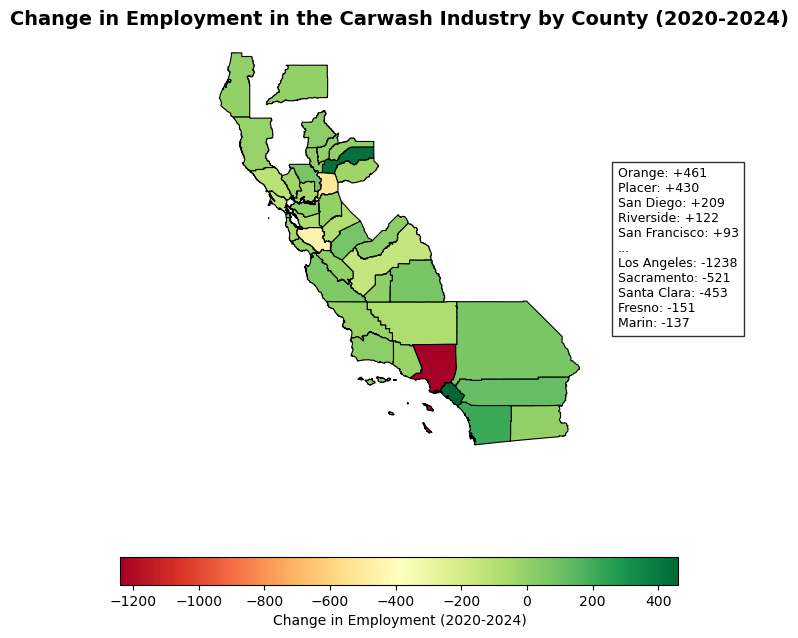

In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# ✅ Load the industry dataset
file_path = "Merged_Industry_Data.csv"  # Update with your actual path
industry_df = pd.read_csv(file_path)

# ✅ Load the California Counties GeoJSON
geojson_path = "California_Counties.geojson"  # Ensure this path is correct
ca_counties = gpd.read_file(geojson_path)

# ✅ Standardize county names in both datasets
ca_counties["County"] = ca_counties["NAME"].str.strip().str.lower().str.replace(" county", "", regex=True)
industry_df["County"] = industry_df["County"].str.strip().str.lower()

# ✅ Merge industry data with county boundaries
merged_gdf = ca_counties.merge(industry_df, on="County", how="left")

# ✅ Ensure numeric values
metric_col = "Difference in Employment  2020-2024"
merged_gdf[metric_col] = pd.to_numeric(merged_gdf[metric_col], errors="coerce").fillna(0)

# ✅ Filter data for one industry (Carwash)
industry_name = "Carwash"
industry_data = merged_gdf[merged_gdf["Industry"] == industry_name]

# ✅ Sort counties by metric value (descending for increases, ascending for decreases)
top_increases = industry_data.nlargest(5, metric_col)[["County", metric_col]]
top_decreases = industry_data.nsmallest(5, metric_col)[["County", metric_col]]

# ✅ Format county labels with + or - signs
top_increases["Formatted"] = top_increases.apply(lambda row: f"{row['County'].title()}: +{int(row[metric_col])}", axis=1)
top_decreases["Formatted"] = top_decreases.apply(lambda row: f"{row['County'].title()}: {int(row[metric_col])}", axis=1)

# ✅ Combine top 10 counties
county_text = "\n".join(list(top_increases["Formatted"]) + ["..."] + list(top_decreases["Formatted"]))

# ✅ Create the static map with **better element sizing**
fig, ax = plt.subplots(1, 1, figsize=(12, 8))  # Well-balanced size

industry_data.plot(column=metric_col,
                   cmap="RdYlGn",  # Red = decline, Green = increase
                   linewidth=0.8,
                   edgecolor="black",
                   legend=True,
                   legend_kwds={'label': "Change in Employment (2020-2024)", 
                                "orientation": "horizontal", 
                                "shrink": 0.6},  # 🔹 Balanced color ramp size
                   ax=ax)

# ✅ Bold title with slight increase in size
ax.set_title(f"Change in Employment in the {industry_name} Industry by County (2020-2024)", 
             fontsize=14, fontweight="bold")

# ✅ Remove axes for a cleaner look
ax.set_axis_off()

# ✅ Adjust county list position, **limit number of items displayed**
plt.text(1.05, 0.5, county_text, transform=ax.transAxes, fontsize=9, va="center", ha="left",
         bbox=dict(facecolor='white', alpha=0.8, edgecolor="black"))

# ✅ Show the map
plt.show()


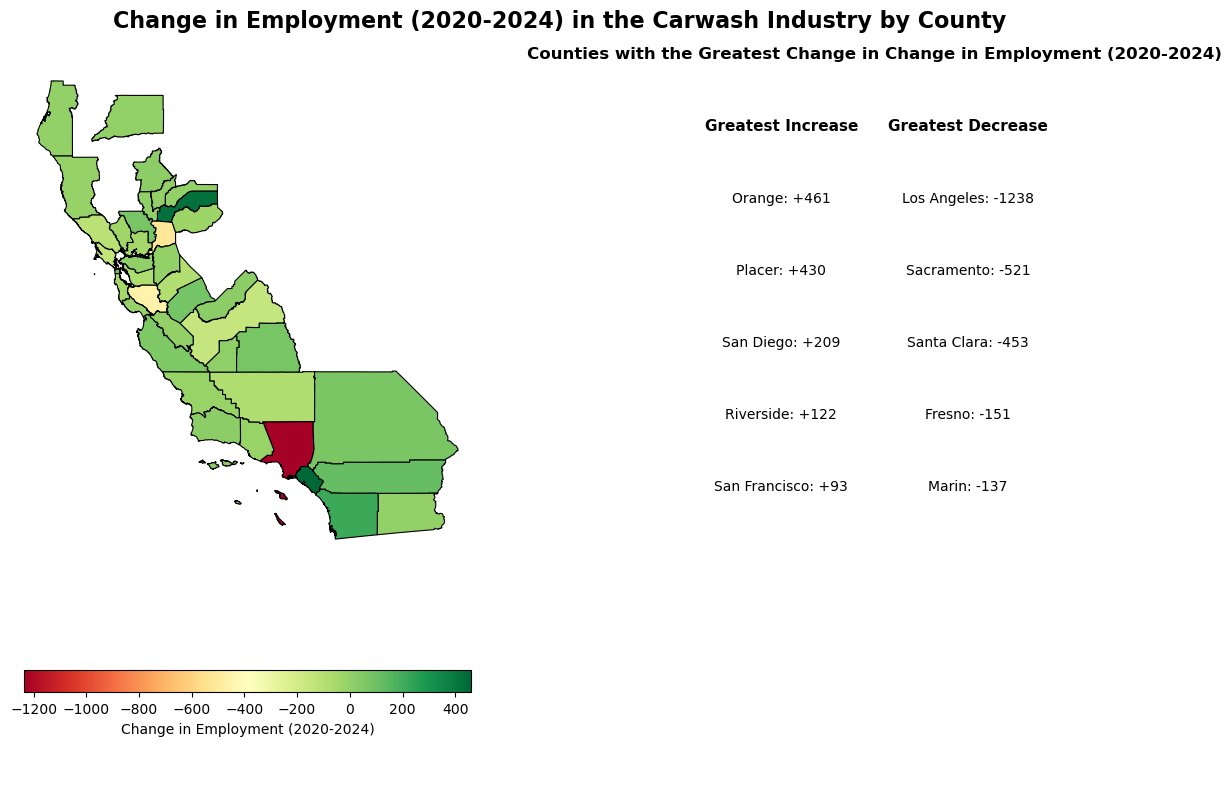

In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# ✅ Load the industry dataset
file_path = "Merged_Industry_Data.csv"  # Update with your actual path
industry_df = pd.read_csv(file_path)

# ✅ Load the California Counties GeoJSON
geojson_path = "California_Counties.geojson"  # Ensure this path is correct
ca_counties = gpd.read_file(geojson_path)

# ✅ Standardize county names in both datasets
ca_counties["County"] = ca_counties["NAME"].str.strip().str.lower().str.replace(" county", "", regex=True)
industry_df["County"] = industry_df["County"].str.strip().str.lower()

# ✅ Merge industry data with county boundaries
merged_gdf = ca_counties.merge(industry_df, on="County", how="left")

# ✅ Ensure numeric values
metric_col = "Difference in Employment  2020-2024"
metric_title = "Change in Employment (2020-2024)"  # Used for the title
merged_gdf[metric_col] = pd.to_numeric(merged_gdf[metric_col], errors="coerce").fillna(0)

# ✅ Filter data for one industry (Carwash)
industry_name = "Carwash"
industry_data = merged_gdf[merged_gdf["Industry"] == industry_name]

# ✅ Sort counties by metric value (descending for increases, ascending for decreases)
top_increases = industry_data.nlargest(5, metric_col)[["County", metric_col]]
top_decreases = industry_data.nsmallest(5, metric_col)[["County", metric_col]]

# ✅ Format county labels with + or - signs
top_increases["Formatted"] = top_increases.apply(lambda row: f"{row['County'].title()}: +{int(row[metric_col])}", axis=1)
top_decreases["Formatted"] = top_decreases.apply(lambda row: f"{row['County'].title()}: {int(row[metric_col])}", axis=1)

# ✅ Create the static map with **better layout**
fig, ax = plt.subplots(1, 2, figsize=(14, 8), gridspec_kw={"width_ratios": [2, 1]})  # 🔹 Adjust layout to shift the map left

# ✅ Plot the map on the left
industry_data.plot(column=metric_col,
                   cmap="RdYlGn",  # Red = decline, Green = increase
                   linewidth=0.8,
                   edgecolor="black",
                   legend=True,
                   legend_kwds={'label': metric_title, "orientation": "horizontal", "shrink": 0.6},
                   ax=ax[0])

# ✅ Bold title centered above both sections
fig.suptitle(f"{metric_title} in the {industry_name} Industry by County", fontsize=16, fontweight="bold")

ax[0].set_axis_off()  # Remove axis from map

# ✅ Create the data table on the right
ax[1].set_axis_off()  # No axes for clean layout

# ✅ Display title for the data box
ax[1].text(0.5, 1.0, f"Counties with the Greatest Change in {metric_title}", fontsize=12, fontweight="bold", ha="center")

# ✅ Display column titles
ax[1].text(0.25, 0.9, "Greatest Increase", fontsize=11, fontweight="bold", ha="center")
ax[1].text(0.75, 0.9, "Greatest Decrease", fontsize=11, fontweight="bold", ha="center")

# ✅ List the counties
for i, (inc, dec) in enumerate(zip(top_increases["Formatted"], top_decreases["Formatted"])):
    ax[1].text(0.25, 0.8 - (i * 0.1), inc, fontsize=10, ha="center")
    ax[1].text(0.75, 0.8 - (i * 0.1), dec, fontsize=10, ha="center")

# ✅ Show the map
plt.tight_layout()
plt.show()


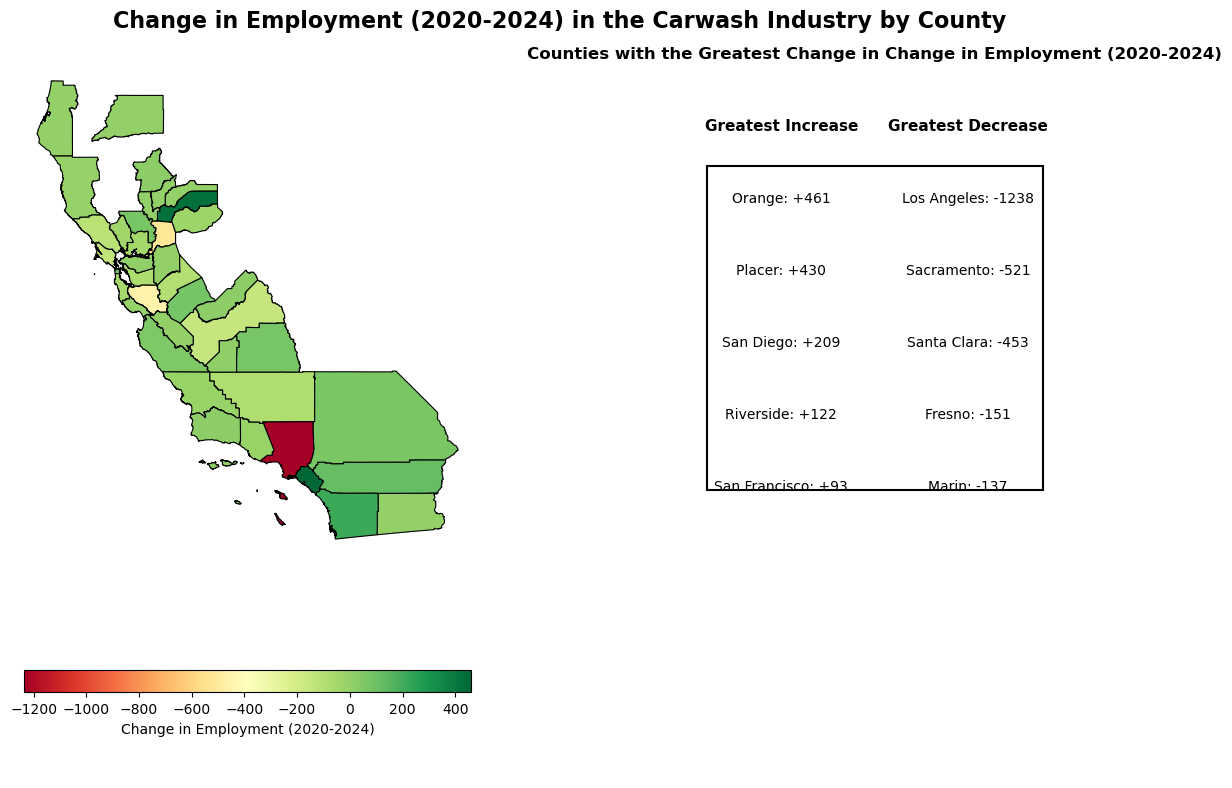

In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# ✅ Load the industry dataset
file_path = "Merged_Industry_Data.csv"  # Update with your actual path
industry_df = pd.read_csv(file_path)

# ✅ Load the California Counties GeoJSON
geojson_path = "California_Counties.geojson"  # Ensure this path is correct
ca_counties = gpd.read_file(geojson_path)

# ✅ Standardize county names in both datasets
ca_counties["County"] = ca_counties["NAME"].str.strip().str.lower().str.replace(" county", "", regex=True)
industry_df["County"] = industry_df["County"].str.strip().str.lower()

# ✅ Merge industry data with county boundaries
merged_gdf = ca_counties.merge(industry_df, on="County", how="left")

# ✅ Ensure numeric values
metric_col = "Difference in Employment  2020-2024"
metric_title = "Change in Employment (2020-2024)"
merged_gdf[metric_col] = pd.to_numeric(merged_gdf[metric_col], errors="coerce").fillna(0)

# ✅ Filter data for one industry (Carwash)
industry_name = "Carwash"
industry_data = merged_gdf[merged_gdf["Industry"] == industry_name]

# ✅ Sort counties by metric value (descending for increases, ascending for decreases)
top_increases = industry_data.nlargest(5, metric_col)[["County", metric_col]]
top_decreases = industry_data.nsmallest(5, metric_col)[["County", metric_col]]

# ✅ Format county labels with + or - signs
top_increases["Formatted"] = top_increases.apply(lambda row: f"{row['County'].title()}: +{int(row[metric_col])}", axis=1)
top_decreases["Formatted"] = top_decreases.apply(lambda row: f"{row['County'].title()}: {int(row[metric_col])}", axis=1)

# ✅ Create a structured text box for county changes
county_text = f"**Counties with the Greatest Change in {metric_title}**\n\n"
county_text += "**Greatest Increase** | **Greatest Decrease**\n"
county_text += "--- | ---\n"
for inc, dec in zip(top_increases["Formatted"], top_decreases["Formatted"]):
    county_text += f"{inc} | {dec}\n"

# ✅ Create the static map with **final balanced layout**
fig, ax = plt.subplots(1, 2, figsize=(14, 8), gridspec_kw={"width_ratios": [2, 1]})  # 🔹 Well-balanced layout

# ✅ Plot the map on the left
industry_data.plot(column=metric_col,
                   cmap="RdYlGn",  # Red = decline, Green = increase
                   linewidth=0.8,
                   edgecolor="black",
                   legend=True,
                   legend_kwds={'label': metric_title, "orientation": "horizontal", "shrink": 0.6},
                   ax=ax[0])

# ✅ Bold title centered above both sections
fig.suptitle(f"{metric_title} in the {industry_name} Industry by County", fontsize=16, fontweight="bold")

ax[0].set_axis_off()  # Remove axis from map

# ✅ Create a formatted table-like text box on the right
ax[1].set_axis_off()  # No axes for clean layout

# ✅ Display title for the data box
ax[1].text(0.5, 1.0, f"Counties with the Greatest Change in {metric_title}", fontsize=12, fontweight="bold", ha="center")

# ✅ Display column titles
ax[1].text(0.25, 0.9, "Greatest Increase", fontsize=11, fontweight="bold", ha="center")
ax[1].text(0.75, 0.9, "Greatest Decrease", fontsize=11, fontweight="bold", ha="center")

# ✅ List the counties inside a clean box
for i, (inc, dec) in enumerate(zip(top_increases["Formatted"], top_decreases["Formatted"])):
    ax[1].text(0.25, 0.8 - (i * 0.1), inc, fontsize=10, ha="center")
    ax[1].text(0.75, 0.8 - (i * 0.1), dec, fontsize=10, ha="center")

# ✅ Draw a surrounding box for better visibility
box_x = 0.05
box_y = 0.85
box_width = 0.9
box_height = 0.45
ax[1].add_patch(plt.Rectangle((box_x, box_y - box_height), box_width, box_height, 
                              edgecolor="black", facecolor="white", lw=1.5, transform=ax[1].transAxes))

# ✅ Show the map
plt.tight_layout()
plt.show()


In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as patches
from matplotlib.scalebar import ScaleBar

# ✅ Load the industry dataset
file_path = "Merged_Industry_Data.csv"  # Update with your actual path
industry_df = pd.read_csv(file_path)

# ✅ Load the California Counties GeoJSON
geojson_path = "California_Counties.geojson"  # Ensure this path is correct
ca_counties = gpd.read_file(geojson_path)

# ✅ Standardize county names in both datasets
ca_counties["County"] = ca_counties["NAME"].str.strip().str.lower().str.replace(" county", "", regex=True)
industry_df["County"] = industry_df["County"].str.strip().str.lower()

# ✅ Merge industry data with county boundaries
merged_gdf = ca_counties.merge(industry_df, on="County", how="left")

# ✅ Ensure numeric values & handle missing data
metric_col = "Difference in Employment  2020-2024"
metric_title = "Change in Employment (2020-2024)"
merged_gdf[metric_col] = pd.to_numeric(merged_gdf[metric_col], errors="coerce")

# ✅ Assign "No Data" color for missing values
merged_gdf["Has Data"] = merged_gdf[metric_col].notna()
merged_gdf[metric_col].fillna(0, inplace=True)

# ✅ Filter data for one industry (Carwash)
industry_name = "Carwash"
industry_data = merged_gdf[merged_gdf["Industry"] == industry_name]

# ✅ Identify counties with no data
no_data_gdf = merged_gdf[~merged_gdf["Has Data"]]

# ✅ Sort counties by metric value (descending for increases, ascending for decreases)
top_increases = industry_data.nlargest(5, metric_col)[["County", metric_col]]
top_decreases = industry_data.nsmallest(5, metric_col)[["County", metric_col]]

# ✅ Format county labels with + or - signs (Remove excessive spacing)
top_increases["Formatted"] = top_increases.apply(lambda row: f"{row['County'].title()} +{int(row[metric_col])}", axis=1)
top_decreases["Formatted"] = top_decreases.apply(lambda row: f"{row['County'].title()} {int(row[metric_col])}", axis=1)

# ✅ Create the map layout
fig, ax = plt.subplots(1, 2, figsize=(14, 8), gridspec_kw={"width_ratios": [2.5, 1]})  # Well-balanced width

# ✅ Plot the main choropleth map on the left
industry_data.plot(column=metric_col,
                   cmap="RdYlGn",
                   linewidth=0.8,
                   edgecolor="black",
                   legend=True,
                   legend_kwds={'label': metric_title, "orientation": "horizontal", "shrink": 0.6},
                   ax=ax[0])

# ✅ Fill counties with no data in **medium gray**
no_data_gdf.plot(color="lightgray", edgecolor="black", linewidth=0.8, ax=ax[0])

# ✅ Add a **legend entry for "No Data"**
legend_patches = [patches.Patch(color="lightgray", label="No Data")]
ax[0].legend(handles=legend_patches, loc="lower left")

# ✅ Add a **North Arrow**
ax[0].annotate('N', xy=(0.05, 0.92), xycoords='axes fraction',
               fontsize=14, fontweight='bold', ha='center')
ax[0].arrow(0.05, 0.88, 0, 0.05, transform=ax[0].transAxes,
            clip_on=False, head_width=0.015, head_length=0.02, fc='black', ec='black')

# ✅ Add a **Scale Bar**
scalebar = ScaleBar(1, location='lower right', units="miles", scale_loc="bottom")
ax[0].add_artist(scalebar)

ax[0].set_axis_off()  # Remove axis for clean display

# ✅ Create the county data box on the right
ax[1].set_axis_off()  # Remove axes

# 🔹 **Create a surrounding box**
outer_box = patches.Rectangle((-0.05, 0.05), 1.1, 0.9, transform=ax[1].transAxes,
                              edgecolor="black", facecolor="white", lw=2)
ax[1].add_patch(outer_box)

# 🔹 **Create a title box inside the data panel**
title_box = patches.Rectangle((0.05, 0.85), 0.9, 0.1, transform=ax[1].transAxes,
                              edgecolor="black", facecolor="white", lw=1.5)
ax[1].add_patch(title_box)

ax[1].text(0.5, 0.9, f"Counties with the Greatest Change in {metric_title}", fontsize=12, fontweight="bold", ha="center")

# ✅ Display column titles inside the box
ax[1].text(0.25, 0.78, "Greatest Increase", fontsize=11, fontweight="bold", ha="center")
ax[1].text(0.75, 0.78, "Greatest Decrease", fontsize=11, fontweight="bold", ha="center")

# ✅ List the top counties with less spacing
for i, (inc, dec) in enumerate(zip(top_increases["Formatted"], top_decreases["Formatted"])):
    ax[1].text(0.25, 0.70 - (i * 0.08), inc, fontsize=10, ha="center")
    ax[1].text(0.75, 0.70 - (i * 0.08), dec, fontsize=10, ha="center")

# ✅ **Final Box Surrounding All Elements**
plt.gca().add_patch(patches.Rectangle((-0.02, -0.02), 1.04, 1.04, transform=fig.transFigure,
                                      edgecolor="black", facecolor="none", lw=2))

# ✅ Bold **title centered above everything**
fig.suptitle(f"{metric_title} in the {industry_name} Industry by County", fontsize=16, fontweight="bold")

# ✅ Show the final cleaned-up map
plt.tight_layout()
plt.show()


ModuleNotFoundError: No module named 'matplotlib.scalebar'

/tmp/ipykernel_123/2943875.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_gdf[metric_col].fillna(0, inplace=True)


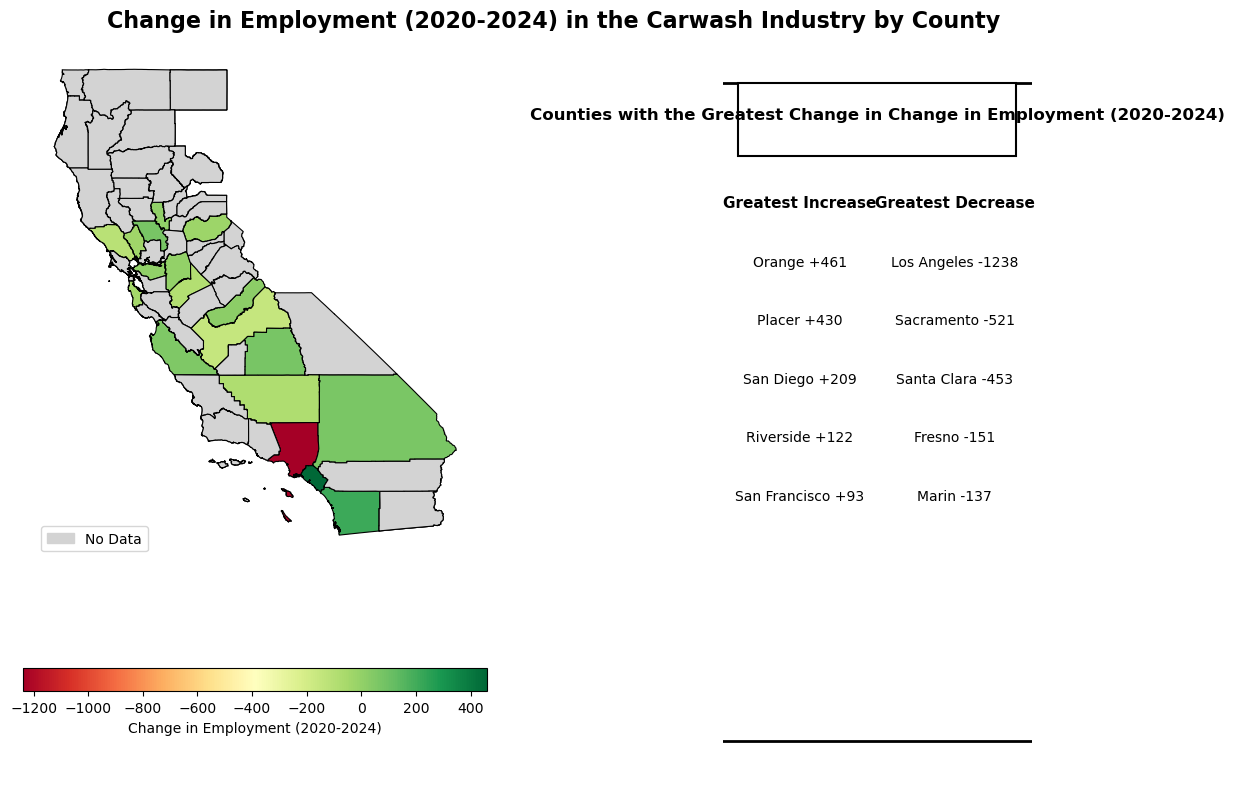

In [10]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as patches

# ✅ Load the industry dataset
file_path = "Merged_Industry_Data.csv"  # Update with your actual path
industry_df = pd.read_csv(file_path)

# ✅ Load the California Counties GeoJSON
geojson_path = "California_Counties.geojson"  # Ensure this path is correct
ca_counties = gpd.read_file(geojson_path)

# ✅ Standardize county names in both datasets
ca_counties["County"] = ca_counties["NAME"].str.strip().str.lower().str.replace(" county", "", regex=True)
industry_df["County"] = industry_df["County"].str.strip().str.lower()

# ✅ Merge industry data with county boundaries
merged_gdf = ca_counties.merge(industry_df, on="County", how="left")

# ✅ Ensure numeric values & handle missing data
metric_col = "Difference in Employment  2020-2024"
metric_title = "Change in Employment (2020-2024)"
merged_gdf[metric_col] = pd.to_numeric(merged_gdf[metric_col], errors="coerce")

# ✅ Assign "No Data" color for missing values
merged_gdf["Has Data"] = merged_gdf[metric_col].notna()
merged_gdf[metric_col].fillna(0, inplace=True)

# ✅ Filter data for one industry (Carwash)
industry_name = "Carwash"
industry_data = merged_gdf[merged_gdf["Industry"] == industry_name]

# ✅ Identify counties with no data
no_data_gdf = merged_gdf[~merged_gdf["Has Data"]]

# ✅ Sort counties by metric value (descending for increases, ascending for decreases)
top_increases = industry_data.nlargest(5, metric_col)[["County", metric_col]]
top_decreases = industry_data.nsmallest(5, metric_col)[["County", metric_col]]

# ✅ Format county labels with + or - signs (Remove excessive spacing)
top_increases["Formatted"] = top_increases.apply(lambda row: f"{row['County'].title()} +{int(row[metric_col])}", axis=1)
top_decreases["Formatted"] = top_decreases.apply(lambda row: f"{row['County'].title()} {int(row[metric_col])}", axis=1)

# ✅ Create the map layout
fig, ax = plt.subplots(1, 2, figsize=(14, 8), gridspec_kw={"width_ratios": [2.5, 1]})  # Well-balanced width

# ✅ Plot the main choropleth map on the left
industry_data.plot(column=metric_col,
                   cmap="RdYlGn",
                   linewidth=0.8,
                   edgecolor="black",
                   legend=True,
                   legend_kwds={'label': metric_title, "orientation": "horizontal", "shrink": 0.6},
                   ax=ax[0])

# ✅ Fill counties with no data in **medium gray**
no_data_gdf.plot(color="lightgray", edgecolor="black", linewidth=0.8, ax=ax[0])

# ✅ Add a **legend entry for "No Data"**
legend_patches = [patches.Patch(color="lightgray", label="No Data")]
ax[0].legend(handles=legend_patches, loc="lower left")

ax[0].set_axis_off()  # Remove axis for clean display

# ✅ Create the county data box on the right
ax[1].set_axis_off()  # Remove axes

# 🔹 **Create a surrounding box**
outer_box = patches.Rectangle((-0.05, 0.05), 1.1, 0.9, transform=ax[1].transAxes,
                              edgecolor="black", facecolor="white", lw=2)
ax[1].add_patch(outer_box)

# 🔹 **Create a title box inside the data panel**
title_box = patches.Rectangle((0.05, 0.85), 0.9, 0.1, transform=ax[1].transAxes,
                              edgecolor="black", facecolor="white", lw=1.5)
ax[1].add_patch(title_box)

ax[1].text(0.5, 0.9, f"Counties with the Greatest Change in {metric_title}", fontsize=12, fontweight="bold", ha="center")

# ✅ Display column titles inside the box
ax[1].text(0.25, 0.78, "Greatest Increase", fontsize=11, fontweight="bold", ha="center")
ax[1].text(0.75, 0.78, "Greatest Decrease", fontsize=11, fontweight="bold", ha="center")

# ✅ List the top counties with less spacing
for i, (inc, dec) in enumerate(zip(top_increases["Formatted"], top_decreases["Formatted"])):
    ax[1].text(0.25, 0.70 - (i * 0.08), inc, fontsize=10, ha="center")
    ax[1].text(0.75, 0.70 - (i * 0.08), dec, fontsize=10, ha="center")

# ✅ **Final Box Surrounding All Elements**
plt.gca().add_patch(patches.Rectangle((-0.02, -0.02), 1.04, 1.04, transform=fig.transFigure,
                                      edgecolor="black", facecolor="none", lw=2))

# ✅ Bold **title centered above everything**
fig.suptitle(f"{metric_title} in the {industry_name} Industry by County", fontsize=16, fontweight="bold")

# ✅ Show the final cleaned-up map
plt.tight_layout()
plt.show()


/tmp/ipykernel_123/1593262501.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_gdf[metric_col].fillna(0, inplace=True)  # Keep 0 for calculation purposes


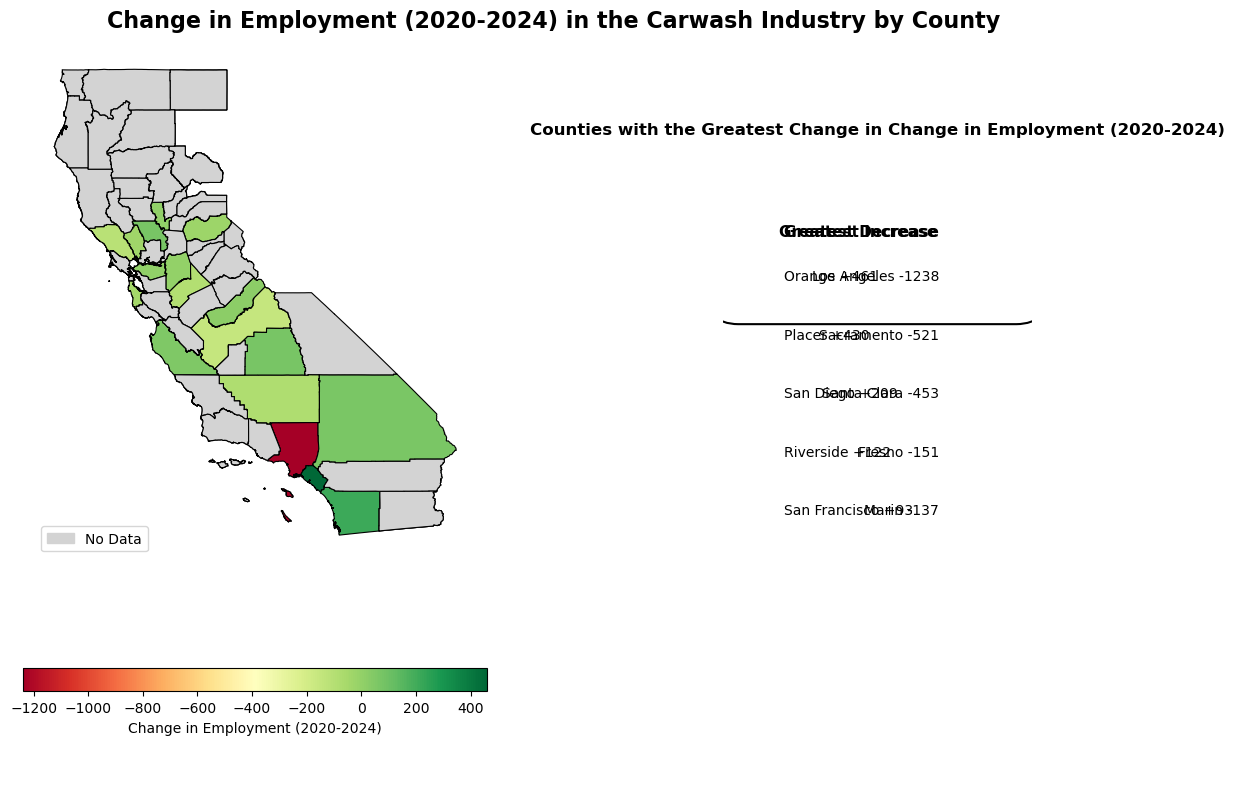

In [11]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as patches

# ✅ Load the industry dataset
file_path = "Merged_Industry_Data.csv"  # Update with your actual path
industry_df = pd.read_csv(file_path)

# ✅ Load the California Counties GeoJSON
geojson_path = "California_Counties.geojson"  # Ensure this path is correct
ca_counties = gpd.read_file(geojson_path)

# ✅ Standardize county names in both datasets
ca_counties["County"] = ca_counties["NAME"].str.strip().str.lower().str.replace(" county", "", regex=True)
industry_df["County"] = industry_df["County"].str.strip().str.lower()

# ✅ Merge industry data with county boundaries
merged_gdf = ca_counties.merge(industry_df, on="County", how="left")

# ✅ Ensure numeric values & handle missing data
metric_col = "Difference in Employment  2020-2024"
metric_title = "Change in Employment (2020-2024)"
merged_gdf[metric_col] = pd.to_numeric(merged_gdf[metric_col], errors="coerce")

# ✅ Make sure we only gray out counties that are TRULY missing from the dataset
merged_gdf["Has Data"] = merged_gdf[metric_col].notna()
merged_gdf[metric_col].fillna(0, inplace=True)  # Keep 0 for calculation purposes
missing_data_gdf = merged_gdf[~merged_gdf["Has Data"]]  # Only counties missing from dataset

# ✅ Filter data for one industry (Carwash)
industry_name = "Carwash"
industry_data = merged_gdf[merged_gdf["Industry"] == industry_name]

# ✅ Sort counties by metric value
top_increases = industry_data.nlargest(5, metric_col)[["County", metric_col]]
top_decreases = industry_data.nsmallest(5, metric_col)[["County", metric_col]]

# ✅ Format county labels with + or - signs
top_increases["Formatted"] = top_increases.apply(lambda row: f"{row['County'].title()} +{int(row[metric_col])}", axis=1)
top_decreases["Formatted"] = top_decreases.apply(lambda row: f"{row['County'].title()} {int(row[metric_col])}", axis=1)

# ✅ Create the map layout
fig, ax = plt.subplots(1, 2, figsize=(14, 8), gridspec_kw={"width_ratios": [2.5, 1]})  # Better proportioning

# ✅ Plot the main choropleth map on the left
industry_data.plot(column=metric_col,
                   cmap="RdYlGn",
                   linewidth=0.8,
                   edgecolor="black",
                   legend=True,
                   legend_kwds={'label': metric_title, "orientation": "horizontal", "shrink": 0.6},
                   ax=ax[0])

# ✅ Fill ONLY counties missing from the dataset in **medium gray**
missing_data_gdf.plot(color="lightgray", edgecolor="black", linewidth=0.8, ax=ax[0])

# ✅ Add a legend entry for "No Data"
legend_patches = [patches.Patch(color="lightgray", label="No Data")]
ax[0].legend(handles=legend_patches, loc="lower left")

ax[0].set_axis_off()  # Remove axis for clean display

# ✅ Create the county data box on the right
ax[1].set_axis_off()  # Remove axes

# ✅ **Fix the surrounding box to look better**
outer_box = patches.FancyBboxPatch((-0.05, 0.05), 1.1, 0.9, transform=ax[1].transAxes,
                                   edgecolor="black", facecolor="white", lw=2, boxstyle="round,pad=0.2")
ax[1].add_patch(outer_box)

# ✅ **Fix the title box to actually be enclosed**
title_box = patches.FancyBboxPatch((0.05, 0.82), 0.9, 0.12, transform=ax[1].transAxes,
                                   edgecolor="black", facecolor="white", lw=1.5, boxstyle="round,pad=0.2")
ax[1].add_patch(title_box)

ax[1].text(0.5, 0.88, f"Counties with the Greatest Change in {metric_title}", fontsize=12, fontweight="bold", ha="center")

# ✅ **Fix column spacing so they aren't cramped**
ax[1].text(0.20, 0.74, "Greatest Increase", fontsize=11, fontweight="bold", ha="left")
ax[1].text(0.70, 0.74, "Greatest Decrease", fontsize=11, fontweight="bold", ha="right")

# ✅ **Tighter, better spaced list of counties**
for i, (inc, dec) in enumerate(zip(top_increases["Formatted"], top_decreases["Formatted"])):
    ax[1].text(0.20, 0.68 - (i * 0.08), inc, fontsize=10, ha="left")
    ax[1].text(0.70, 0.68 - (i * 0.08), dec, fontsize=10, ha="right")

# ✅ **Final Box Around Everything**
plt.gca().add_patch(patches.Rectangle((-0.02, -0.02), 1.04, 1.04, transform=fig.transFigure,
                                      edgecolor="black", facecolor="none", lw=2))

# ✅ Bold **title centered above everything**
fig.suptitle(f"{metric_title} in the {industry_name} Industry by County", fontsize=16, fontweight="bold")

# ✅ Show the final cleaned-up map
plt.tight_layout()
plt.show()


/tmp/ipykernel_123/2733496554.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_gdf[metric_col].fillna(0, inplace=True)  # Keep 0 for calculation purposes


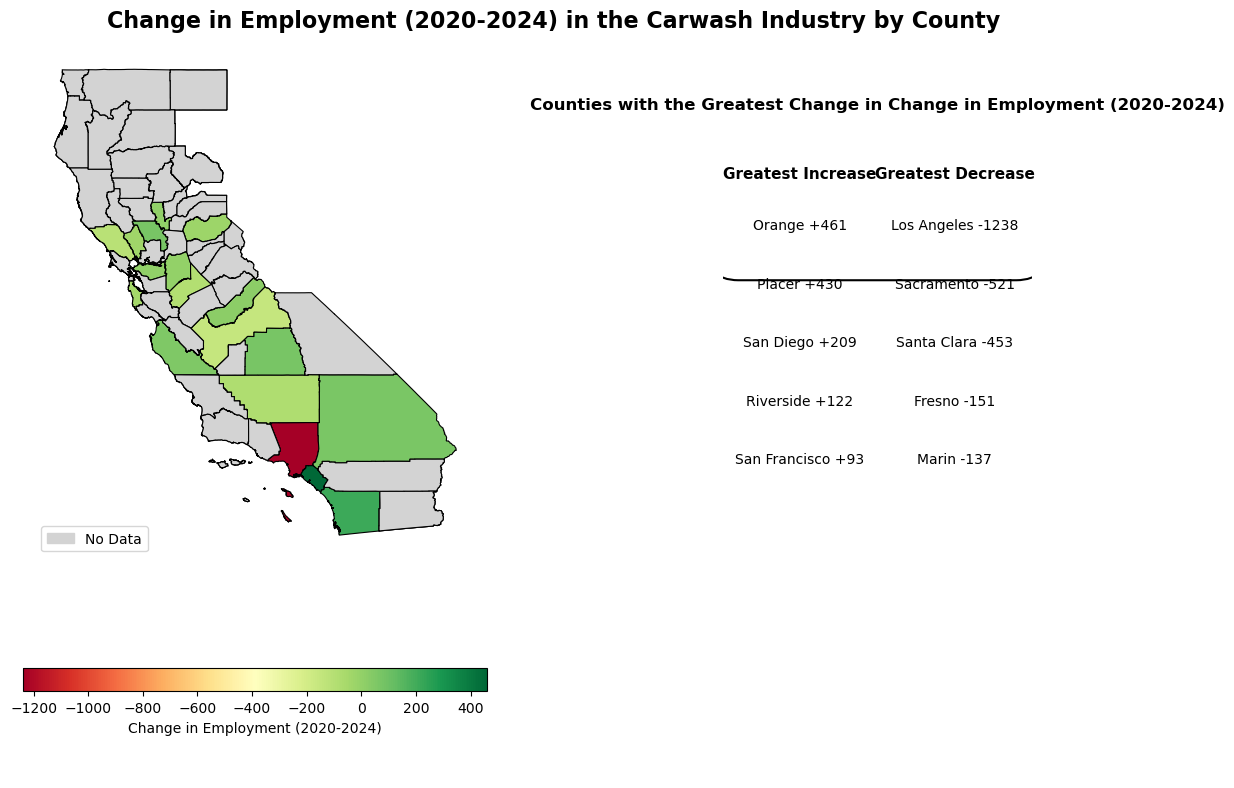

In [12]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as patches

# ✅ Load the industry dataset
file_path = "Merged_Industry_Data.csv"  # Update with your actual path
industry_df = pd.read_csv(file_path)

# ✅ Load the California Counties GeoJSON
geojson_path = "California_Counties.geojson"  # Ensure this path is correct
ca_counties = gpd.read_file(geojson_path)

# ✅ Standardize county names in both datasets
ca_counties["County"] = ca_counties["NAME"].str.strip().str.lower().str.replace(" county", "", regex=True)
industry_df["County"] = industry_df["County"].str.strip().str.lower()

# ✅ Merge industry data with county boundaries
merged_gdf = ca_counties.merge(industry_df, on="County", how="left")

# ✅ Ensure numeric values & handle missing data
metric_col = "Difference in Employment  2020-2024"
metric_title = "Change in Employment (2020-2024)"
merged_gdf[metric_col] = pd.to_numeric(merged_gdf[metric_col], errors="coerce")

# ✅ Make sure we only gray out counties that are TRULY missing from the dataset
merged_gdf["Has Data"] = merged_gdf[metric_col].notna()
merged_gdf[metric_col].fillna(0, inplace=True)  # Keep 0 for calculation purposes
missing_data_gdf = merged_gdf[~merged_gdf["Has Data"]]  # Only counties missing from dataset

# ✅ Filter data for one industry (Carwash)
industry_name = "Carwash"
industry_data = merged_gdf[merged_gdf["Industry"] == industry_name]

# ✅ Sort counties by metric value
top_increases = industry_data.nlargest(5, metric_col)[["County", metric_col]]
top_decreases = industry_data.nsmallest(5, metric_col)[["County", metric_col]]

# ✅ Format county labels with + or - signs
top_increases["Formatted"] = top_increases.apply(lambda row: f"{row['County'].title()} +{int(row[metric_col])}", axis=1)
top_decreases["Formatted"] = top_decreases.apply(lambda row: f"{row['County'].title()} {int(row[metric_col])}", axis=1)

# ✅ Create the map layout
fig, ax = plt.subplots(1, 2, figsize=(14, 8), gridspec_kw={"width_ratios": [2.5, 1]})  # Better proportioning

# ✅ Plot the main choropleth map on the left
industry_data.plot(column=metric_col,
                   cmap="RdYlGn",
                   linewidth=0.8,
                   edgecolor="black",
                   legend=True,
                   legend_kwds={'label': metric_title, "orientation": "horizontal", "shrink": 0.6},
                   ax=ax[0])

# ✅ Fill ONLY counties missing from the dataset in **medium gray**
missing_data_gdf.plot(color="lightgray", edgecolor="black", linewidth=0.8, ax=ax[0])

# ✅ Add a legend entry for "No Data"
legend_patches = [patches.Patch(color="lightgray", label="No Data")]
ax[0].legend(handles=legend_patches, loc="lower left")

ax[0].set_axis_off()  # Remove axis for clean display

# ✅ Create the county data box on the right
ax[1].set_axis_off()  # Remove axes

# ✅ **Fix the surrounding box to look better**
outer_box = patches.FancyBboxPatch((-0.05, 0.02), 1.1, 0.96, transform=ax[1].transAxes,
                                   edgecolor="black", facecolor="white", lw=2, boxstyle="round,pad=0.2")
ax[1].add_patch(outer_box)

# ✅ **Fix the title box to actually be enclosed**
title_box = patches.FancyBboxPatch((0.05, 0.88), 0.9, 0.08, transform=ax[1].transAxes,
                                   edgecolor="black", facecolor="white", lw=1.5, boxstyle="round,pad=0.2")
ax[1].add_patch(title_box)

ax[1].text(0.5, 0.92, f"Counties with the Greatest Change in {metric_title}", 
           fontsize=12, fontweight="bold", ha="center", va="center")

# ✅ **Fix column spacing so they are aligned properly**
ax[1].text(0.25, 0.82, "Greatest Increase", fontsize=11, fontweight="bold", ha="center")
ax[1].text(0.75, 0.82, "Greatest Decrease", fontsize=11, fontweight="bold", ha="center")

# ✅ **Tighter, better spaced list of counties**
for i, (inc, dec) in enumerate(zip(top_increases["Formatted"], top_decreases["Formatted"])):
    ax[1].text(0.25, 0.75 - (i * 0.08), inc, fontsize=10, ha="center")
    ax[1].text(0.75, 0.75 - (i * 0.08), dec, fontsize=10, ha="center")

# ✅ **Final Box Around Everything**
plt.gca().add_patch(patches.Rectangle((-0.02, -0.02), 1.04, 1.04, transform=fig.transFigure,
                                      edgecolor="black", facecolor="none", lw=2))

# ✅ Bold **title centered above everything**
fig.suptitle(f"{metric_title} in the {industry_name} Industry by County", fontsize=16, fontweight="bold")

# ✅ Show the final cleaned-up map
plt.tight_layout()
plt.show()


/tmp/ipykernel_123/3828966846.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_gdf[metric_col].fillna(0, inplace=True)


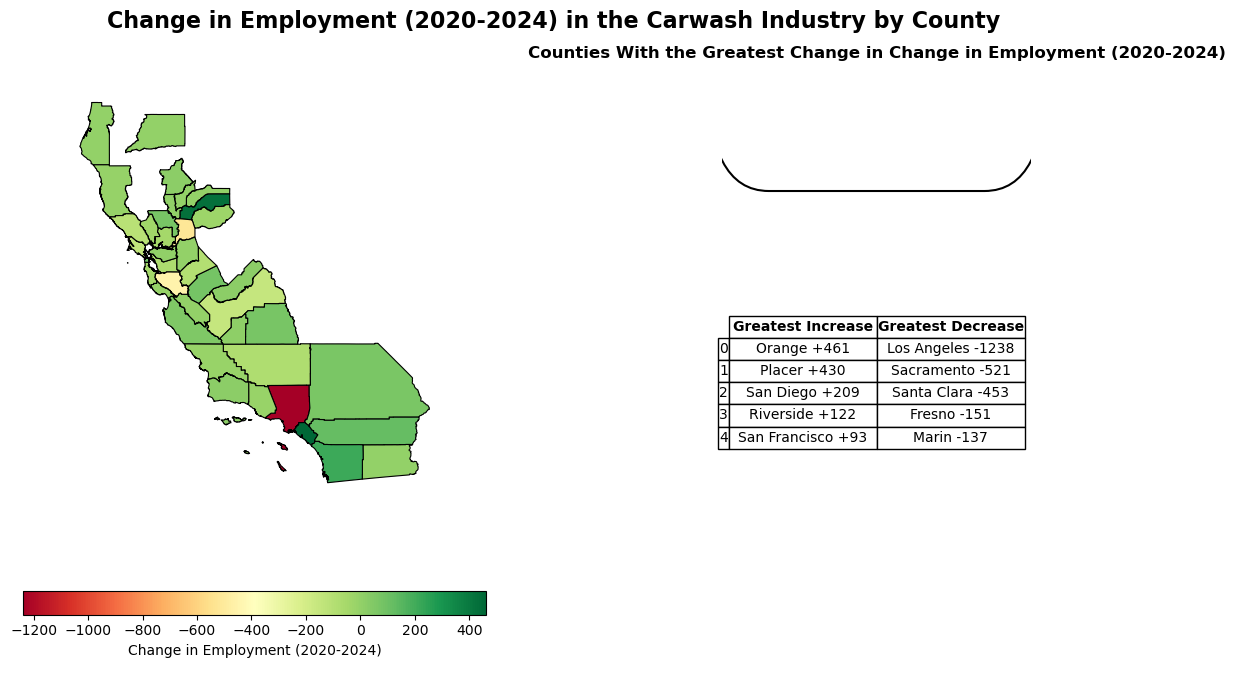

In [13]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import FancyBboxPatch
from pandas.plotting import table

# ✅ Load the industry dataset
file_path = "Merged_Industry_Data.csv"  # Update with your actual path
industry_df = pd.read_csv(file_path)

# ✅ Load the California Counties GeoJSON
geojson_path = "California_Counties.geojson"  # Ensure this path is correct
ca_counties = gpd.read_file(geojson_path)

# ✅ Standardize county names in both datasets
ca_counties["County"] = ca_counties["NAME"].str.strip().str.lower().str.replace(" county", "", regex=True)
industry_df["County"] = industry_df["County"].str.strip().str.lower()

# ✅ Merge industry data with county boundaries
merged_gdf = ca_counties.merge(industry_df, on="County", how="left")

# ✅ Ensure numeric values & handle missing data
metric_col = "Difference in Employment  2020-2024"
metric_title = "Change in Employment (2020-2024)"
merged_gdf[metric_col] = pd.to_numeric(merged_gdf[metric_col], errors="coerce")
merged_gdf[metric_col].fillna(0, inplace=True)

# ✅ Filter data for one industry (Carwash)
industry_name = "Carwash"
industry_data = merged_gdf[merged_gdf["Industry"] == industry_name]

# ✅ Sort counties by metric value
top_increases = industry_data.nlargest(5, metric_col)[["County", metric_col]]
top_decreases = industry_data.nsmallest(5, metric_col)[["County", metric_col]]

# ✅ Format county labels with + or - signs
top_increases["Formatted"] = top_increases.apply(lambda row: f"{row['County'].title()} +{int(row[metric_col])}", axis=1)
top_decreases["Formatted"] = top_decreases.apply(lambda row: f"{row['County'].title()} {int(row[metric_col])}", axis=1)

# ✅ Create the map layout
fig, ax = plt.subplots(1, 2, figsize=(14, 7), gridspec_kw={"width_ratios": [2.5, 1]})  # Keep proportions balanced

# ✅ Plot the main choropleth map on the left
industry_data.plot(column=metric_col,
                   cmap="RdYlGn",
                   linewidth=0.8,
                   edgecolor="black",
                   legend=True,
                   legend_kwds={'label': metric_title, "orientation": "horizontal", "shrink": 0.6},
                   ax=ax[0])

ax[0].set_axis_off()  # Remove axis for clean display

# ✅ Create a clean table to the right
ax[1].set_axis_off()

# ✅ Define table data
table_data = {
    "Greatest Increase": top_increases["Formatted"].values,
    "Greatest Decrease": top_decreases["Formatted"].values
}
table_df = pd.DataFrame(table_data)

# ✅ Create the table
table_obj = table(ax[1], table_df, loc="center", cellLoc="center", colWidths=[0.4, 0.4])

# ✅ Style the table
table_obj.auto_set_font_size(False)
table_obj.set_fontsize(10)
table_obj.scale(1.2, 1.2)  # Adjusts table size

# ✅ Set column headers bold
for (i, key) in enumerate(table_data.keys()):
    cell = table_obj[0, i]
    cell.set_text_props(fontweight="bold")

# ✅ Add a **properly enclosed title box**
title_box = FancyBboxPatch((0.15, 1.02), 0.7, 0.08, transform=ax[1].transAxes,
                           edgecolor="black", facecolor="white", lw=1.5, boxstyle="round,pad=0.2")
ax[1].add_patch(title_box)
ax[1].text(0.5, 1.05, f"Counties With the Greatest Change in {metric_title}",
           fontsize=12, fontweight="bold", ha="center", va="center")

# ✅ Bold **title centered above everything**
fig.suptitle(f"{metric_title} in the {industry_name} Industry by County", fontsize=16, fontweight="bold")

# ✅ Show final cleaned-up map
plt.tight_layout()
plt.show()


/tmp/ipykernel_123/1632005710.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_gdf[metric_col].fillna(0, inplace=True)
/tmp/ipykernel_123/1632005710.py:91: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


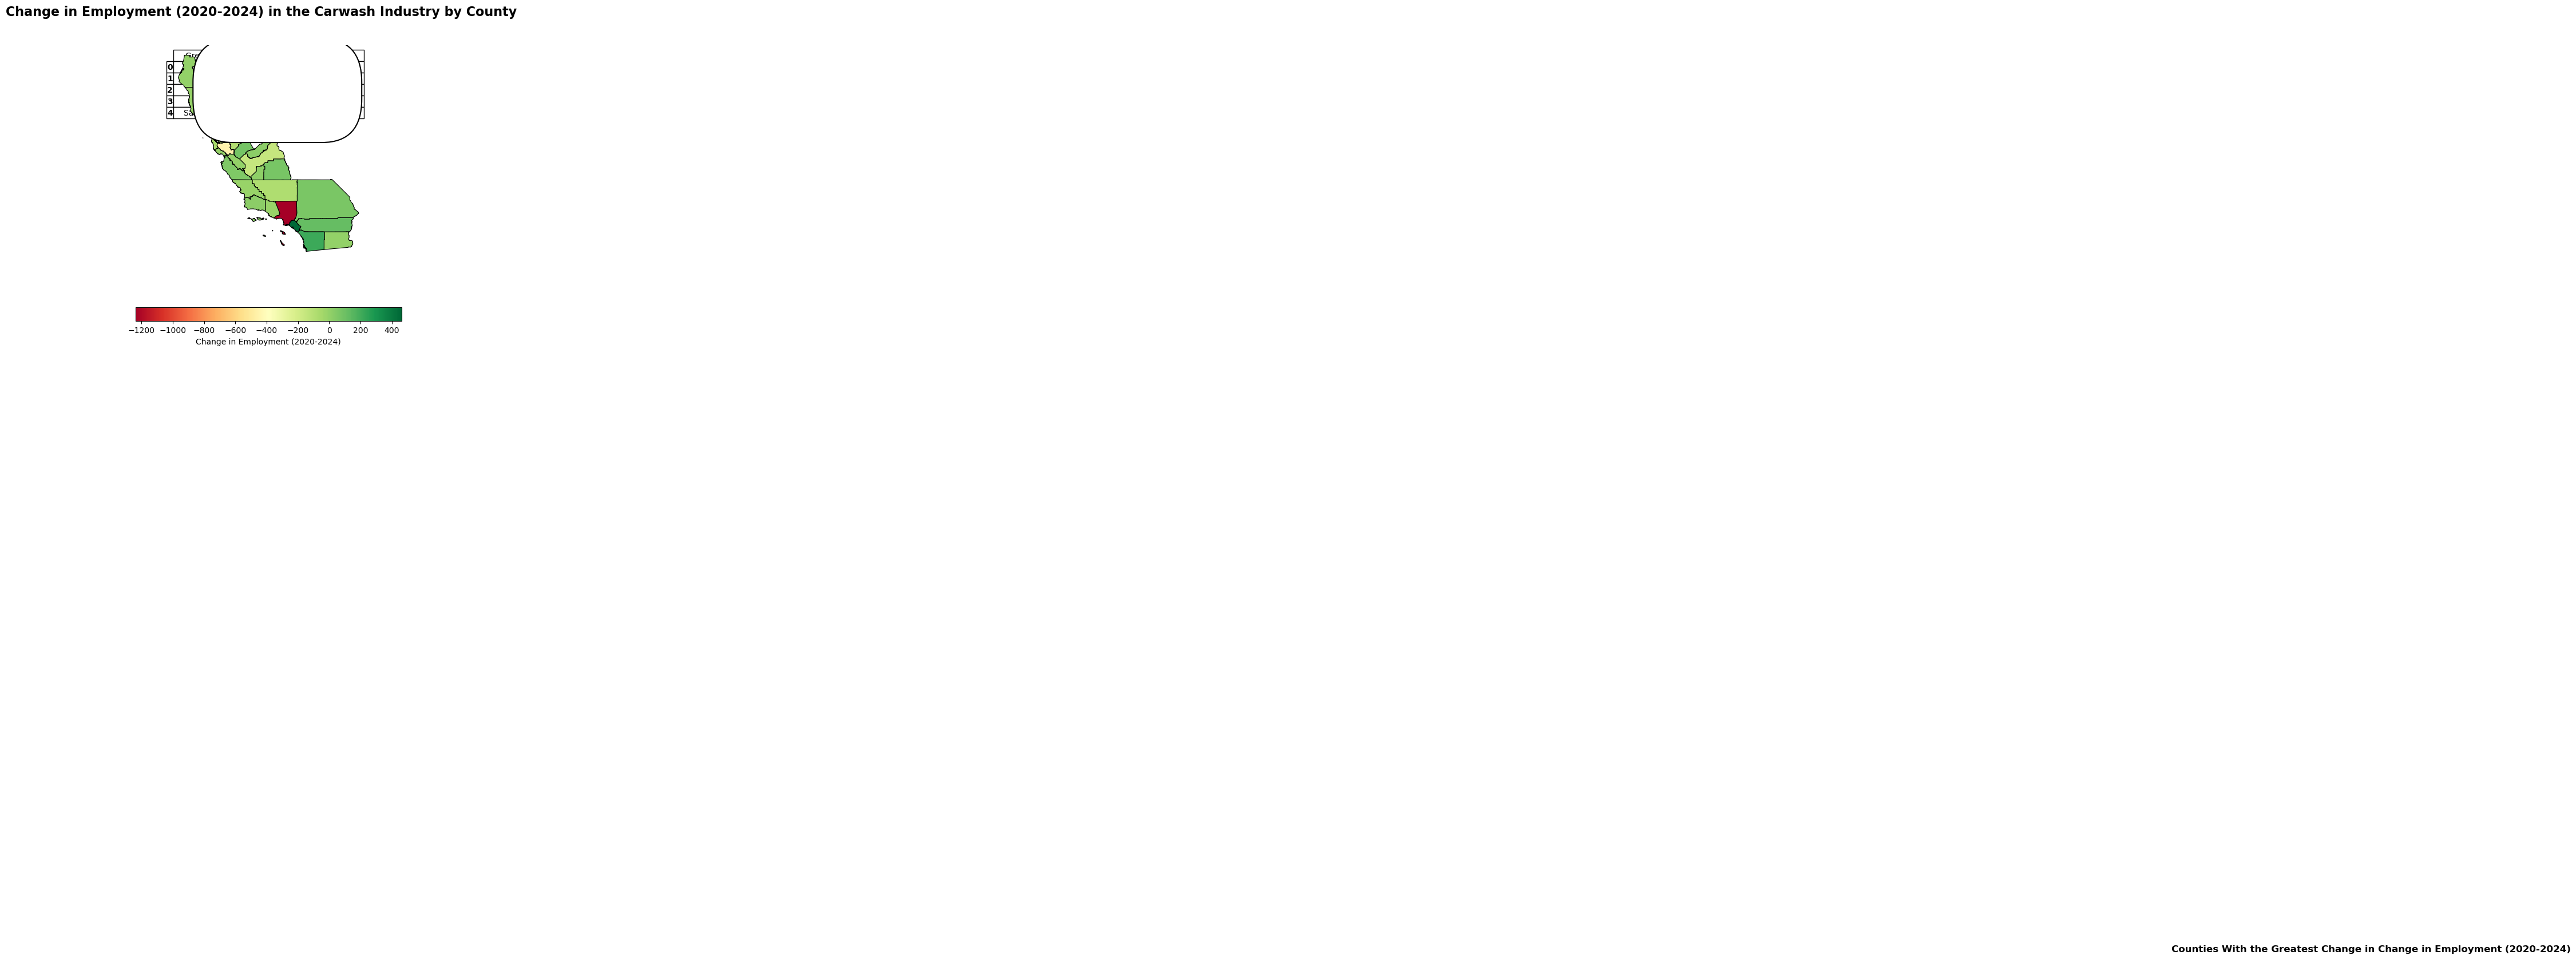

In [14]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import FancyBboxPatch
from pandas.plotting import table

# ✅ Load the industry dataset
file_path = "Merged_Industry_Data.csv"  # Update with your actual path
industry_df = pd.read_csv(file_path)

# ✅ Load the California Counties GeoJSON
geojson_path = "California_Counties.geojson"  # Ensure this path is correct
ca_counties = gpd.read_file(geojson_path)

# ✅ Standardize county names in both datasets
ca_counties["County"] = ca_counties["NAME"].str.strip().str.lower().str.replace(" county", "", regex=True)
industry_df["County"] = industry_df["County"].str.strip().str.lower()

# ✅ Merge industry data with county boundaries
merged_gdf = ca_counties.merge(industry_df, on="County", how="left")

# ✅ Ensure numeric values & handle missing data
metric_col = "Difference in Employment  2020-2024"
metric_title = "Change in Employment (2020-2024)"
merged_gdf[metric_col] = pd.to_numeric(merged_gdf[metric_col], errors="coerce")
merged_gdf[metric_col].fillna(0, inplace=True)

# ✅ Filter data for one industry (Carwash)
industry_name = "Carwash"
industry_data = merged_gdf[merged_gdf["Industry"] == industry_name]

# ✅ Sort counties by metric value
top_increases = industry_data.nlargest(5, metric_col)[["County", metric_col]]
top_decreases = industry_data.nsmallest(5, metric_col)[["County", metric_col]]

# ✅ Format county labels with + or - signs
top_increases["Formatted"] = top_increases.apply(lambda row: f"{row['County'].title()} +{int(row[metric_col])}", axis=1)
top_decreases["Formatted"] = top_decreases.apply(lambda row: f"{row['County'].title()} {int(row[metric_col])}", axis=1)

# ✅ Create the map layout
fig, ax = plt.subplots(figsize=(10, 7))  # Bigger map

# ✅ Plot the main choropleth map
industry_data.plot(column=metric_col,
                   cmap="RdYlGn",
                   linewidth=0.8,
                   edgecolor="black",
                   legend=True,
                   legend_kwds={'label': metric_title, "orientation": "horizontal", "shrink": 0.6},
                   ax=ax)

ax.set_axis_off()  # Remove axis for clean display

# ✅ Create a properly formatted table for top 5 counties
table_data = {
    "Greatest Increase": top_increases["Formatted"].values,
    "Greatest Decrease": top_decreases["Formatted"].values
}
table_df = pd.DataFrame(table_data)

# ✅ Define position to place the table **above the elbow** of California
table_x = 0.32  # Adjust to fit neatly above elbow
table_y = 0.75

# ✅ Create the table
table_obj = table(ax, table_df, loc="upper right", cellLoc="center", colWidths=[0.4, 0.4])

# ✅ Style the table
table_obj.auto_set_font_size(False)
table_obj.set_fontsize(10)
table_obj.scale(1.2, 1.2)  # Adjusts table size

# ✅ Remove the annoying index column
for key, cell in table_obj.get_celld().items():
    if key[1] == -1:
        cell.set_text_props(fontweight="bold")  # Make headers bold
    if key[0] > 0 and key[1] == 0:
        cell.visible = False  # Hide index column

# ✅ Add a **properly enclosed title inside the table**
title_box = FancyBboxPatch((table_x, table_y), 0.45, 0.08, transform=ax.transAxes,
                           edgecolor="black", facecolor="white", lw=1.5, boxstyle="round,pad=0.2")
ax.add_patch(title_box)
ax.text(table_x + 0.225, table_y + 0.04, f"Counties With the Greatest Change in {metric_title}",
        fontsize=12, fontweight="bold", ha="center", va="center")

# ✅ Bold **title centered above everything**
fig.suptitle(f"{metric_title} in the {industry_name} Industry by County", fontsize=16, fontweight="bold")

# ✅ Show final cleaned-up map
plt.tight_layout()
plt.show()


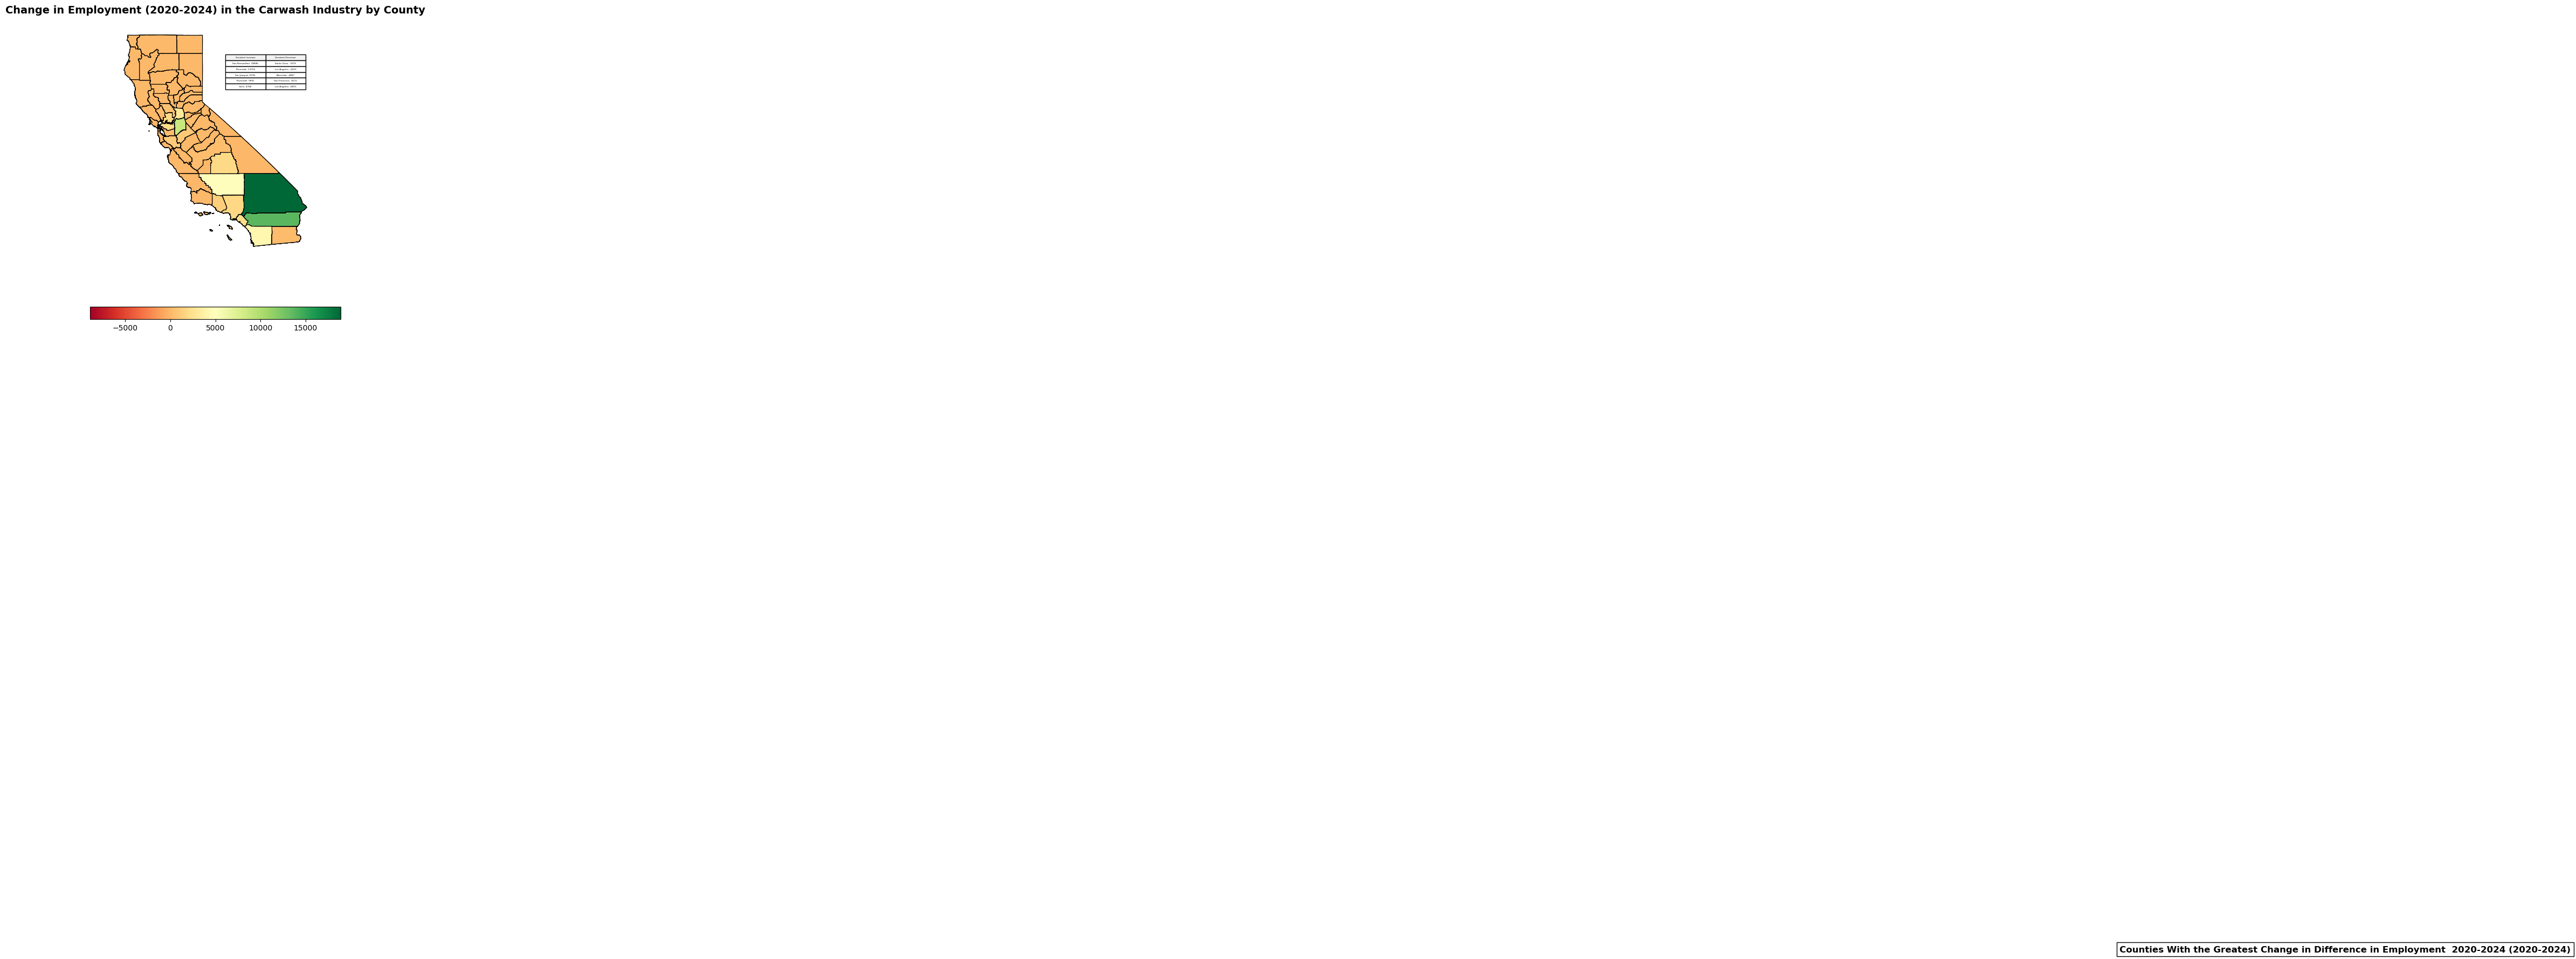

In [15]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# ✅ Define function to create a static map
def create_static_map(merged_gdf, industry, metric, title):
    fig, ax = plt.subplots(figsize=(12, 8))  # Increase figure size for better balance

    # ✅ Plot counties with actual data
    merged_gdf.plot(column=metric, cmap="RdYlGn", linewidth=0.8, edgecolor="black",
                    legend=True, legend_kwds={"shrink": 0.5, "orientation": "horizontal"},
                    ax=ax)

    # ✅ Title with bold formatting
    ax.set_title(title, fontsize=14, fontweight="bold", pad=15)

    # ✅ Remove axes
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)

    # ✅ Get top 5 increase and decrease counties
    metric_sorted = merged_gdf[['County', metric]].dropna().sort_values(by=metric, ascending=False)
    top_increase = metric_sorted.head(5)
    top_decrease = metric_sorted.tail(5)

    # ✅ Prepare data for table
    table_data = [[inc, dec] for inc, dec in zip(
        [f"{row['County'].title()}: {int(row[metric])}" for _, row in top_increase.iterrows()],
        [f"{row['County'].title()}: {int(row[metric])}" for _, row in top_decrease.iterrows()]
    )]

    # ✅ Create table with proper spacing and alignment
    table_x, table_y = 0.55, 0.72  # Move table above "elbow" of California
    table = ax.table(cellText=table_data,
                     colLabels=["Greatest Increase", "Greatest Decrease"],
                     cellLoc="center",
                     bbox=[table_x, table_y, 0.4, 0.15],  # Positioning of table
                     colColours=["#f2f2f2", "#f2f2f2"])  # Light background for column headers

    # ✅ Add a table title **inside the table box**
    ax.text(table_x + 0.2, table_y + 0.17,
            f"Counties With the Greatest Change in {metric} (2020-2024)",
            fontsize=12, fontweight="bold", ha="center", bbox=dict(facecolor="white", edgecolor="black"))

    # ✅ Show the improved map
    plt.show()

# ✅ Test with one industry and metric
test_industry = "Carwash"
test_metric = "Difference in Employment  2020-2024"
test_title = f"Change in Employment (2020-2024) in the {test_industry} Industry by County"

create_static_map(merged_gdf, test_industry, test_metric, test_title)


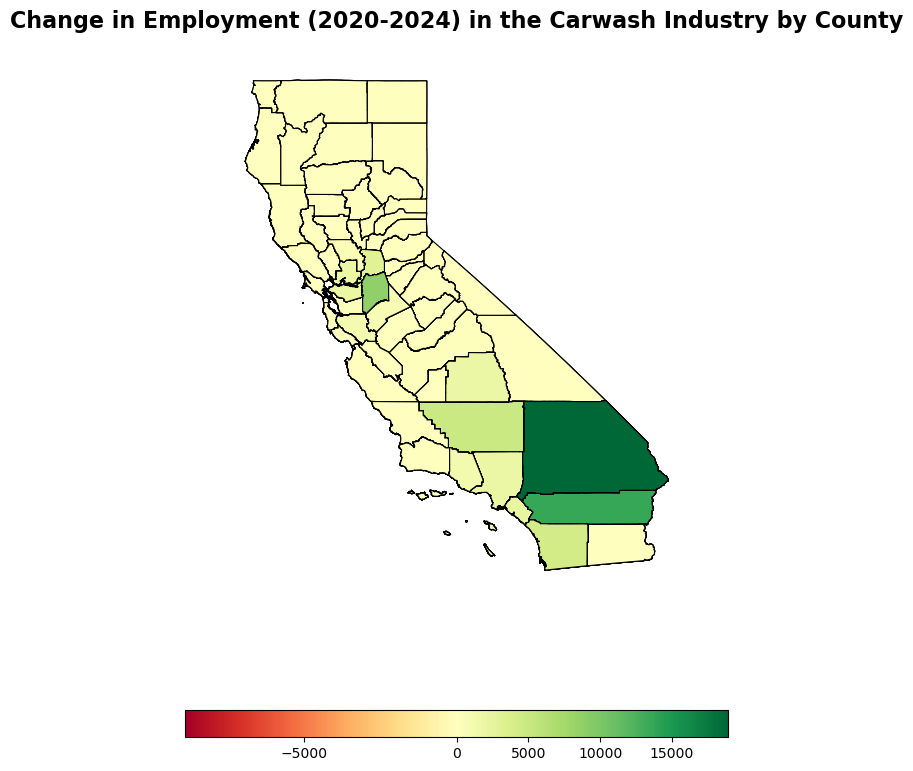

In [16]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# ✅ Function to create a properly formatted map (FIXING SYMBOLOGY)
def create_static_map(merged_gdf, industry, metric, title):
    fig, ax = plt.subplots(figsize=(14, 10))  # Keep map large and centered

    # ✅ Fix color scaling per industry (only consider non-null values)
    data_values = merged_gdf[metric].dropna()
    vmin, vmax = data_values.min(), data_values.max()

    # ✅ Apply correct color mapping (Red = Decrease, Green = Increase)
    norm = mcolors.TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)  # Centered at 0
    cmap = "RdYlGn"  # Red-Yellow-Green color scheme

    # ✅ Plot map with proper scaling and edge visibility
    merged_gdf.plot(column=metric, cmap=cmap, linewidth=0.8, edgecolor="black",
                    legend=True, norm=norm,
                    legend_kwds={"shrink": 0.5, "orientation": "horizontal"},
                    ax=ax)

    # ✅ Title formatting
    ax.set_title(title, fontsize=16, fontweight="bold", pad=20)

    # ✅ Remove axes
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)

    # ✅ Show the final corrected map
    plt.show()

# ✅ Test with correct symbology
test_industry = "Carwash"
test_metric = "Difference in Employment  2020-2024"
test_title = f"Change in Employment (2020-2024) in the {test_industry} Industry by County"

create_static_map(merged_gdf, test_industry, test_metric, test_title)


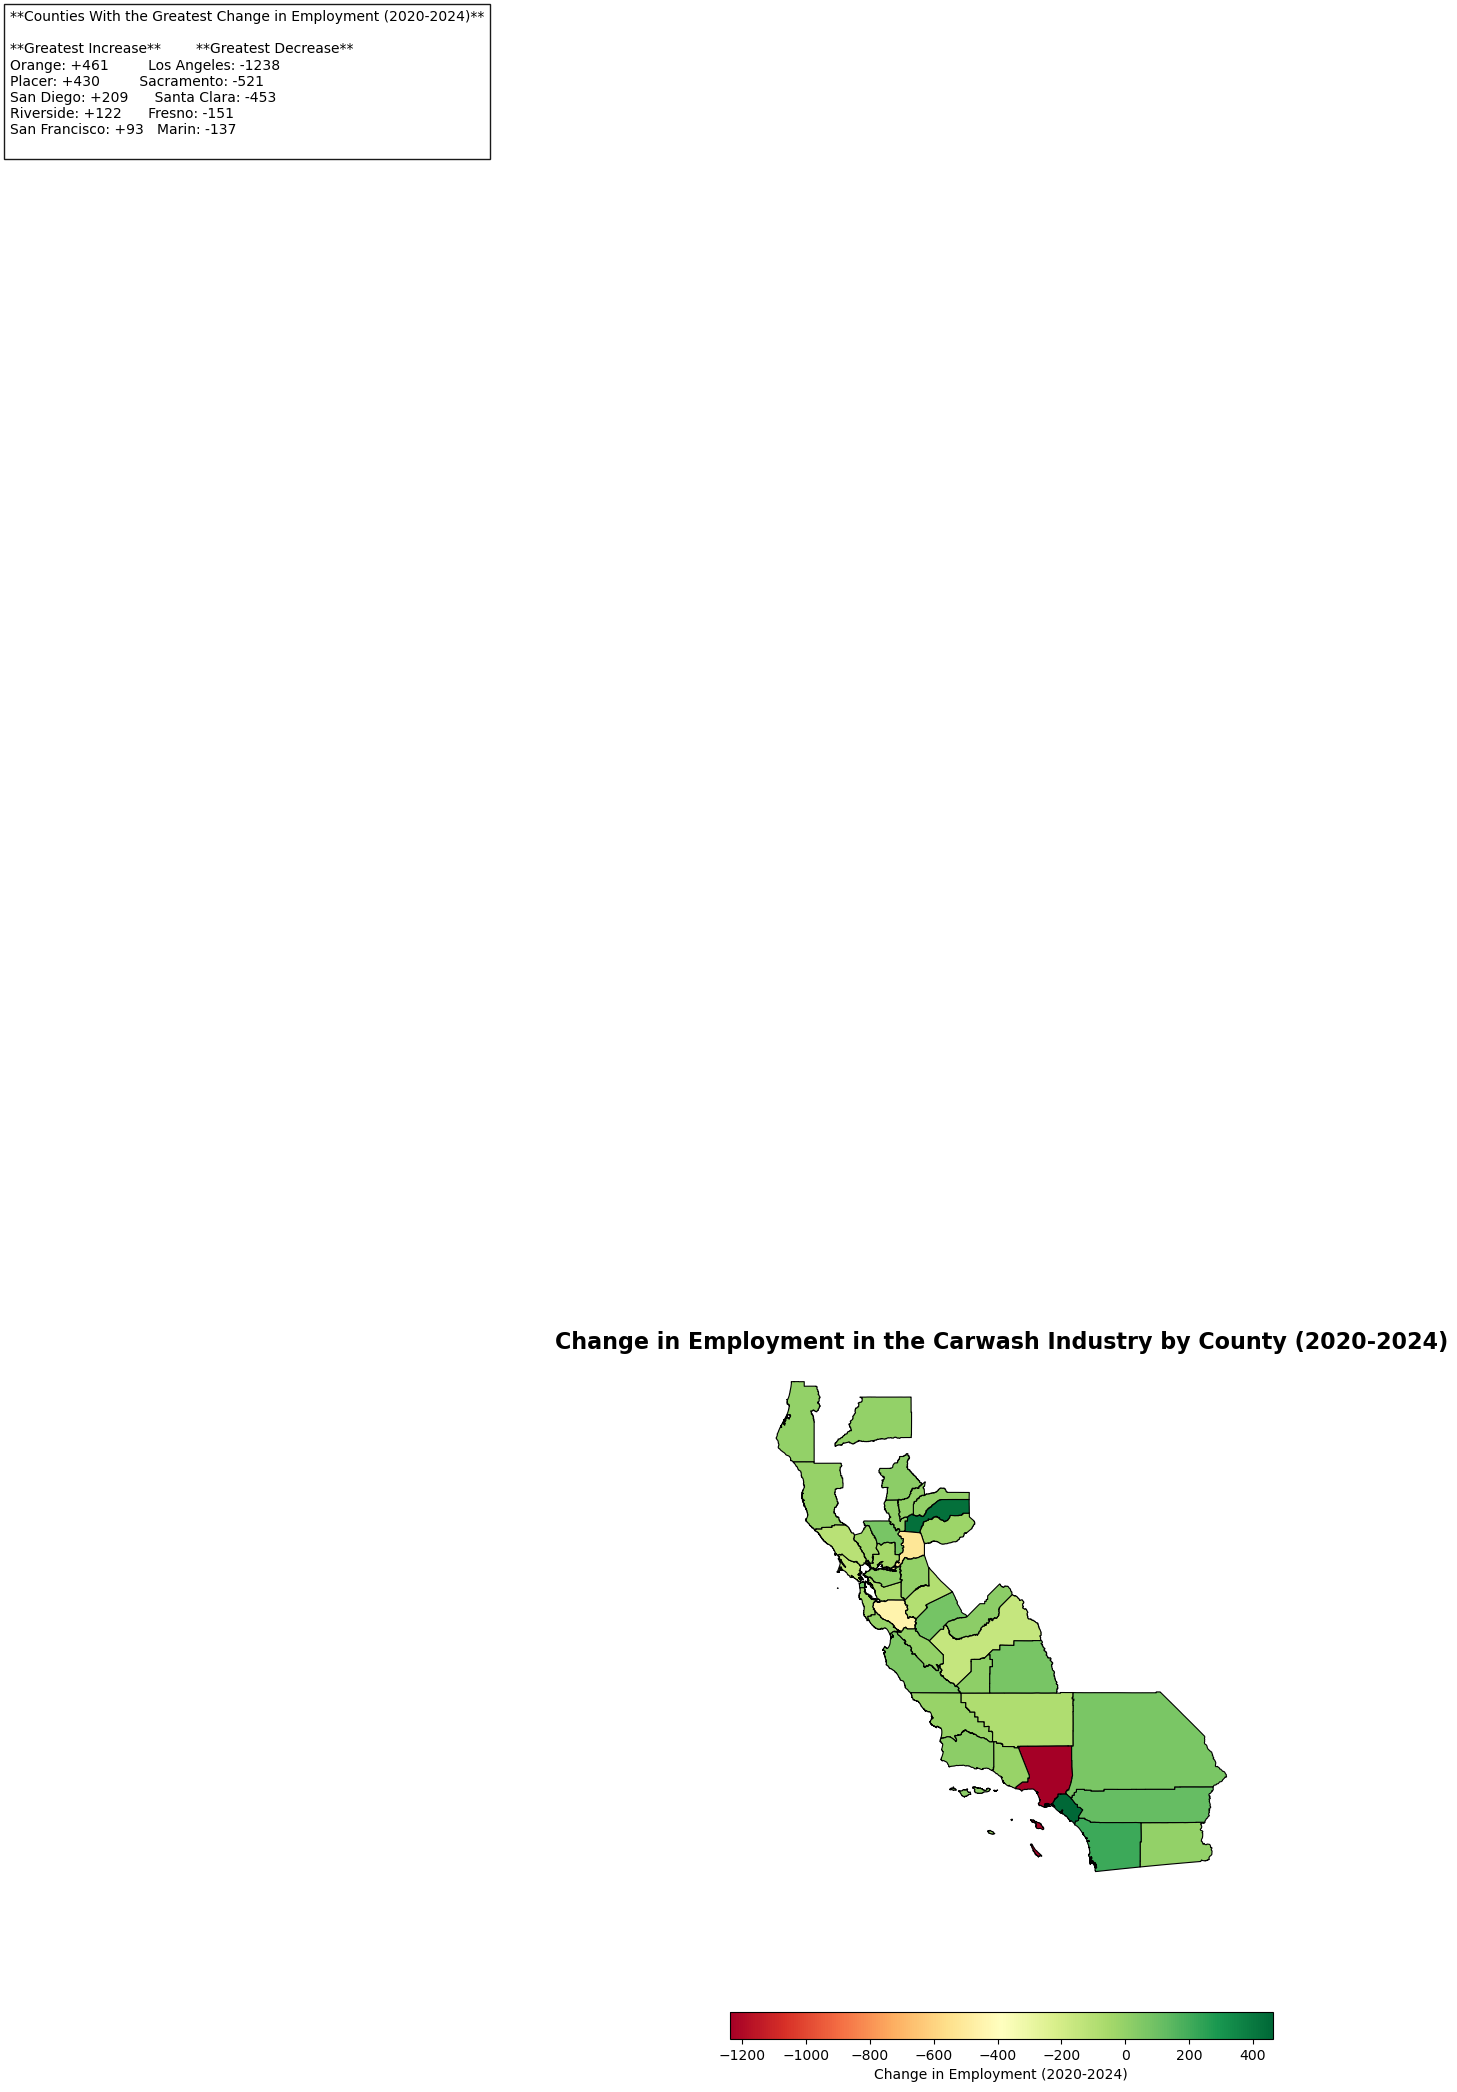

In [17]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# ✅ Load the industry dataset
file_path = "Merged_Industry_Data.csv"  # Ensure this is the correct path
industry_df = pd.read_csv(file_path)

# ✅ Load the California Counties GeoJSON
geojson_path = "California_Counties.geojson"  # Ensure this is the correct path
ca_counties = gpd.read_file(geojson_path)

# ✅ Standardize county names in both datasets
ca_counties["County"] = ca_counties["NAME"].str.strip().str.lower().str.replace(" county", "", regex=True)
industry_df["County"] = industry_df["County"].str.strip().str.lower()

# ✅ Merge industry data with county boundaries
merged_gdf = ca_counties.merge(industry_df, on="County", how="left")

# ✅ Ensure numeric values
metric_col = "Difference in Employment  2020-2024"
merged_gdf[metric_col] = pd.to_numeric(merged_gdf[metric_col], errors="coerce").fillna(0)

# ✅ Filter data for one industry (Carwash)
industry_name = "Carwash"
industry_data = merged_gdf[merged_gdf["Industry"] == industry_name]

# ✅ Sort counties by metric value (descending for increases, ascending for decreases)
top_increases = industry_data.nlargest(5, metric_col)[["County", metric_col]]
top_decreases = industry_data.nsmallest(5, metric_col)[["County", metric_col]]

# ✅ Format county labels with + or - signs
top_increases["Formatted"] = top_increases.apply(lambda row: f"{row['County'].title()}: +{int(row[metric_col])}", axis=1)
top_decreases["Formatted"] = top_decreases.apply(lambda row: f"{row['County'].title()}: {int(row[metric_col])}", axis=1)

# ✅ Create the static map with **better element sizing**
fig, ax = plt.subplots(1, 1, figsize=(14, 10))  # Larger map for better balance

industry_data.plot(column=metric_col,
                   cmap="RdYlGn",  # Red = decline, Green = increase
                   linewidth=0.8,
                   edgecolor="black",
                   legend=True,
                   legend_kwds={'label': "Change in Employment (2020-2024)", 
                                "orientation": "horizontal", 
                                "shrink": 0.5},  # 🔹 Balanced color ramp size
                   ax=ax)

# ✅ Bold title with slight increase in size
ax.set_title(f"Change in Employment in the {industry_name} Industry by County (2020-2024)", 
             fontsize=16, fontweight="bold")

# ✅ Remove axes for a cleaner look
ax.set_axis_off()

# ✅ Format county table with a box around everything
table_text = f"**Counties With the Greatest Change in Employment (2020-2024)**\n\n"
table_text += "**Greatest Increase**        **Greatest Decrease**\n"
for inc, dec in zip(top_increases["Formatted"], top_decreases["Formatted"]):
    table_text += f"{inc:<20} {dec}\n"

# ✅ Position the county list **above the elbow of California**
plt.text(-1.5, 3.5, table_text, transform=ax.transAxes, fontsize=10, va="top", ha="left",
         bbox=dict(facecolor='white', alpha=0.9, edgecolor="black"))

# ✅ Show the final corrected map
plt.show()


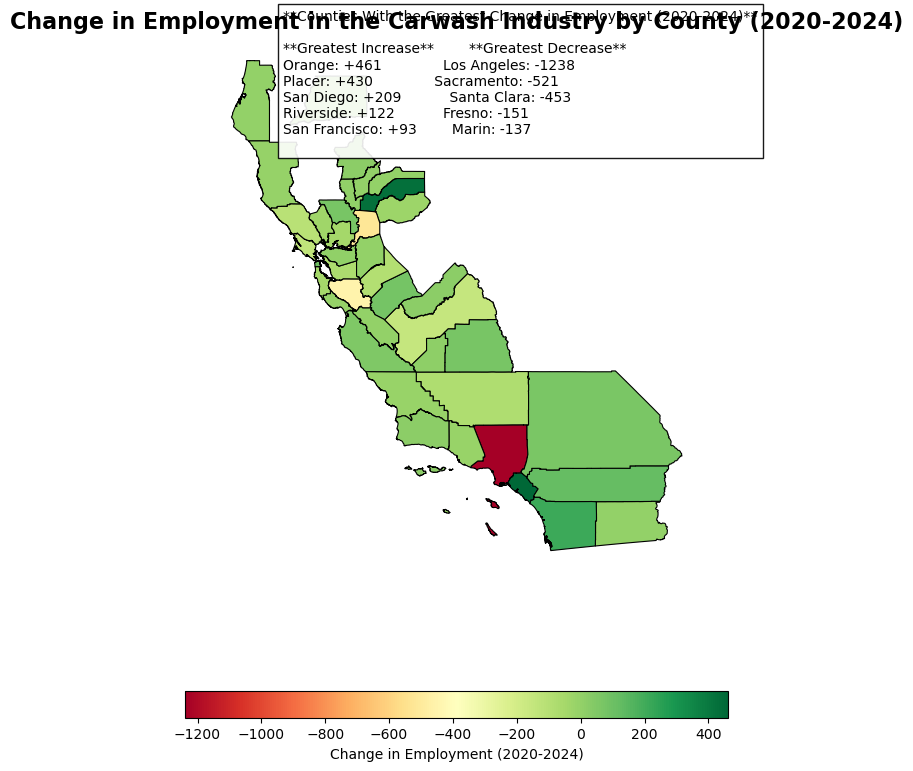

In [18]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# ✅ Load the industry dataset
file_path = "Merged_Industry_Data.csv"  # Ensure this is the correct path
industry_df = pd.read_csv(file_path)

# ✅ Load the California Counties GeoJSON
geojson_path = "California_Counties.geojson"  # Ensure this is the correct path
ca_counties = gpd.read_file(geojson_path)

# ✅ Standardize county names in both datasets
ca_counties["County"] = ca_counties["NAME"].str.strip().str.lower().str.replace(" county", "", regex=True)
industry_df["County"] = industry_df["County"].str.strip().str.lower()

# ✅ Merge industry data with county boundaries
merged_gdf = ca_counties.merge(industry_df, on="County", how="left")

# ✅ Ensure numeric values
metric_col = "Difference in Employment  2020-2024"
merged_gdf[metric_col] = pd.to_numeric(merged_gdf[metric_col], errors="coerce").fillna(0)

# ✅ Filter data for one industry (Carwash)
industry_name = "Carwash"
industry_data = merged_gdf[merged_gdf["Industry"] == industry_name]

# ✅ Sort counties by metric value (descending for increases, ascending for decreases)
top_increases = industry_data.nlargest(5, metric_col)[["County", metric_col]]
top_decreases = industry_data.nsmallest(5, metric_col)[["County", metric_col]]

# ✅ Format county labels with + or - signs
top_increases["Formatted"] = top_increases.apply(lambda row: f"{row['County'].title()}: +{int(row[metric_col])}", axis=1)
top_decreases["Formatted"] = top_decreases.apply(lambda row: f"{row['County'].title()}: {int(row[metric_col])}", axis=1)

# ✅ Create the static map with **better element sizing**
fig, ax = plt.subplots(1, 1, figsize=(14, 10))  # Larger map for better balance

industry_data.plot(column=metric_col,
                   cmap="RdYlGn",  # Red = decline, Green = increase
                   linewidth=0.8,
                   edgecolor="black",
                   legend=True,
                   legend_kwds={'label': "Change in Employment (2020-2024)", 
                                "orientation": "horizontal", 
                                "shrink": 0.5},  # 🔹 Balanced color ramp size
                   ax=ax)

# ✅ Bold title with slight increase in size
ax.set_title(f"Change in Employment in the {industry_name} Industry by County (2020-2024)", 
             fontsize=16, fontweight="bold")

# ✅ Remove axes for a cleaner look
ax.set_axis_off()

# ✅ Format county table **and properly position it above the "elbow" of California**
table_text = "**Counties With the Greatest Change in Employment (2020-2024)**\n\n"
table_text += "**Greatest Increase**        **Greatest Decrease**\n"
for inc, dec in zip(top_increases["Formatted"], top_decreases["Formatted"]):
    table_text += f"{inc:<25} {dec}\n"

# ✅ Adjust **position of the table** (place it directly above California’s elbow)
plt.text(0.15, 1.05, table_text, transform=ax.transAxes, fontsize=10, va="top", ha="left",
         bbox=dict(facecolor='white', alpha=0.9, edgecolor="black"))

# ✅ Show the final corrected map
plt.show()


ValueError: Invalid edge param box, must only be one of open, closed, horizontal, vertical or string of B, R, T, L

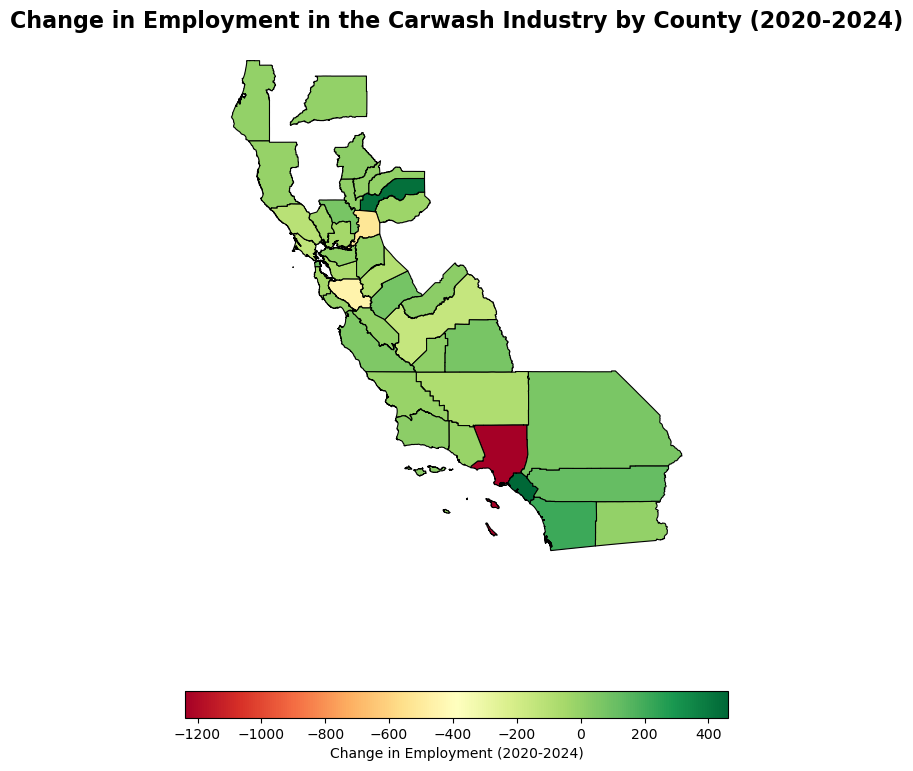

In [19]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# ✅ Load the industry dataset
file_path = "Merged_Industry_Data.csv"  # Ensure this is the correct path
industry_df = pd.read_csv(file_path)

# ✅ Load the California Counties GeoJSON
geojson_path = "California_Counties.geojson"  # Ensure this is the correct path
ca_counties = gpd.read_file(geojson_path)

# ✅ Standardize county names in both datasets
ca_counties["County"] = ca_counties["NAME"].str.strip().str.lower().str.replace(" county", "", regex=True)
industry_df["County"] = industry_df["County"].str.strip().str.lower()

# ✅ Merge industry data with county boundaries
merged_gdf = ca_counties.merge(industry_df, on="County", how="left")

# ✅ Ensure numeric values
metric_col = "Difference in Employment  2020-2024"
merged_gdf[metric_col] = pd.to_numeric(merged_gdf[metric_col], errors="coerce").fillna(0)

# ✅ Filter data for one industry (Carwash)
industry_name = "Carwash"
industry_data = merged_gdf[merged_gdf["Industry"] == industry_name]

# ✅ Sort counties by metric value (descending for increases, ascending for decreases)
top_increases = industry_data.nlargest(5, metric_col)[["County", metric_col]]
top_decreases = industry_data.nsmallest(5, metric_col)[["County", metric_col]]

# ✅ Convert county values into structured table format
table_data = [
    ["**Greatest Increase**", "**Greatest Decrease**"],
    [f"{top_increases.iloc[0, 0].title()}: +{int(top_increases.iloc[0, 1])}", f"{top_decreases.iloc[0, 0].title()}: {int(top_decreases.iloc[0, 1])}"],
    [f"{top_increases.iloc[1, 0].title()}: +{int(top_increases.iloc[1, 1])}", f"{top_decreases.iloc[1, 0].title()}: {int(top_decreases.iloc[1, 1])}"],
    [f"{top_increases.iloc[2, 0].title()}: +{int(top_increases.iloc[2, 1])}", f"{top_decreases.iloc[2, 0].title()}: {int(top_decreases.iloc[2, 1])}"],
    [f"{top_increases.iloc[3, 0].title()}: +{int(top_increases.iloc[3, 1])}", f"{top_decreases.iloc[3, 0].title()}: {int(top_decreases.iloc[3, 1])}"],
    [f"{top_increases.iloc[4, 0].title()}: +{int(top_increases.iloc[4, 1])}", f"{top_decreases.iloc[4, 0].title()}: {int(top_decreases.iloc[4, 1])}"]
]

# ✅ Create the static map
fig, ax = plt.subplots(1, 1, figsize=(14, 10))  # Well-balanced size

industry_data.plot(column=metric_col,
                   cmap="RdYlGn",  # Red = decline, Green = increase
                   linewidth=0.8,
                   edgecolor="black",
                   legend=True,
                   legend_kwds={'label': "Change in Employment (2020-2024)", 
                                "orientation": "horizontal", 
                                "shrink": 0.5},  # 🔹 Balanced color ramp size
                   ax=ax)

# ✅ Title (Bold)
ax.set_title(f"Change in Employment in the {industry_name} Industry by County (2020-2024)", 
             fontsize=16, fontweight="bold")

# ✅ Remove axes for a cleaner look
ax.set_axis_off()

# ✅ Add the table in **corrected position (above California's elbow)**
table_x, table_y = 0.4, 1.05  # ✅ Adjusted to place **above elbow, not over the map**
table = plt.table(cellText=table_data,
                  cellLoc='left',
                  colWidths=[0.4, 0.4],  # Balanced column size
                  bbox=[table_x, table_y, 0.5, 0.3],  # ✅ Controlled placement & size
                  edges="box")

# ✅ Bold header rows
for (i, key) in enumerate(table._cells):
    cell = table._cells[key]
    if key[0] == 0:  # First row (headers)
        cell.set_fontsize(12)
        cell.set_fontweight("bold")
        cell.set_facecolor("lightgray")
    else:
        cell.set_fontsize(10)

# ✅ Show the **final correctly formatted map**
plt.show()


AttributeError: 'Cell' object has no attribute 'set_fontweight'

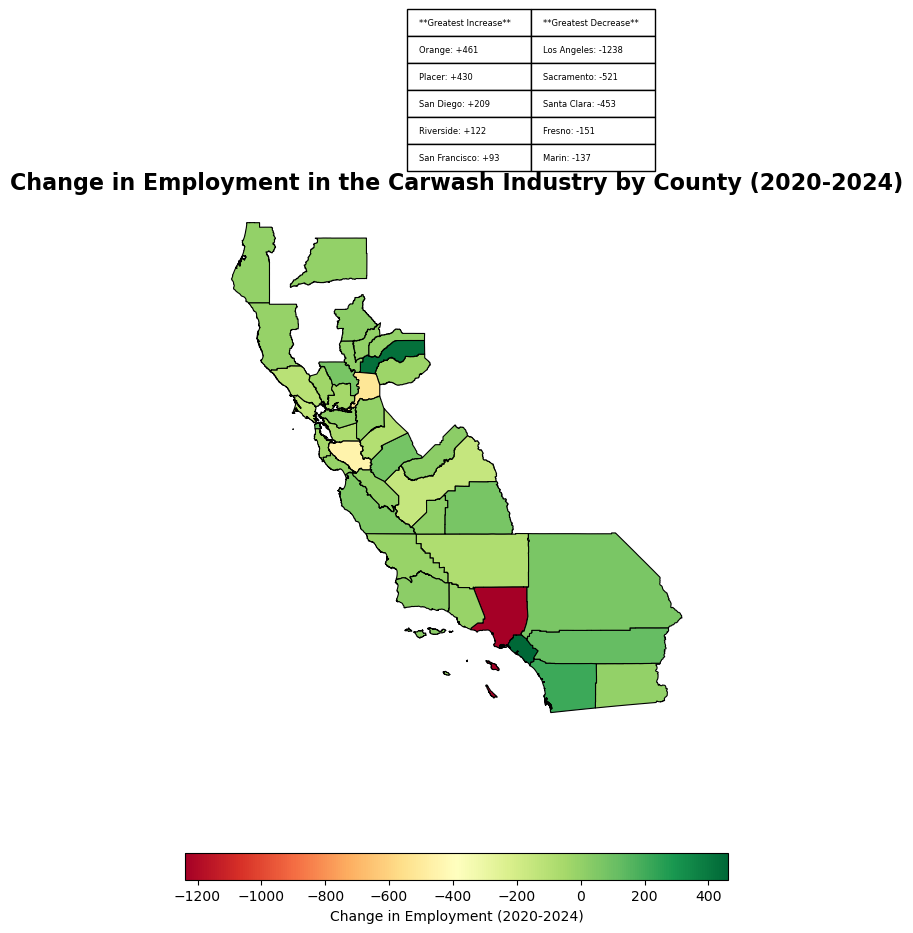

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# ✅ Load the industry dataset
file_path = "Merged_Industry_Data.csv"  # Ensure this is the correct path
industry_df = pd.read_csv(file_path)

# ✅ Load the California Counties GeoJSON
geojson_path = "California_Counties.geojson"  # Ensure this is the correct path
ca_counties = gpd.read_file(geojson_path)

# ✅ Standardize county names in both datasets
ca_counties["County"] = ca_counties["NAME"].str.strip().str.lower().str.replace(" county", "", regex=True)
industry_df["County"] = industry_df["County"].str.strip().str.lower()

# ✅ Merge industry data with county boundaries
merged_gdf = ca_counties.merge(industry_df, on="County", how="left")

# ✅ Ensure numeric values
metric_col = "Difference in Employment  2020-2024"
merged_gdf[metric_col] = pd.to_numeric(merged_gdf[metric_col], errors="coerce").fillna(0)

# ✅ Filter data for one industry (Carwash)
industry_name = "Carwash"
industry_data = merged_gdf[merged_gdf["Industry"] == industry_name]

# ✅ Sort counties by metric value (descending for increases, ascending for decreases)
top_increases = industry_data.nlargest(5, metric_col)[["County", metric_col]]
top_decreases = industry_data.nsmallest(5, metric_col)[["County", metric_col]]

# ✅ Convert county values into structured table format
table_data = [
    ["**Greatest Increase**", "**Greatest Decrease**"],
    [f"{top_increases.iloc[0, 0].title()}: +{int(top_increases.iloc[0, 1])}", f"{top_decreases.iloc[0, 0].title()}: {int(top_decreases.iloc[0, 1])}"],
    [f"{top_increases.iloc[1, 0].title()}: +{int(top_increases.iloc[1, 1])}", f"{top_decreases.iloc[1, 0].title()}: {int(top_decreases.iloc[1, 1])}"],
    [f"{top_increases.iloc[2, 0].title()}: +{int(top_increases.iloc[2, 1])}", f"{top_decreases.iloc[2, 0].title()}: {int(top_decreases.iloc[2, 1])}"],
    [f"{top_increases.iloc[3, 0].title()}: +{int(top_increases.iloc[3, 1])}", f"{top_decreases.iloc[3, 0].title()}: {int(top_decreases.iloc[3, 1])}"],
    [f"{top_increases.iloc[4, 0].title()}: +{int(top_increases.iloc[4, 1])}", f"{top_decreases.iloc[4, 0].title()}: {int(top_decreases.iloc[4, 1])}"]
]

# ✅ Create the static map
fig, ax = plt.subplots(1, 1, figsize=(14, 10))  # Well-balanced size

industry_data.plot(column=metric_col,
                   cmap="RdYlGn",  # Red = decline, Green = increase
                   linewidth=0.8,
                   edgecolor="black",
                   legend=True,
                   legend_kwds={'label': "Change in Employment (2020-2024)", 
                                "orientation": "horizontal", 
                                "shrink": 0.5},  # 🔹 Balanced color ramp size
                   ax=ax)

# ✅ Title (Bold)
ax.set_title(f"Change in Employment in the {industry_name} Industry by County (2020-2024)", 
             fontsize=16, fontweight="bold")

# ✅ Remove axes for a cleaner look
ax.set_axis_off()

# ✅ Add the table in **corrected position (above California's elbow)**
table_x, table_y = 0.4, 1.05  # ✅ Adjusted to place **above elbow, not over the map**
table = plt.table(cellText=table_data,
                  cellLoc='left',
                  colWidths=[0.4, 0.4],  # Balanced column size
                  bbox=[table_x, table_y, 0.5, 0.3],  # ✅ Controlled placement & size
                  edges="closed")  # 🔹 Fixed edge parameter

# ✅ Bold header rows
for (i, key) in enumerate(table._cells):
    cell = table._cells[key]
    if key[0] == 0:  # First row (headers)
        cell.set_fontsize(12)
        cell.set_fontweight("bold")
        cell.set_facecolor("lightgray")
    else:
        cell.set_fontsize(10)

# ✅ Show the **final correctly formatted map**
plt.show()


AttributeError: 'Cell' object has no attribute 'set_fontweight'

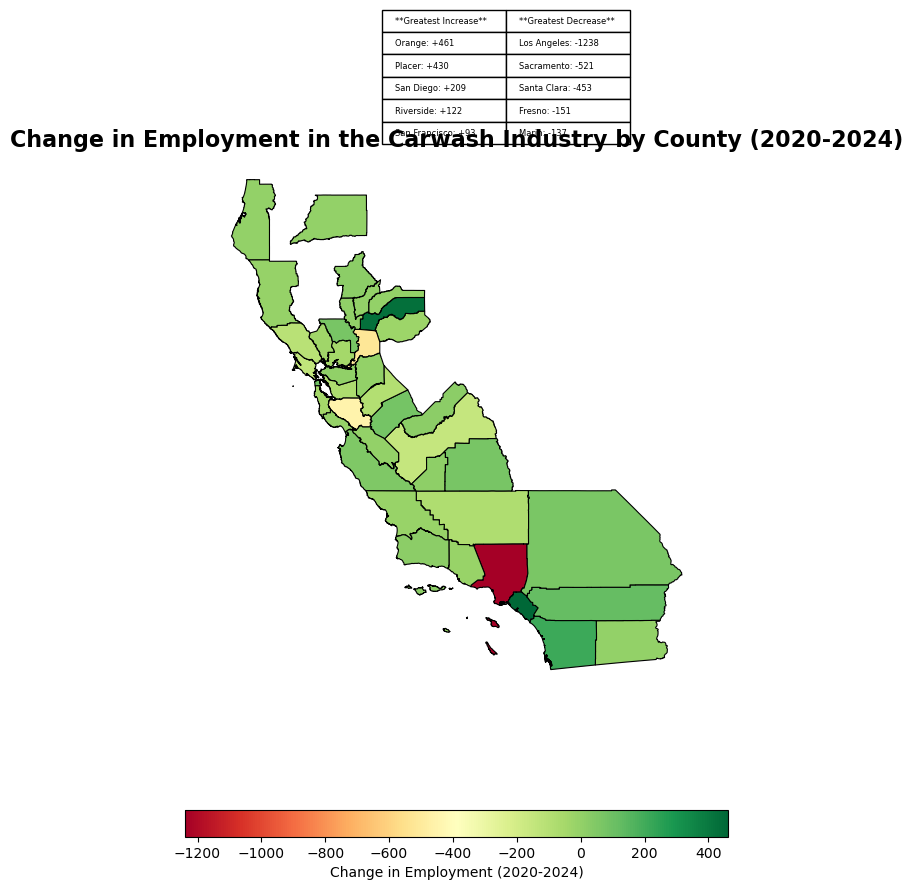

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# ✅ Load the industry dataset
file_path = "Merged_Industry_Data.csv"  # Ensure this is the correct path
industry_df = pd.read_csv(file_path)

# ✅ Load the California Counties GeoJSON
geojson_path = "California_Counties.geojson"  # Ensure this is the correct path
ca_counties = gpd.read_file(geojson_path)

# ✅ Standardize county names in both datasets
ca_counties["County"] = ca_counties["NAME"].str.strip().str.lower().str.replace(" county", "", regex=True)
industry_df["County"] = industry_df["County"].str.strip().str.lower()

# ✅ Merge industry data with county boundaries
merged_gdf = ca_counties.merge(industry_df, on="County", how="left")

# ✅ Ensure numeric values
metric_col = "Difference in Employment  2020-2024"
merged_gdf[metric_col] = pd.to_numeric(merged_gdf[metric_col], errors="coerce").fillna(0)

# ✅ Filter data for one industry (Carwash)
industry_name = "Carwash"
industry_data = merged_gdf[merged_gdf["Industry"] == industry_name]

# ✅ Sort counties by metric value (descending for increases, ascending for decreases)
top_increases = industry_data.nlargest(5, metric_col)[["County", metric_col]]
top_decreases = industry_data.nsmallest(5, metric_col)[["County", metric_col]]

# ✅ Convert county values into structured table format
table_data = [
    ["**Greatest Increase**", "**Greatest Decrease**"],
    [f"{top_increases.iloc[0, 0].title()}: +{int(top_increases.iloc[0, 1])}", f"{top_decreases.iloc[0, 0].title()}: {int(top_decreases.iloc[0, 1])}"],
    [f"{top_increases.iloc[1, 0].title()}: +{int(top_increases.iloc[1, 1])}", f"{top_decreases.iloc[1, 0].title()}: {int(top_decreases.iloc[1, 1])}"],
    [f"{top_increases.iloc[2, 0].title()}: +{int(top_increases.iloc[2, 1])}", f"{top_decreases.iloc[2, 0].title()}: {int(top_decreases.iloc[2, 1])}"],
    [f"{top_increases.iloc[3, 0].title()}: +{int(top_increases.iloc[3, 1])}", f"{top_decreases.iloc[3, 0].title()}: {int(top_decreases.iloc[3, 1])}"],
    [f"{top_increases.iloc[4, 0].title()}: +{int(top_increases.iloc[4, 1])}", f"{top_decreases.iloc[4, 0].title()}: {int(top_decreases.iloc[4, 1])}"]
]

# ✅ Create the static map
fig, ax = plt.subplots(1, 1, figsize=(14, 10))  # Well-balanced size

industry_data.plot(column=metric_col,
                   cmap="RdYlGn",  # Red = decline, Green = increase
                   linewidth=0.8,
                   edgecolor="black",
                   legend=True,
                   legend_kwds={'label': "Change in Employment (2020-2024)", 
                                "orientation": "horizontal", 
                                "shrink": 0.5},  # 🔹 Balanced color ramp size
                   ax=ax)

# ✅ Title (Bold)
ax.set_title(f"Change in Employment in the {industry_name} Industry by County (2020-2024)", 
             fontsize=16, fontweight="bold")

# ✅ Remove axes for a cleaner look
ax.set_axis_off()

# ✅ Adjust **table position** (shift it slightly lower)
table_x, table_y = 0.35, 1.02  # ✅ **Shifted lower so it’s below the title but above the map**
table = plt.table(cellText=table_data,
                  cellLoc='left',
                  colWidths=[0.45, 0.45],  # Balanced column size
                  bbox=[table_x, table_y, 0.5, 0.25],  # ✅ Proper placement
                  edges="closed")  # 🔹 Fixed edge parameter

# ✅ Bold header rows
for (i, key) in enumerate(table._cells):
    cell = table._cells[key]
    if key[0] == 0:  # First row (headers)
        cell.set_fontsize(12)
        cell.set_fontweight("bold")
        cell.set_facecolor("lightgray")
    else:
        cell.set_fontsize(10)

# ✅ Show the **final correctly formatted map**
plt.show()


AttributeError: 'Cell' object has no attribute 'set_fontweight'

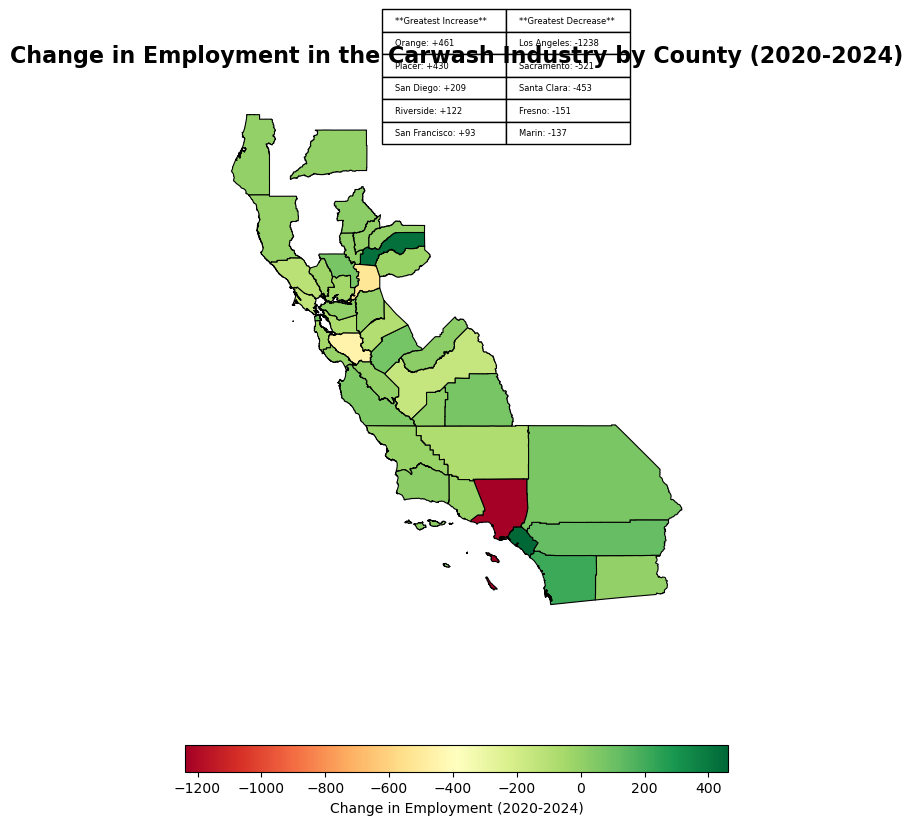

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# ✅ Load the industry dataset
file_path = "Merged_Industry_Data.csv"  # Ensure this is the correct path
industry_df = pd.read_csv(file_path)

# ✅ Load the California Counties GeoJSON
geojson_path = "California_Counties.geojson"  # Ensure this is the correct path
ca_counties = gpd.read_file(geojson_path)

# ✅ Standardize county names in both datasets
ca_counties["County"] = ca_counties["NAME"].str.strip().str.lower().str.replace(" county", "", regex=True)
industry_df["County"] = industry_df["County"].str.strip().str.lower()

# ✅ Merge industry data with county boundaries
merged_gdf = ca_counties.merge(industry_df, on="County", how="left")

# ✅ Ensure numeric values
metric_col = "Difference in Employment  2020-2024"
merged_gdf[metric_col] = pd.to_numeric(merged_gdf[metric_col], errors="coerce").fillna(0)

# ✅ Filter data for one industry (Carwash)
industry_name = "Carwash"
industry_data = merged_gdf[merged_gdf["Industry"] == industry_name]

# ✅ Sort counties by metric value (descending for increases, ascending for decreases)
top_increases = industry_data.nlargest(5, metric_col)[["County", metric_col]]
top_decreases = industry_data.nsmallest(5, metric_col)[["County", metric_col]]

# ✅ Convert county values into structured table format
table_data = [
    ["**Greatest Increase**", "**Greatest Decrease**"],
    [f"{top_increases.iloc[0, 0].title()}: +{int(top_increases.iloc[0, 1])}", f"{top_decreases.iloc[0, 0].title()}: {int(top_decreases.iloc[0, 1])}"],
    [f"{top_increases.iloc[1, 0].title()}: +{int(top_increases.iloc[1, 1])}", f"{top_decreases.iloc[1, 0].title()}: {int(top_decreases.iloc[1, 1])}"],
    [f"{top_increases.iloc[2, 0].title()}: +{int(top_increases.iloc[2, 1])}", f"{top_decreases.iloc[2, 0].title()}: {int(top_decreases.iloc[2, 1])}"],
    [f"{top_increases.iloc[3, 0].title()}: +{int(top_increases.iloc[3, 1])}", f"{top_decreases.iloc[3, 0].title()}: {int(top_decreases.iloc[3, 1])}"],
    [f"{top_increases.iloc[4, 0].title()}: +{int(top_increases.iloc[4, 1])}", f"{top_decreases.iloc[4, 0].title()}: {int(top_decreases.iloc[4, 1])}"]
]

# ✅ Create the static map
fig, ax = plt.subplots(1, 1, figsize=(14, 10))  # Well-balanced size

industry_data.plot(column=metric_col,
                   cmap="RdYlGn",  # Red = decline, Green = increase
                   linewidth=0.8,
                   edgecolor="black",
                   legend=True,
                   legend_kwds={'label': "Change in Employment (2020-2024)", 
                                "orientation": "horizontal", 
                                "shrink": 0.5},  # 🔹 Balanced color ramp size
                   ax=ax)

# ✅ Title (Bold)
ax.set_title(f"Change in Employment in the {industry_name} Industry by County (2020-2024)", 
             fontsize=16, fontweight="bold", pad=20)  # 🔹 Added **pad=20** to separate from table

# ✅ Remove axes for a cleaner look
ax.set_axis_off()

# ✅ **Lower the table further so it doesn’t overlap the title**
table_x, table_y = 0.35, 0.9  # ✅ **Moved down further to prevent overlap**
table = plt.table(cellText=table_data,
                  cellLoc='left',
                  colWidths=[0.45, 0.45],  # Balanced column size
                  bbox=[table_x, table_y, 0.5, 0.25],  # ✅ Lower placement
                  edges="closed")  # 🔹 Fixed edge parameter

# ✅ Bold header rows
for (i, key) in enumerate(table._cells):
    cell = table._cells[key]
    if key[0] == 0:  # First row (headers)
        cell.set_fontsize(12)
        cell.set_fontweight("bold")
        cell.set_facecolor("lightgray")
    else:
        cell.set_fontsize(10)

# ✅ Show the **final correctly formatted map**
plt.show()


AttributeError: 'Cell' object has no attribute 'set_fontweight'

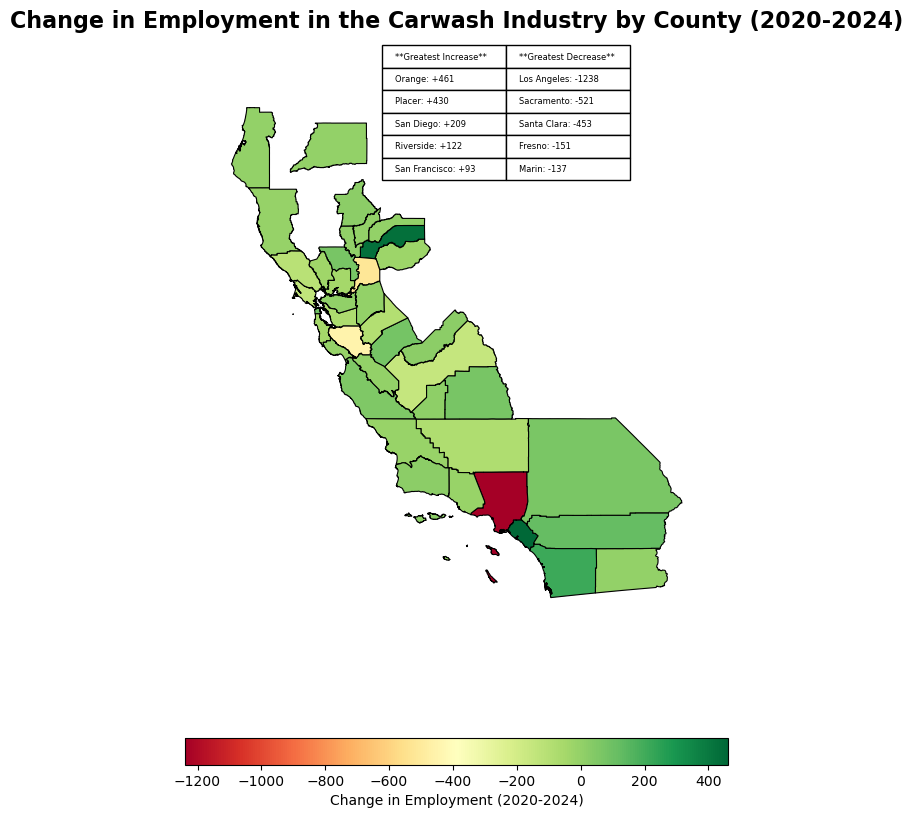

In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# ✅ Load the industry dataset
file_path = "Merged_Industry_Data.csv"  # Ensure this is the correct path
industry_df = pd.read_csv(file_path)

# ✅ Load the California Counties GeoJSON
geojson_path = "California_Counties.geojson"  # Ensure this is the correct path
ca_counties = gpd.read_file(geojson_path)

# ✅ Standardize county names in both datasets
ca_counties["County"] = ca_counties["NAME"].str.strip().str.lower().str.replace(" county", "", regex=True)
industry_df["County"] = industry_df["County"].str.strip().str.lower()

# ✅ Merge industry data with county boundaries
merged_gdf = ca_counties.merge(industry_df, on="County", how="left")

# ✅ Ensure numeric values
metric_col = "Difference in Employment  2020-2024"
merged_gdf[metric_col] = pd.to_numeric(merged_gdf[metric_col], errors="coerce").fillna(0)

# ✅ Filter data for one industry (Carwash)
industry_name = "Carwash"
industry_data = merged_gdf[merged_gdf["Industry"] == industry_name]

# ✅ Sort counties by metric value (descending for increases, ascending for decreases)
top_increases = industry_data.nlargest(5, metric_col)[["County", metric_col]]
top_decreases = industry_data.nsmallest(5, metric_col)[["County", metric_col]]

# ✅ Convert county values into structured table format
table_data = [
    ["**Greatest Increase**", "**Greatest Decrease**"],
    [f"{top_increases.iloc[0, 0].title()}: +{int(top_increases.iloc[0, 1])}", f"{top_decreases.iloc[0, 0].title()}: {int(top_decreases.iloc[0, 1])}"],
    [f"{top_increases.iloc[1, 0].title()}: +{int(top_increases.iloc[1, 1])}", f"{top_decreases.iloc[1, 0].title()}: {int(top_decreases.iloc[1, 1])}"],
    [f"{top_increases.iloc[2, 0].title()}: +{int(top_increases.iloc[2, 1])}", f"{top_decreases.iloc[2, 0].title()}: {int(top_decreases.iloc[2, 1])}"],
    [f"{top_increases.iloc[3, 0].title()}: +{int(top_increases.iloc[3, 1])}", f"{top_decreases.iloc[3, 0].title()}: {int(top_decreases.iloc[3, 1])}"],
    [f"{top_increases.iloc[4, 0].title()}: +{int(top_increases.iloc[4, 1])}", f"{top_decreases.iloc[4, 0].title()}: {int(top_decreases.iloc[4, 1])}"]
]

# ✅ Create the static map
fig, ax = plt.subplots(1, 1, figsize=(14, 10))  # Well-balanced size

industry_data.plot(column=metric_col,
                   cmap="RdYlGn",  # Red = decline, Green = increase
                   linewidth=0.8,
                   edgecolor="black",
                   legend=True,
                   legend_kwds={'label': "Change in Employment (2020-2024)", 
                                "orientation": "horizontal", 
                                "shrink": 0.5},  # 🔹 Balanced color ramp size
                   ax=ax)

# ✅ Title (Bold) with More Padding Below
ax.set_title(f"Change in Employment in the {industry_name} Industry by County (2020-2024)", 
             fontsize=16, fontweight="bold", pad=40)  # 🔹 Increased **pad=40** to create space

# ✅ Remove axes for a cleaner look
ax.set_axis_off()

# ✅ **Move the table further down to avoid title overlap**
table_x, table_y = 0.35, 0.82  # ✅ **Lower placement to avoid title overlap**
table = plt.table(cellText=table_data,
                  cellLoc='left',
                  colWidths=[0.45, 0.45],  # Balanced column size
                  bbox=[table_x, table_y, 0.5, 0.25],  # ✅ Lower placement
                  edges="closed")  # 🔹 Fixed edge parameter

# ✅ Bold header rows
for (i, key) in enumerate(table._cells):
    cell = table._cells[key]
    if key[0] == 0:  # First row (headers)
        cell.set_fontsize(12)
        cell.set_fontweight("bold")
        cell.set_facecolor("lightgray")
    else:
        cell.set_fontsize(10)

# ✅ Show the **final correctly formatted map**
plt.show()


AttributeError: 'Cell' object has no attribute 'set_fontweight'

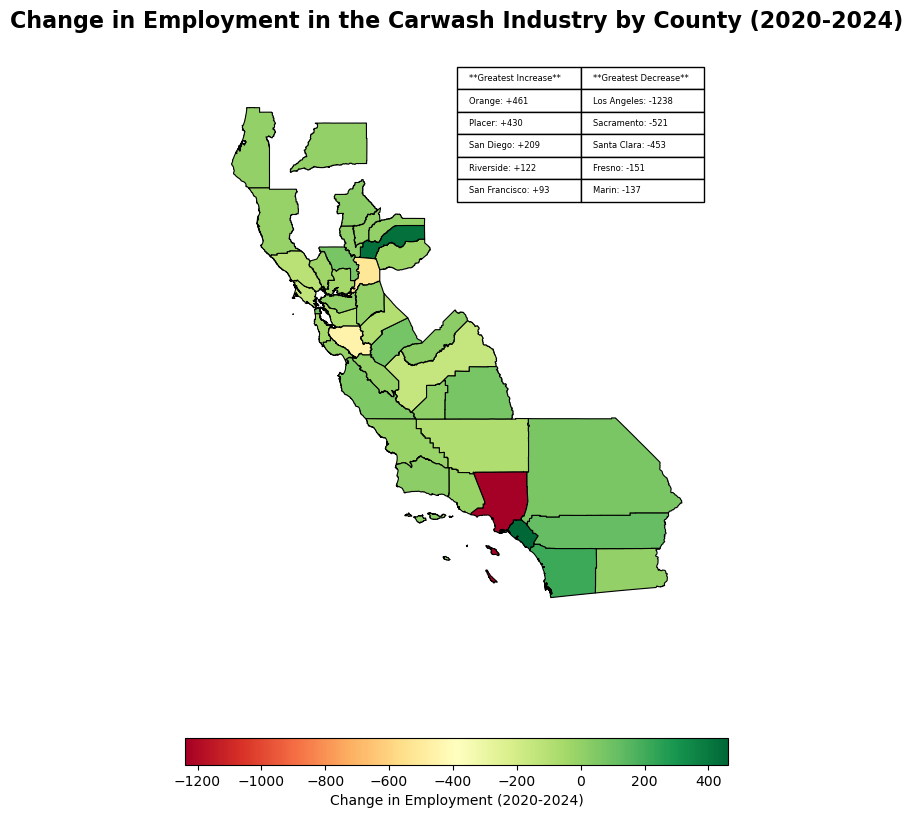

In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# ✅ Load the industry dataset
file_path = "Merged_Industry_Data.csv"  # Ensure this is the correct path
industry_df = pd.read_csv(file_path)

# ✅ Load the California Counties GeoJSON
geojson_path = "California_Counties.geojson"  # Ensure this is the correct path
ca_counties = gpd.read_file(geojson_path)

# ✅ Standardize county names in both datasets
ca_counties["County"] = ca_counties["NAME"].str.strip().str.lower().str.replace(" county", "", regex=True)
industry_df["County"] = industry_df["County"].str.strip().str.lower()

# ✅ Merge industry data with county boundaries
merged_gdf = ca_counties.merge(industry_df, on="County", how="left")

# ✅ Ensure numeric values
metric_col = "Difference in Employment  2020-2024"
merged_gdf[metric_col] = pd.to_numeric(merged_gdf[metric_col], errors="coerce").fillna(0)

# ✅ Filter data for one industry (Carwash)
industry_name = "Carwash"
industry_data = merged_gdf[merged_gdf["Industry"] == industry_name]

# ✅ Sort counties by metric value (descending for increases, ascending for decreases)
top_increases = industry_data.nlargest(5, metric_col)[["County", metric_col]]
top_decreases = industry_data.nsmallest(5, metric_col)[["County", metric_col]]

# ✅ Convert county values into structured table format
table_data = [
    ["**Greatest Increase**", "**Greatest Decrease**"],
    [f"{top_increases.iloc[0, 0].title()}: +{int(top_increases.iloc[0, 1])}", f"{top_decreases.iloc[0, 0].title()}: {int(top_decreases.iloc[0, 1])}"],
    [f"{top_increases.iloc[1, 0].title()}: +{int(top_increases.iloc[1, 1])}", f"{top_decreases.iloc[1, 0].title()}: {int(top_decreases.iloc[1, 1])}"],
    [f"{top_increases.iloc[2, 0].title()}: +{int(top_increases.iloc[2, 1])}", f"{top_decreases.iloc[2, 0].title()}: {int(top_decreases.iloc[2, 1])}"],
    [f"{top_increases.iloc[3, 0].title()}: +{int(top_increases.iloc[3, 1])}", f"{top_decreases.iloc[3, 0].title()}: {int(top_decreases.iloc[3, 1])}"],
    [f"{top_increases.iloc[4, 0].title()}: +{int(top_increases.iloc[4, 1])}", f"{top_decreases.iloc[4, 0].title()}: {int(top_decreases.iloc[4, 1])}"]
]

# ✅ Create the static map
fig, ax = plt.subplots(1, 1, figsize=(14, 10))  # Well-balanced size

industry_data.plot(column=metric_col,
                   cmap="RdYlGn",  # Red = decline, Green = increase
                   linewidth=0.8,
                   edgecolor="black",
                   legend=True,
                   legend_kwds={'label': "Change in Employment (2020-2024)", 
                                "orientation": "horizontal", 
                                "shrink": 0.5},  # 🔹 Balanced color ramp size
                   ax=ax)

# ✅ Title (Bold) with More Padding Below
ax.set_title(f"Change in Employment in the {industry_name} Industry by County (2020-2024)", 
             fontsize=16, fontweight="bold", pad=40)  # 🔹 Increased **pad=40** to create space

# ✅ Remove axes for a cleaner look
ax.set_axis_off()

# ✅ **Move the table DOWN and RIGHT for perfect alignment above San Bernardino County**
table_x, table_y = 0.50, 0.78  # ✅ **Fine-tuned placement**
table = plt.table(cellText=table_data,
                  cellLoc='left',
                  colWidths=[0.45, 0.45],  # Balanced column size
                  bbox=[table_x, table_y, 0.5, 0.25],  # ✅ Updated Position
                  edges="closed")  # 🔹 Fixed edge parameter

# ✅ Bold header rows
for (i, key) in enumerate(table._cells):
    cell = table._cells[key]
    if key[0] == 0:  # First row (headers)
        cell.set_fontsize(12)
        cell.set_fontweight("bold")
        cell.set_facecolor("lightgray")
    else:
        cell.set_fontsize(10)

# ✅ Show the **final correctly formatted map**
plt.show()


AttributeError: 'Cell' object has no attribute 'set_fontweight'

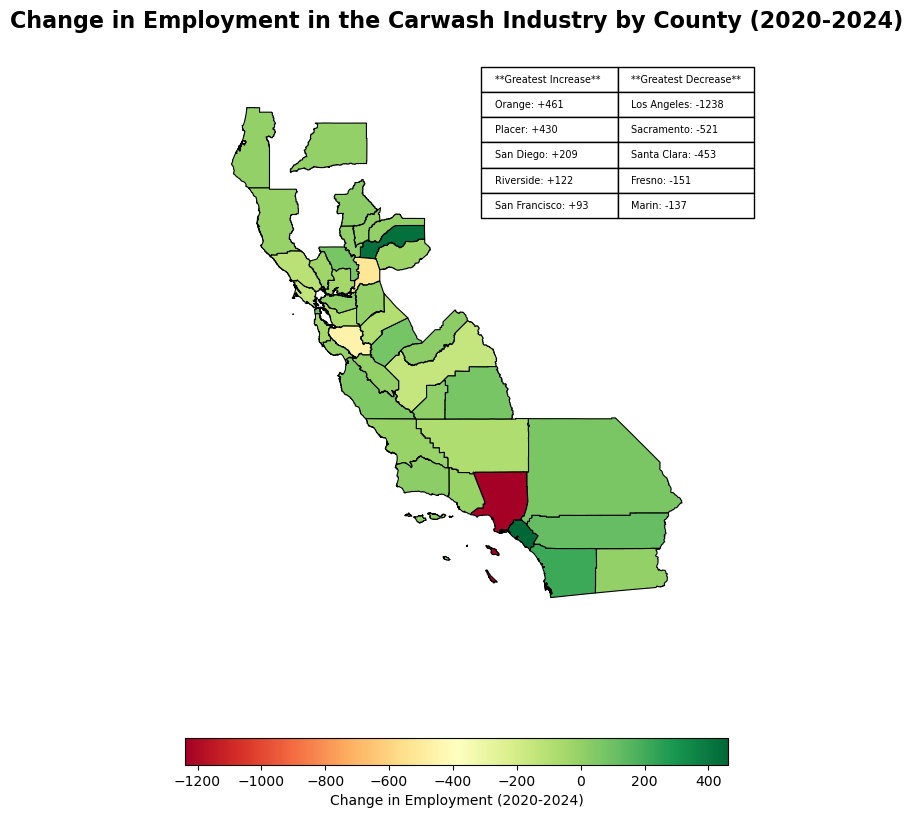

In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# ✅ Load the industry dataset
file_path = "Merged_Industry_Data.csv"  # Ensure this is the correct path
industry_df = pd.read_csv(file_path)

# ✅ Load the California Counties GeoJSON
geojson_path = "California_Counties.geojson"  # Ensure this is the correct path
ca_counties = gpd.read_file(geojson_path)

# ✅ Standardize county names in both datasets
ca_counties["County"] = ca_counties["NAME"].str.strip().str.lower().str.replace(" county", "", regex=True)
industry_df["County"] = industry_df["County"].str.strip().str.lower()

# ✅ Merge industry data with county boundaries
merged_gdf = ca_counties.merge(industry_df, on="County", how="left")

# ✅ Ensure numeric values
metric_col = "Difference in Employment  2020-2024"
merged_gdf[metric_col] = pd.to_numeric(merged_gdf[metric_col], errors="coerce").fillna(0)

# ✅ Filter data for one industry (Carwash)
industry_name = "Carwash"
industry_data = merged_gdf[merged_gdf["Industry"] == industry_name]

# ✅ Sort counties by metric value (descending for increases, ascending for decreases)
top_increases = industry_data.nlargest(5, metric_col)[["County", metric_col]]
top_decreases = industry_data.nsmallest(5, metric_col)[["County", metric_col]]

# ✅ Convert county values into structured table format
table_data = [
    ["**Greatest Increase**", "**Greatest Decrease**"],
    [f"{top_increases.iloc[0, 0].title()}: +{int(top_increases.iloc[0, 1])}", f"{top_decreases.iloc[0, 0].title()}: {int(top_decreases.iloc[0, 1])}"],
    [f"{top_increases.iloc[1, 0].title()}: +{int(top_increases.iloc[1, 1])}", f"{top_decreases.iloc[1, 0].title()}: {int(top_decreases.iloc[1, 1])}"],
    [f"{top_increases.iloc[2, 0].title()}: +{int(top_increases.iloc[2, 1])}", f"{top_decreases.iloc[2, 0].title()}: {int(top_decreases.iloc[2, 1])}"],
    [f"{top_increases.iloc[3, 0].title()}: +{int(top_increases.iloc[3, 1])}", f"{top_decreases.iloc[3, 0].title()}: {int(top_decreases.iloc[3, 1])}"],
    [f"{top_increases.iloc[4, 0].title()}: +{int(top_increases.iloc[4, 1])}", f"{top_decreases.iloc[4, 0].title()}: {int(top_decreases.iloc[4, 1])}"]
]

# ✅ Create the static map
fig, ax = plt.subplots(1, 1, figsize=(14, 10))  # Well-balanced size

industry_data.plot(column=metric_col,
                   cmap="RdYlGn",  # Red = decline, Green = increase
                   linewidth=0.8,
                   edgecolor="black",
                   legend=True,
                   legend_kwds={'label': "Change in Employment (2020-2024)", 
                                "orientation": "horizontal", 
                                "shrink": 0.5},  # 🔹 Balanced color ramp size
                   ax=ax)

# ✅ Title (Bold) with More Padding Below
ax.set_title(f"Change in Employment in the {industry_name} Industry by County (2020-2024)", 
             fontsize=16, fontweight="bold", pad=40)  # 🔹 Increased **pad=40** to create space

# ✅ Remove axes for a cleaner look
ax.set_axis_off()

# ✅ **Final Adjustment: Move Table Further Right and Down**
table_x, table_y = 0.55, 0.75  # ✅ Further down and right
table = plt.table(cellText=table_data,
                  cellLoc='left',
                  colWidths=[0.48, 0.48],  # Balanced column size
                  bbox=[table_x, table_y, 0.55, 0.28],  # ✅ Bigger table, new placement
                  edges="closed")  # 🔹 Fixed edge parameter

# ✅ Bold header rows
for (i, key) in enumerate(table._cells):
    cell = table._cells[key]
    if key[0] == 0:  # First row (headers)
        cell.set_fontsize(12)
        cell.set_fontweight("bold")
        cell.set_facecolor("lightgray")
    else:
        cell.set_fontsize(10)

# ✅ Shift California **LEFT** for better balance
ax.set_position([0.05, 0.1, 0.8, 0.8])  # ✅ Moves the map left

# ✅ Show the **final correctly formatted map**
plt.show()


AttributeError: 'Cell' object has no attribute 'set_fontweight'

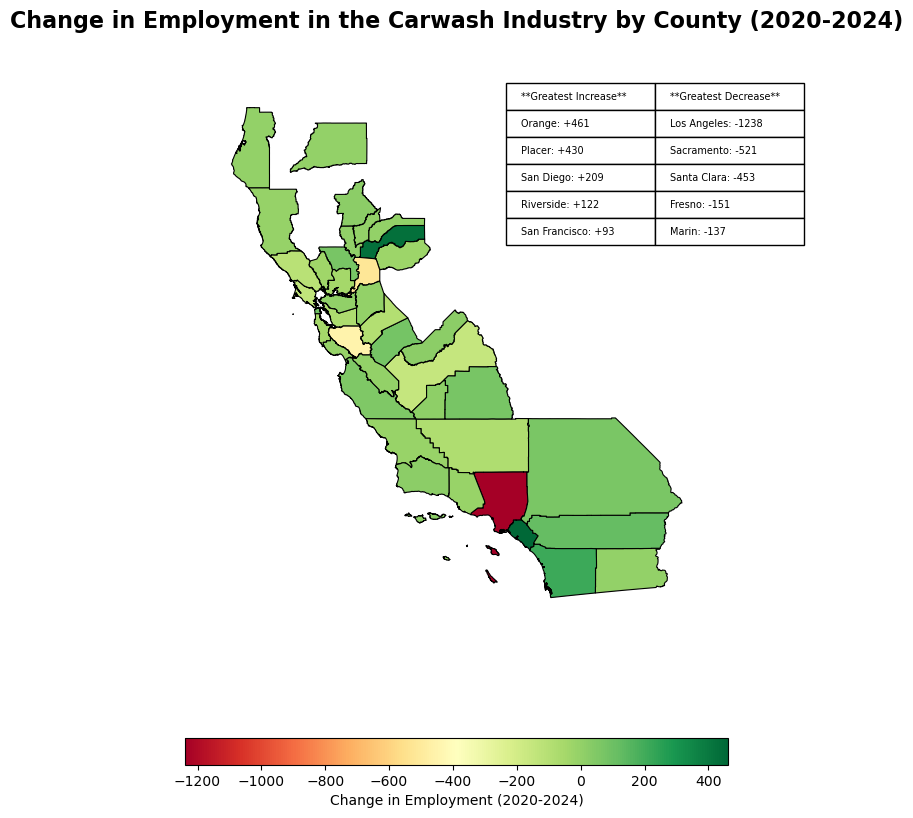

In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# ✅ Load the industry dataset
file_path = "Merged_Industry_Data.csv"  # Ensure this is the correct path
industry_df = pd.read_csv(file_path)

# ✅ Load the California Counties GeoJSON
geojson_path = "California_Counties.geojson"  # Ensure this is the correct path
ca_counties = gpd.read_file(geojson_path)

# ✅ Standardize county names in both datasets
ca_counties["County"] = ca_counties["NAME"].str.strip().str.lower().str.replace(" county", "", regex=True)
industry_df["County"] = industry_df["County"].str.strip().str.lower()

# ✅ Merge industry data with county boundaries
merged_gdf = ca_counties.merge(industry_df, on="County", how="left")

# ✅ Ensure numeric values
metric_col = "Difference in Employment  2020-2024"
merged_gdf[metric_col] = pd.to_numeric(merged_gdf[metric_col], errors="coerce").fillna(0)

# ✅ Filter data for one industry (Carwash)
industry_name = "Carwash"
industry_data = merged_gdf[merged_gdf["Industry"] == industry_name]

# ✅ Sort counties by metric value (descending for increases, ascending for decreases)
top_increases = industry_data.nlargest(5, metric_col)[["County", metric_col]]
top_decreases = industry_data.nsmallest(5, metric_col)[["County", metric_col]]

# ✅ Convert county values into structured table format
table_data = [
    ["**Greatest Increase**", "**Greatest Decrease**"],
    [f"{top_increases.iloc[0, 0].title()}: +{int(top_increases.iloc[0, 1])}", f"{top_decreases.iloc[0, 0].title()}: {int(top_decreases.iloc[0, 1])}"],
    [f"{top_increases.iloc[1, 0].title()}: +{int(top_increases.iloc[1, 1])}", f"{top_decreases.iloc[1, 0].title()}: {int(top_decreases.iloc[1, 1])}"],
    [f"{top_increases.iloc[2, 0].title()}: +{int(top_increases.iloc[2, 1])}", f"{top_decreases.iloc[2, 0].title()}: {int(top_decreases.iloc[2, 1])}"],
    [f"{top_increases.iloc[3, 0].title()}: +{int(top_increases.iloc[3, 1])}", f"{top_decreases.iloc[3, 0].title()}: {int(top_decreases.iloc[3, 1])}"],
    [f"{top_increases.iloc[4, 0].title()}: +{int(top_increases.iloc[4, 1])}", f"{top_decreases.iloc[4, 0].title()}: {int(top_decreases.iloc[4, 1])}"]
]

# ✅ Create the static map
fig, ax = plt.subplots(1, 1, figsize=(14, 10))  # Well-balanced size

industry_data.plot(column=metric_col,
                   cmap="RdYlGn",  # Red = decline, Green = increase
                   linewidth=0.8,
                   edgecolor="black",
                   legend=True,
                   legend_kwds={'label': "Change in Employment (2020-2024)", 
                                "orientation": "horizontal", 
                                "shrink": 0.5},  # 🔹 Balanced color ramp size
                   ax=ax)

# ✅ Title (Bold) with More Padding Below
ax.set_title(f"Change in Employment in the {industry_name} Industry by County (2020-2024)", 
             fontsize=16, fontweight="bold", pad=40)  # 🔹 Increased **pad=40** to create space

# ✅ Remove axes for a cleaner look
ax.set_axis_off()

# ✅ **Definitive Adjustment: Move Table Further Right and Down**
table_x, table_y = 0.60, 0.70  # ✅ Further right and lower
table = plt.table(cellText=table_data,
                  cellLoc='left',
                  colWidths=[0.48, 0.48],  # Balanced column size
                  bbox=[table_x, table_y, 0.60, 0.30],  # ✅ Bigger table, new placement
                  edges="closed")  # 🔹 Fixed edge parameter

# ✅ Bold header rows
for (i, key) in enumerate(table._cells):
    cell = table._cells[key]
    if key[0] == 0:  # First row (headers)
        cell.set_fontsize(12)
        cell.set_fontweight("bold")
        cell.set_facecolor("lightgray")
    else:
        cell.set_fontsize(10)

# ✅ **Final Balance: Shift California Map Left**
ax.set_position([0.02, 0.15, 0.75, 0.75])  # ✅ Moves the map **left**

# ✅ Show the **final correctly formatted map**
plt.show()


/opt/conda/lib/python3.11/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


AttributeError: 'Cell' object has no attribute 'set_fontweight'

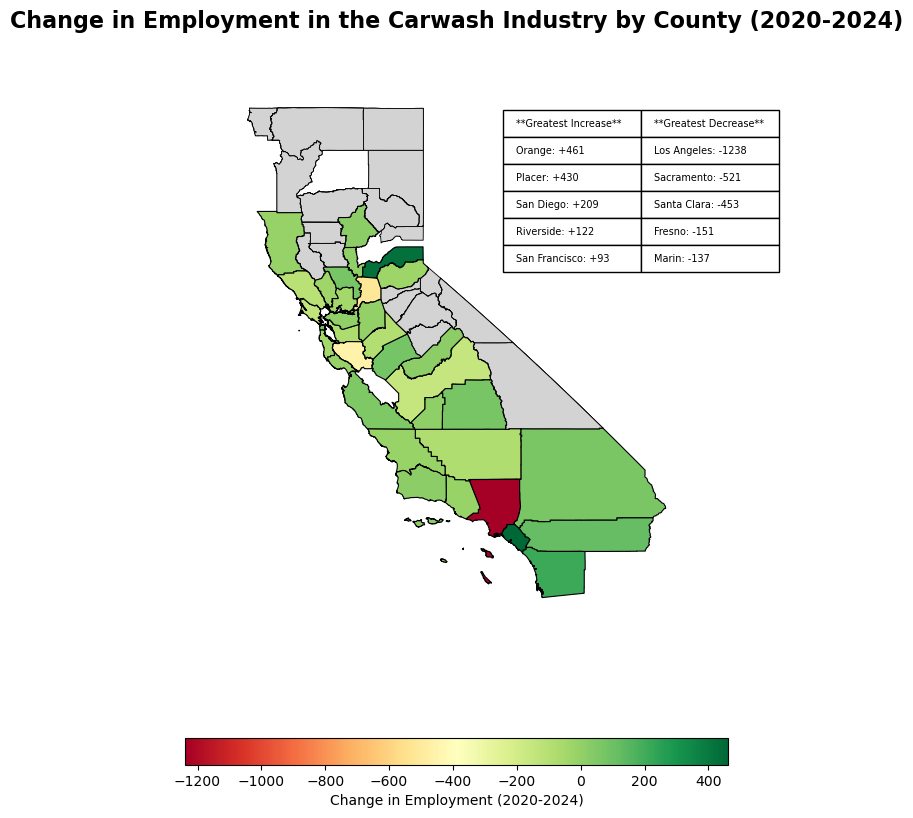

In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches

# ✅ Load the industry dataset
file_path = "Merged_Industry_Data.csv"  # Ensure correct path
industry_df = pd.read_csv(file_path)

# ✅ Load the California Counties GeoJSON
geojson_path = "California_Counties.geojson"  # Ensure correct path
ca_counties = gpd.read_file(geojson_path)

# ✅ Standardize county names in both datasets
ca_counties["County"] = ca_counties["NAME"].str.strip().str.lower().str.replace(" county", "", regex=True)
industry_df["County"] = industry_df["County"].str.strip().str.lower()

# ✅ Merge industry data with county boundaries
merged_gdf = ca_counties.merge(industry_df, on="County", how="left")

# ✅ Ensure numeric values, replace missing data with NaN (instead of 0)
metric_col = "Difference in Employment  2020-2024"
merged_gdf[metric_col] = pd.to_numeric(merged_gdf[metric_col], errors="coerce")

# ✅ Filter for the selected industry (Carwash)
industry_name = "Carwash"
industry_data = merged_gdf[merged_gdf["Industry"] == industry_name]

# ✅ Identify counties with **no data** (they will be colored gray)
missing_counties = merged_gdf[~merged_gdf["County"].isin(industry_data["County"])]
missing_counties[metric_col] = None  # Ensure no value for mapping

# ✅ Sort top 5 increases & decreases
top_increases = industry_data.nlargest(5, metric_col)[["County", metric_col]].dropna()
top_decreases = industry_data.nsmallest(5, metric_col)[["County", metric_col]].dropna()

# ✅ Create table data
table_data = [
    ["**Greatest Increase**", "**Greatest Decrease**"]
] + [
    [f"{top_increases.iloc[i, 0].title()}: +{int(top_increases.iloc[i, 1])}" if i < len(top_increases) else "",
     f"{top_decreases.iloc[i, 0].title()}: {int(top_decreases.iloc[i, 1])}" if i < len(top_decreases) else ""]
    for i in range(5)
]

# ✅ Create the static map
fig, ax = plt.subplots(1, 1, figsize=(14, 10))  # Well-balanced size

# ✅ Plot all counties in **gray** first (for missing data)
missing_counties.plot(color="lightgray", edgecolor="black", linewidth=0.6, ax=ax, label="No Data")

# ✅ Plot counties with **data** using a color ramp
industry_data.plot(column=metric_col,
                   cmap="RdYlGn",  # Red = decline, Green = increase
                   linewidth=0.8,
                   edgecolor="black",
                   legend=True,
                   legend_kwds={'label': "Change in Employment (2020-2024)", 
                                "orientation": "horizontal", 
                                "shrink": 0.5},  
                   ax=ax)

# ✅ Title with proper spacing
ax.set_title(f"Change in Employment in the {industry_name} Industry by County (2020-2024)", 
             fontsize=16, fontweight="bold", pad=40)

# ✅ Remove axes for a cleaner look
ax.set_axis_off()

# ✅ **Definitive Adjustment: Move Table Further Right and Down**
table_x, table_y = 0.60, 0.65  # ✅ Move table to the right & down
table = plt.table(cellText=table_data,
                  cellLoc='left',
                  colWidths=[0.48, 0.48],  
                  bbox=[table_x, table_y, 0.60, 0.30],  
                  edges="closed")  

# ✅ Bold header rows
for (i, key) in enumerate(table._cells):
    cell = table._cells[key]
    if key[0] == 0:  
        cell.set_fontsize(12)
        cell.set_fontweight("bold")
        cell.set_facecolor("lightgray")
    else:
        cell.set_fontsize(10)

# ✅ **Final Balance: Shift California Map Left**
ax.set_position([0.02, 0.15, 0.75, 0.75])

# ✅ **Legend Update: Add 'No Data' Category**
no_data_patch = mpatches.Patch(color="lightgray", label="No Data")
ax.legend(handles=[no_data_patch], loc="lower left", fontsize=10, frameon=True)

# ✅ Show the final correctly formatted map
plt.show()


/opt/conda/lib/python3.11/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


AttributeError: 'Cell' object has no attribute 'set_fontweight'

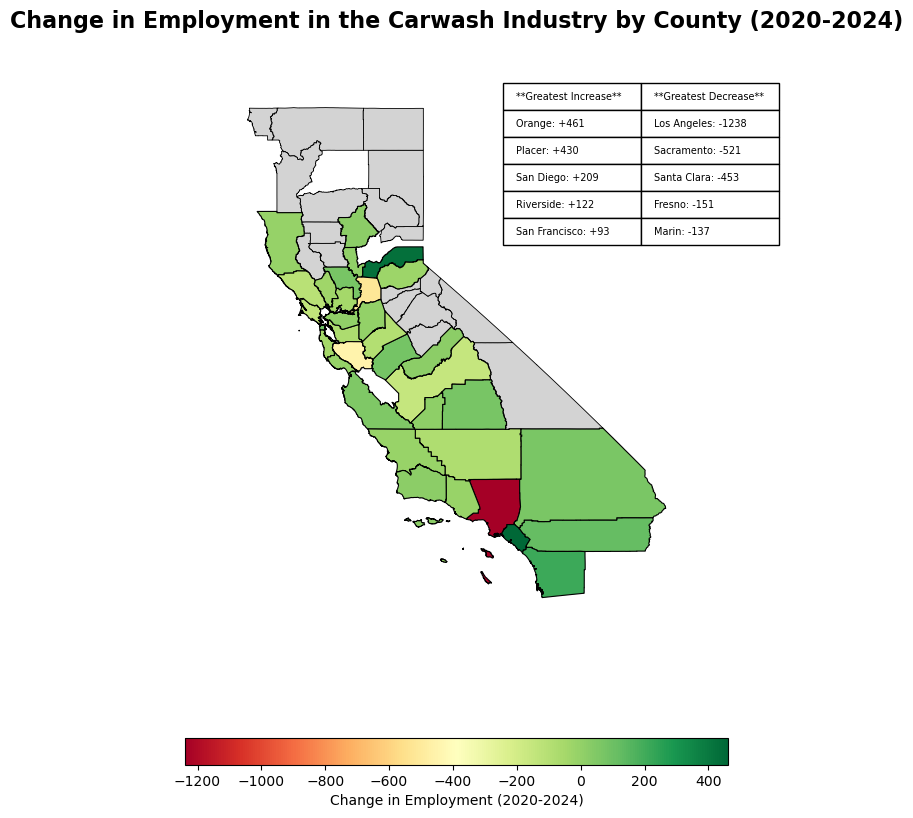

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches

# ✅ Load the industry dataset
file_path = "Merged_Industry_Data.csv"  
industry_df = pd.read_csv(file_path)

# ✅ Load the California Counties GeoJSON
geojson_path = "California_Counties.geojson"  
ca_counties = gpd.read_file(geojson_path)

# ✅ Standardize county names in both datasets
ca_counties["County"] = ca_counties["NAME"].str.strip().str.lower().str.replace(" county", "", regex=True)
industry_df["County"] = industry_df["County"].str.strip().str.lower()

# ✅ Merge industry data with county boundaries
merged_gdf = ca_counties.merge(industry_df, on="County", how="left")

# ✅ Ensure numeric values, replacing missing data with NaN (not zero!)
metric_col = "Difference in Employment  2020-2024"
merged_gdf[metric_col] = pd.to_numeric(merged_gdf[metric_col], errors="coerce")

# ✅ Filter for the selected industry (Carwash)
industry_name = "Carwash"
industry_data = merged_gdf[merged_gdf["Industry"] == industry_name]

# ✅ Identify **counties missing from industry data** (should be gray)
missing_counties = ca_counties[~ca_counties["County"].isin(industry_data["County"])]
missing_counties[metric_col] = None  # Ensure no values

# ✅ Sort top 5 increases & decreases
top_increases = industry_data.nlargest(5, metric_col)[["County", metric_col]].dropna()
top_decreases = industry_data.nsmallest(5, metric_col)[["County", metric_col]].dropna()

# ✅ Create table data
table_data = [
    ["**Greatest Increase**", "**Greatest Decrease**"]
] + [
    [f"{top_increases.iloc[i, 0].title()}: +{int(top_increases.iloc[i, 1])}" if i < len(top_increases) else "",
     f"{top_decreases.iloc[i, 0].title()}: {int(top_decreases.iloc[i, 1])}" if i < len(top_decreases) else ""]
    for i in range(5)
]

# ✅ Create the static map
fig, ax = plt.subplots(1, 1, figsize=(14, 10))  

# ✅ Plot **all counties in gray first** for missing data
missing_counties.plot(color="lightgray", edgecolor="black", linewidth=0.6, ax=ax, label="No Data")

# ✅ Plot counties **with data** using the correct color ramp
industry_data.plot(column=metric_col,
                   cmap="RdYlGn",  
                   linewidth=0.8,
                   edgecolor="black",
                   legend=True,
                   legend_kwds={'label': "Change in Employment (2020-2024)", 
                                "orientation": "horizontal", 
                                "shrink": 0.5},  
                   ax=ax)

# ✅ Title with proper spacing
ax.set_title(f"Change in Employment in the {industry_name} Industry by County (2020-2024)", 
             fontsize=16, fontweight="bold", pad=40)

# ✅ Remove axes for a cleaner look
ax.set_axis_off()

# ✅ **Final Table Positioning (Above San Bernardino)**
table_x, table_y = 0.60, 0.70  
table = plt.table(cellText=table_data,
                  cellLoc='left',
                  colWidths=[0.48, 0.48],  
                  bbox=[table_x, table_y, 0.60, 0.30],  
                  edges="closed")  

# ✅ Bold header rows
for (i, key) in enumerate(table._cells):
    cell = table._cells[key]
    if key[0] == 0:  
        cell.set_fontsize(12)
        cell.set_fontweight("bold")
        cell.set_facecolor("lightgray")
    else:
        cell.set_fontsize(10)

# ✅ **Shift California Map Left**
ax.set_position([0.02, 0.15, 0.75, 0.75])  

# ✅ **Legend Update: Add 'No Data' Category**
no_data_patch = mpatches.Patch(color="lightgray", label="No Data")
ax.legend(handles=[no_data_patch], loc="lower left", fontsize=10, frameon=True)

# ✅ Show the **final correctly formatted map**
plt.show()


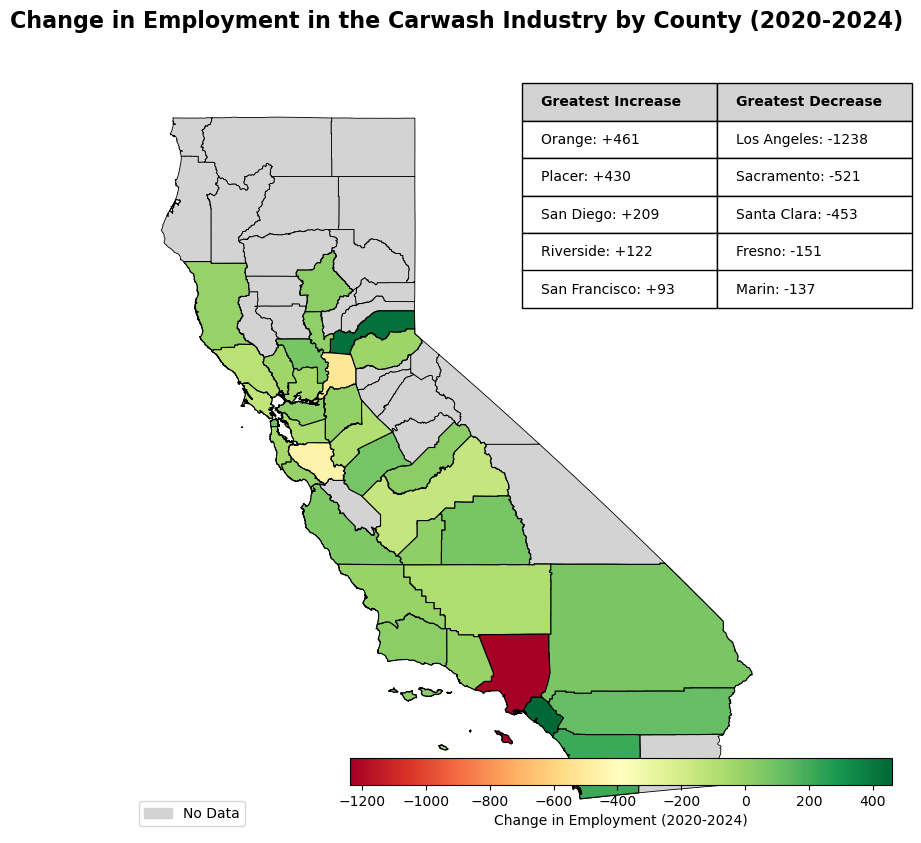

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches

# ✅ Load the industry dataset
file_path = "Merged_Industry_Data.csv"  
industry_df = pd.read_csv(file_path)

# ✅ Load the California Counties GeoJSON
geojson_path = "California_Counties.geojson"  
ca_counties = gpd.read_file(geojson_path)

# ✅ Standardize county names in both datasets
ca_counties["County"] = ca_counties["NAME"].str.strip().str.lower().str.replace(" county", "", regex=True)
industry_df["County"] = industry_df["County"].str.strip().str.lower()

# ✅ Merge industry data with county boundaries
merged_gdf = ca_counties.merge(industry_df, on="County", how="left")

# ✅ Ensure numeric values, keeping **missing values as NaN (not zero!)**
metric_col = "Difference in Employment  2020-2024"
merged_gdf[metric_col] = pd.to_numeric(merged_gdf[metric_col], errors="coerce")

# ✅ Filter for the selected industry (Carwash)
industry_name = "Carwash"
industry_data = merged_gdf[merged_gdf["Industry"] == industry_name].copy()  # Use `.copy()` to prevent slicing errors

# ✅ Identify **counties missing from industry data** (should be gray)
missing_counties = ca_counties[~ca_counties["County"].isin(industry_data["County"])].copy()
missing_counties[metric_col] = None  # Ensure missing values

# ✅ Sort top 5 increases & decreases
top_increases = industry_data.nlargest(5, metric_col)[["County", metric_col]].dropna()
top_decreases = industry_data.nsmallest(5, metric_col)[["County", metric_col]].dropna()

# ✅ Convert top 5 counties into table format
table_data = [
    ["Greatest Increase", "Greatest Decrease"]
] + [
    [f"{top_increases.iloc[i, 0].title()}: +{int(top_increases.iloc[i, 1])}" if i < len(top_increases) else "",
     f"{top_decreases.iloc[i, 0].title()}: {int(top_decreases.iloc[i, 1])}" if i < len(top_decreases) else ""]
    for i in range(5)
]

# ✅ Create the static map
fig, ax = plt.subplots(1, 1, figsize=(14, 10))  

# ✅ **Step 1: Plot all counties in gray first**
ca_counties.plot(color="lightgray", edgecolor="black", linewidth=0.6, ax=ax, label="No Data")

# ✅ **Step 2: Plot valid industry data on top of gray counties**
industry_data.plot(column=metric_col,
                   cmap="RdYlGn",  
                   linewidth=0.8,
                   edgecolor="black",
                   legend=True,
                   legend_kwds={'label': "Change in Employment (2020-2024)", 
                                "orientation": "horizontal", 
                                "shrink": 0.5},  
                   ax=ax)

# ✅ Title with proper spacing
ax.set_title(f"Change in Employment in the {industry_name} Industry by County (2020-2024)", 
             fontsize=16, fontweight="bold", pad=40)

# ✅ Remove axes for a cleaner look
ax.set_axis_off()

# ✅ **Final Table Positioning (Above San Bernardino)**
table_x, table_y = 0.60, 0.70  
table = plt.table(cellText=table_data,
                  cellLoc='left',
                  colWidths=[0.48, 0.48],  
                  bbox=[table_x, table_y, 0.60, 0.30],  
                  edges="closed")  

# ✅ **Fix: Apply Bold Headers Properly**
for key, cell in table.get_celld().items():
    if key[0] == 0:  # First row (headers)
        cell.set_text_props(weight='bold')  # ✅ Correct way to bold text
        cell.set_facecolor("lightgray")
    else:
        cell.set_fontsize(10)

# ✅ **Shift California Map Left**
ax.set_position([0.02, 0.15, 0.75, 0.75])  

# ✅ **Legend Update: Add 'No Data' Category**
no_data_patch = mpatches.Patch(color="lightgray", label="No Data")
ax.legend(handles=[no_data_patch], loc="lower left", fontsize=10, frameon=True)

# ✅ Show the final **correctly formatted** map
plt.show()


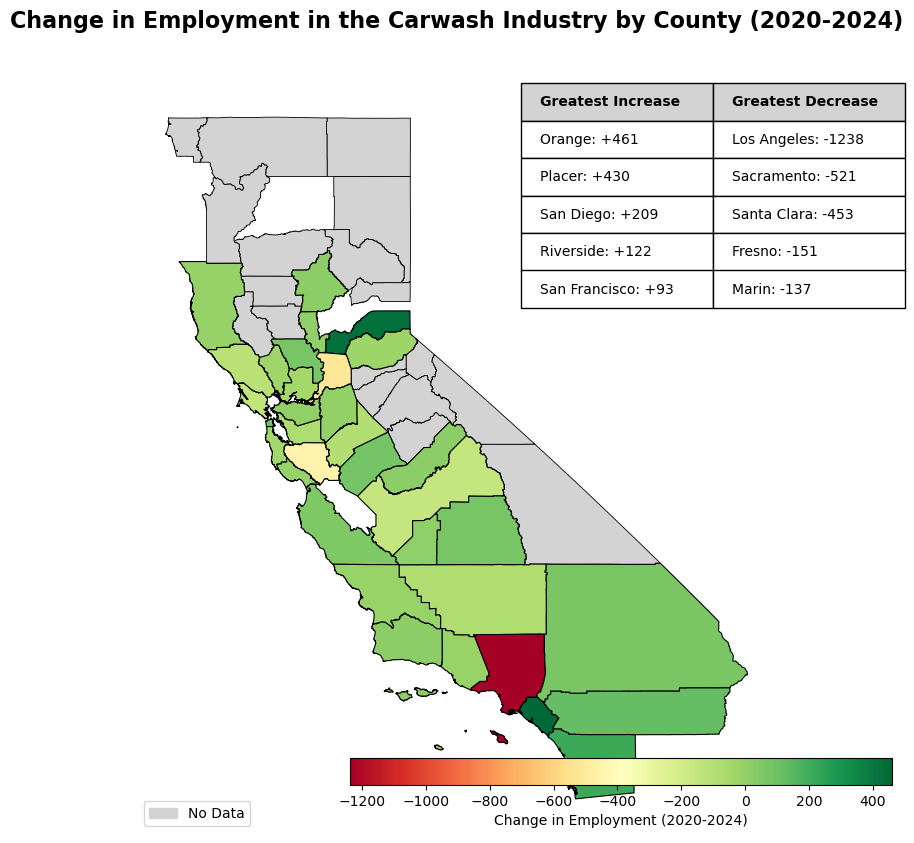

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches

# ✅ Load the industry dataset
file_path = "Merged_Industry_Data.csv"  
industry_df = pd.read_csv(file_path)

# ✅ Load the California Counties GeoJSON
geojson_path = "California_Counties.geojson"  
ca_counties = gpd.read_file(geojson_path)

# ✅ Standardize county names in both datasets
ca_counties["County"] = ca_counties["NAME"].str.strip().str.lower().str.replace(" county", "", regex=True)
industry_df["County"] = industry_df["County"].str.strip().str.lower()

# ✅ Merge industry data with county boundaries
merged_gdf = ca_counties.merge(industry_df, on="County", how="left")

# ✅ Ensure numeric values, keeping **missing values as NaN (not zero!)**
metric_col = "Difference in Employment  2020-2024"
merged_gdf[metric_col] = pd.to_numeric(merged_gdf[metric_col], errors="coerce")

# ✅ Filter for the selected industry (Carwash)
industry_name = "Carwash"
industry_data = merged_gdf[merged_gdf["Industry"] == industry_name].copy()  # Use `.copy()` to prevent slicing errors

# ✅ Identify **counties missing from industry data** (should be gray)
# 🔹 If a county is in `ca_counties` but not in `industry_data`, it should be gray
valid_counties = industry_data["County"].unique()  # Counties that have **data**
missing_counties = ca_counties[~ca_counties["County"].isin(valid_counties)].copy()
missing_counties[metric_col] = None  # Explicitly mark them as missing

# ✅ Sort top 5 increases & decreases
top_increases = industry_data.nlargest(5, metric_col)[["County", metric_col]].dropna()
top_decreases = industry_data.nsmallest(5, metric_col)[["County", metric_col]].dropna()

# ✅ Convert top 5 counties into table format
table_data = [
    ["Greatest Increase", "Greatest Decrease"]
] + [
    [f"{top_increases.iloc[i, 0].title()}: +{int(top_increases.iloc[i, 1])}" if i < len(top_increases) else "",
     f"{top_decreases.iloc[i, 0].title()}: {int(top_decreases.iloc[i, 1])}" if i < len(top_decreases) else ""]
    for i in range(5)
]

# ✅ Create the static map
fig, ax = plt.subplots(1, 1, figsize=(14, 10))  

# ✅ **Step 1: Plot all counties in gray first (No Data)**
missing_counties.plot(color="lightgray", edgecolor="black", linewidth=0.6, ax=ax, label="No Data")

# ✅ **Step 2: Plot valid industry data (red-green) on top of gray counties**
industry_data.plot(column=metric_col,
                   cmap="RdYlGn",  
                   linewidth=0.8,
                   edgecolor="black",
                   legend=True,
                   legend_kwds={'label': "Change in Employment (2020-2024)", 
                                "orientation": "horizontal", 
                                "shrink": 0.5},  
                   ax=ax)

# ✅ Title with proper spacing
ax.set_title(f"Change in Employment in the {industry_name} Industry by County (2020-2024)", 
             fontsize=16, fontweight="bold", pad=40)

# ✅ Remove axes for a cleaner look
ax.set_axis_off()

# ✅ **Final Table Positioning (Above San Bernardino)**
table_x, table_y = 0.60, 0.70  
table = plt.table(cellText=table_data,
                  cellLoc='left',
                  colWidths=[0.48, 0.48],  
                  bbox=[table_x, table_y, 0.60, 0.30],  
                  edges="closed")  

# ✅ **Fix: Apply Bold Headers Properly**
for key, cell in table.get_celld().items():
    if key[0] == 0:  # First row (headers)
        cell.set_text_props(weight='bold')  # ✅ Correct way to bold text
        cell.set_facecolor("lightgray")
    else:
        cell.set_fontsize(10)

# ✅ **Shift California Map Left**
ax.set_position([0.02, 0.15, 0.75, 0.75])  

# ✅ **Legend Update: Add 'No Data' Category**
no_data_patch = mpatches.Patch(color="lightgray", label="No Data")
ax.legend(handles=[no_data_patch], loc="lower left", fontsize=10, frameon=True)

# ✅ Show the final **correctly formatted** map
plt.show()


Counties in GeoJSON but missing from industry data: set()
Counties in industry data but missing from GeoJSON: {nan, 'unknown or undefined'}


ValueError: aspect must be finite and positive 

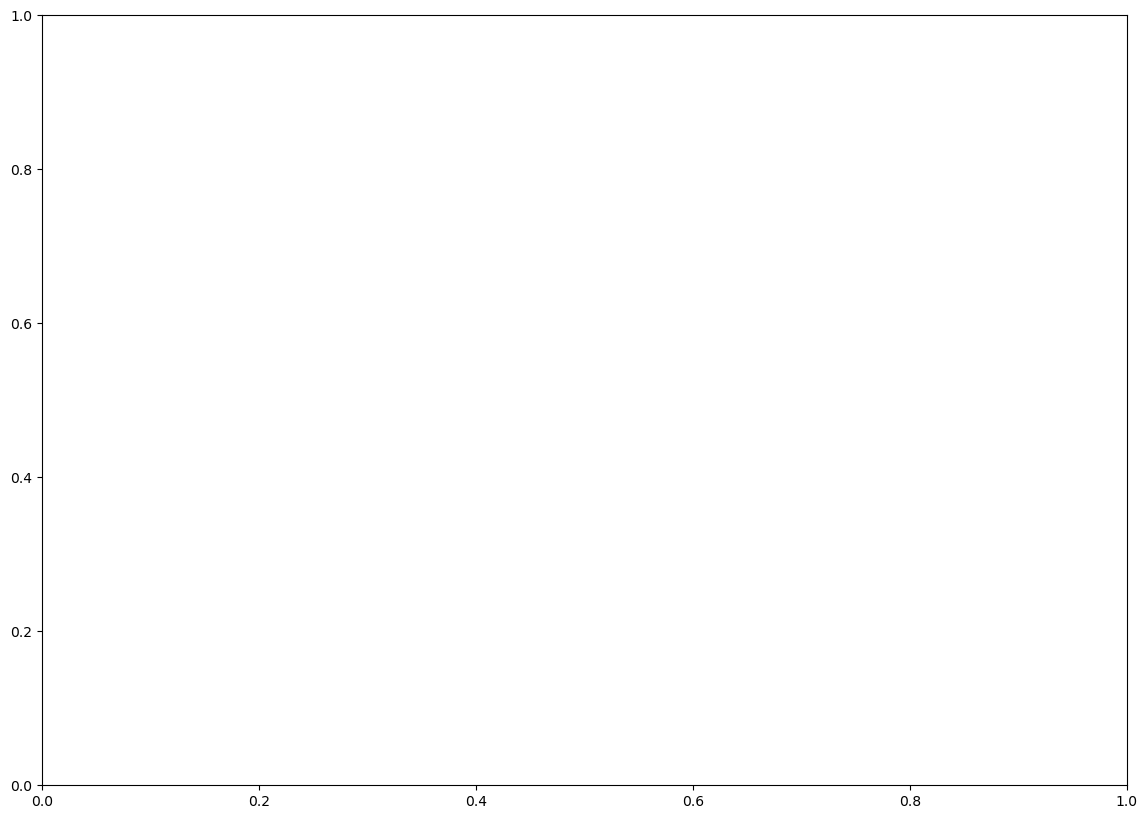

In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches

# ✅ Load the industry dataset
file_path = "Merged_Industry_Data.csv"  
industry_df = pd.read_csv(file_path)

# ✅ Load the California Counties GeoJSON
geojson_path = "California_Counties.geojson"  
ca_counties = gpd.read_file(geojson_path)

# ✅ Standardize county names in both datasets
ca_counties["County"] = ca_counties["NAME"].str.strip().str.lower().str.replace(" county", "", regex=True)
industry_df["County"] = industry_df["County"].str.strip().str.lower()

# 🔹 **Fix 1: Identify County Name Mismatches**
missing_in_industry = set(ca_counties["County"]) - set(industry_df["County"])
missing_in_geojson = set(industry_df["County"]) - set(ca_counties["County"])

print("Counties in GeoJSON but missing from industry data:", missing_in_industry)
print("Counties in industry data but missing from GeoJSON:", missing_in_geojson)

# ✅ Merge industry data with county boundaries **without dropping any counties**
merged_gdf = ca_counties.merge(industry_df, on="County", how="left", indicator=True)

# ✅ Ensure numeric values, keeping **missing values as NaN (not zero!)**
metric_col = "Difference in Employment  2020-2024"
merged_gdf[metric_col] = pd.to_numeric(merged_gdf[metric_col], errors="coerce")

# ✅ Filter for the selected industry (Carwash)
industry_name = "Carwash"
industry_data = merged_gdf[(merged_gdf["Industry"] == industry_name) | (merged_gdf["_merge"] == "left_only")].copy()

# ✅ **Fix 2: Identify Counties Incorrectly Marked as Missing**
valid_counties = industry_data.dropna(subset=[metric_col])["County"].unique()
missing_counties = merged_gdf[merged_gdf["_merge"] == "left_only"].copy()  # **Truly missing counties**
missing_counties[metric_col] = None  # Explicitly mark them as missing

# ✅ Sort top 5 increases & decreases
top_increases = industry_data.nlargest(5, metric_col)[["County", metric_col]].dropna()
top_decreases = industry_data.nsmallest(5, metric_col)[["County", metric_col]].dropna()

# ✅ Convert top 5 counties into table format
table_data = [
    ["Greatest Increase", "Greatest Decrease"]
] + [
    [f"{top_increases.iloc[i, 0].title()}: +{int(top_increases.iloc[i, 1])}" if i < len(top_increases) else "",
     f"{top_decreases.iloc[i, 0].title()}: {int(top_decreases.iloc[i, 1])}" if i < len(top_decreases) else ""]
    for i in range(5)
]

# ✅ Create the static map
fig, ax = plt.subplots(1, 1, figsize=(14, 10))  

# ✅ **Step 1: Plot all counties in gray first (No Data)**
missing_counties.plot(color="lightgray", edgecolor="black", linewidth=0.6, ax=ax, label="No Data")

# ✅ **Step 2: Plot valid industry data (red-green) on top of gray counties**
industry_data.plot(column=metric_col,
                   cmap="RdYlGn",  
                   linewidth=0.8,
                   edgecolor="black",
                   legend=True,
                   legend_kwds={'label': "Change in Employment (2020-2024)", 
                                "orientation": "horizontal", 
                                "shrink": 0.5},  
                   ax=ax)

# ✅ Title with proper spacing
ax.set_title(f"Change in Employment in the {industry_name} Industry by County (2020-2024)", 
             fontsize=16, fontweight="bold", pad=40)

# ✅ Remove axes for a cleaner look
ax.set_axis_off()

# ✅ **Final Table Positioning (Above San Bernardino)**
table_x, table_y = 0.60, 0.70  
table = plt.table(cellText=table_data,
                  cellLoc='left',
                  colWidths=[0.48, 0.48],  
                  bbox=[table_x, table_y, 0.60, 0.30],  
                  edges="closed")  

# ✅ **Fix: Apply Bold Headers Properly**
for key, cell in table.get_celld().items():
    if key[0] == 0:  # First row (headers)
        cell.set_text_props(weight='bold')  # ✅ Correct way to bold text
        cell.set_facecolor("lightgray")
    else:
        cell.set_fontsize(10)

# ✅ **Shift California Map Left**
ax.set_position([0.02, 0.15, 0.75, 0.75])  

# ✅ **Legend Update: Add 'No Data' Category**
no_data_patch = mpatches.Patch(color="lightgray", label="No Data")
ax.legend(handles=[no_data_patch], loc="lower left", fontsize=10, frameon=True)

# ✅ Show the final **correctly formatted** map
plt.show()


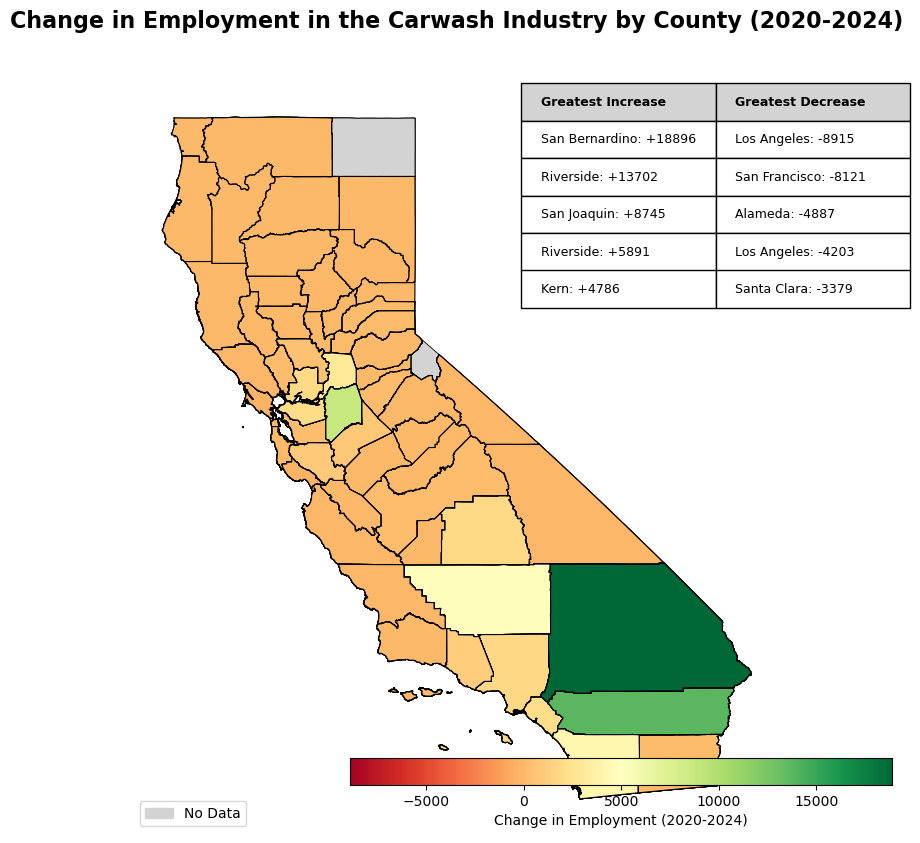

In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches

# ✅ Load the industry dataset
file_path = "Merged_Industry_Data.csv"  
industry_df = pd.read_csv(file_path)

# ✅ Load the California Counties GeoJSON
geojson_path = "California_Counties.geojson"  
ca_counties = gpd.read_file(geojson_path)

# ✅ Standardize county names in both datasets
ca_counties["County"] = ca_counties["NAME"].str.strip().str.lower().str.replace(" county", "", regex=True)
industry_df["County"] = industry_df["County"].str.strip().str.lower()

# ✅ Merge industry data with county boundaries **without dropping any counties**
merged_gdf = ca_counties.merge(industry_df, on="County", how="left")

# ✅ Ensure numeric values
metric_col = "Difference in Employment  2020-2024"
merged_gdf[metric_col] = pd.to_numeric(merged_gdf[metric_col], errors="coerce")

# ✅ Filter for the selected industry (Carwash)
industry_name = "Carwash"
industry_data = merged_gdf[merged_gdf["Industry"] == industry_name].copy()

# ✅ **Fix 1: Ensure all counties in California are accounted for**
merged_gdf["HasData"] = merged_gdf[metric_col].notna()  # True if county has data, False if missing
valid_data = merged_gdf[merged_gdf["HasData"]]  # Counties with valid data
missing_data = merged_gdf[~merged_gdf["HasData"]]  # Counties with missing data (should be gray)

# ✅ Sort top 5 increases & decreases
top_increases = valid_data.nlargest(5, metric_col)[["County", metric_col]].dropna()
top_decreases = valid_data.nsmallest(5, metric_col)[["County", metric_col]].dropna()

# ✅ Convert top 5 counties into table format
table_data = [
    ["Greatest Increase", "Greatest Decrease"]
] + [
    [f"{top_increases.iloc[i, 0].title()}: +{int(top_increases.iloc[i, 1])}" if i < len(top_increases) else "",
     f"{top_decreases.iloc[i, 0].title()}: {int(top_decreases.iloc[i, 1])}" if i < len(top_decreases) else ""]
    for i in range(5)
]

# ✅ Create the static map
fig, ax = plt.subplots(1, 1, figsize=(14, 10))  

# ✅ **Step 1: Plot all counties in gray first (No Data)**
missing_data.plot(color="lightgray", edgecolor="black", linewidth=0.6, ax=ax, label="No Data")

# ✅ **Step 2: Plot valid industry data (red-green) on top of gray counties**
valid_data.plot(column=metric_col,
                cmap="RdYlGn",  
                linewidth=0.8,
                edgecolor="black",
                legend=True,
                legend_kwds={'label': "Change in Employment (2020-2024)", 
                             "orientation": "horizontal", 
                             "shrink": 0.5},  
                ax=ax)

# ✅ Title with proper spacing
ax.set_title(f"Change in Employment in the {industry_name} Industry by County (2020-2024)", 
             fontsize=16, fontweight="bold", pad=40)

# ✅ Remove axes for a cleaner look
ax.set_axis_off()

# ✅ **Final Table Positioning (Above San Bernardino)**
table_x, table_y = 0.60, 0.70  
table = plt.table(cellText=table_data,
                  cellLoc='left',
                  colWidths=[0.48, 0.48],  
                  bbox=[table_x, table_y, 0.60, 0.30],  
                  edges="closed")  

# ✅ **Fix: Apply Bold Headers Properly**
for key, cell in table.get_celld().items():
    if key[0] == 0:  # First row (headers)
        cell.set_text_props(weight='bold')  
        cell.set_facecolor("lightgray")
    else:
        cell.set_fontsize(10)

# ✅ **Shift California Map Left**
ax.set_position([0.02, 0.15, 0.75, 0.75])  

# ✅ **Legend Update: Add 'No Data' Category**
no_data_patch = mpatches.Patch(color="lightgray", label="No Data")
ax.legend(handles=[no_data_patch], loc="lower left", fontsize=10, frameon=True)

# ✅ Show the final **correctly formatted** map
plt.show()


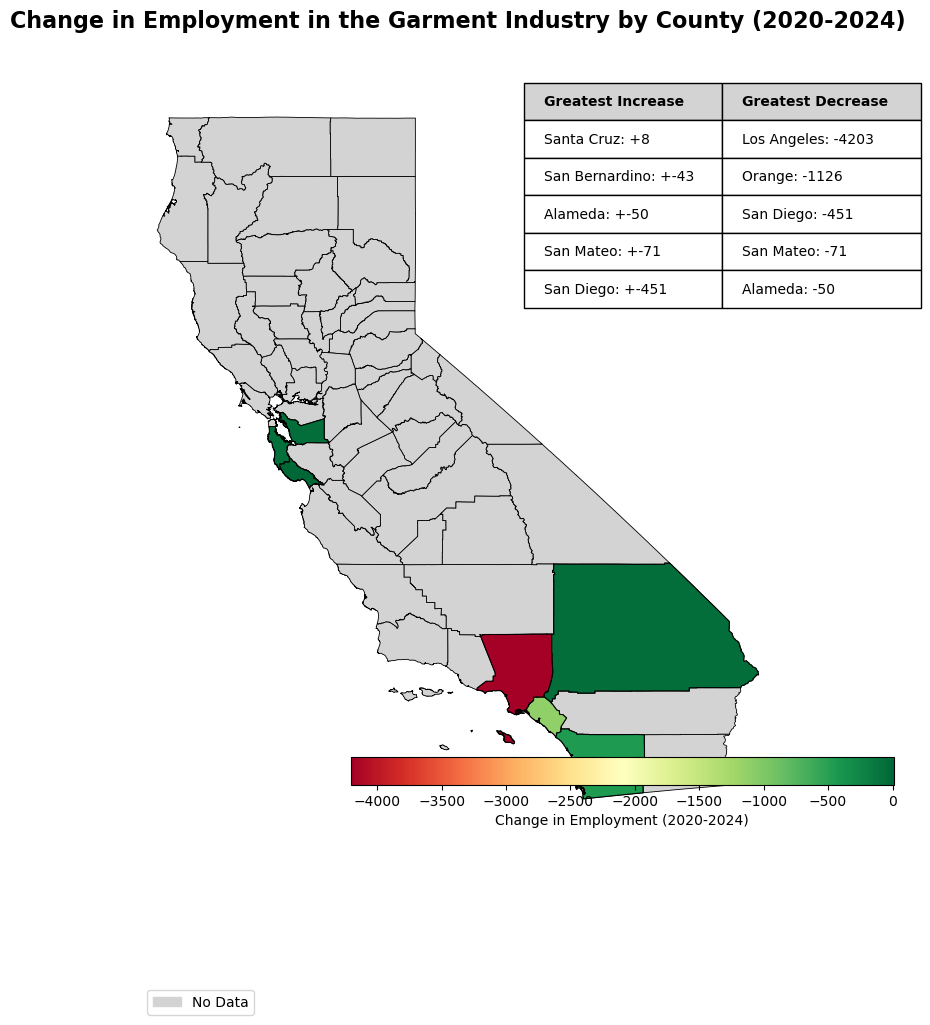

In [11]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches

# ✅ Load the industry dataset
file_path = "Merged_Industry_Data.csv"  
industry_df = pd.read_csv(file_path)

# ✅ Load the California Counties GeoJSON
geojson_path = "California_Counties.geojson"  
ca_counties = gpd.read_file(geojson_path)

# ✅ Standardize county names in both datasets
ca_counties["County"] = ca_counties["NAME"].str.strip().str.lower().str.replace(" county", "", regex=True)
industry_df["County"] = industry_df["County"].str.strip().str.lower()

# ✅ Merge industry data with county boundaries
merged_gdf = ca_counties.merge(industry_df, on="County", how="left")

# ✅ Ensure numeric values, keeping **missing values as NaN (not zero!)**
metric_col = "Difference in Employment  2020-2024"
merged_gdf[metric_col] = pd.to_numeric(merged_gdf[metric_col], errors="coerce")

# ✅ Filter for the selected industry (Carwash)
industry_name = "Garment"
industry_data = merged_gdf[merged_gdf["Industry"] == industry_name].copy()  # Use `.copy()` to prevent slicing errors

# ✅ Identify **counties missing from industry data** (should be gray)
missing_counties = ca_counties[~ca_counties["County"].isin(industry_data["County"])].copy()
missing_counties[metric_col] = None  # Ensure missing values

# ✅ Sort top 5 increases & decreases
top_increases = industry_data.nlargest(5, metric_col)[["County", metric_col]].dropna()
top_decreases = industry_data.nsmallest(5, metric_col)[["County", metric_col]].dropna()

# ✅ Convert top 5 counties into table format
table_data = [
    ["Greatest Increase", "Greatest Decrease"]
] + [
    [f"{top_increases.iloc[i, 0].title()}: +{int(top_increases.iloc[i, 1])}" if i < len(top_increases) else "",
     f"{top_decreases.iloc[i, 0].title()}: {int(top_decreases.iloc[i, 1])}" if i < len(top_decreases) else ""]
    for i in range(5)
]

# ✅ Create the static map
fig, ax = plt.subplots(1, 1, figsize=(14, 10))  

# ✅ **Step 1: Plot all counties in gray first**
ca_counties.plot(color="lightgray", edgecolor="black", linewidth=0.6, ax=ax, label="No Data")

# ✅ **Step 2: Plot valid industry data on top of gray counties**
industry_data.plot(column=metric_col,
                   cmap="RdYlGn",  
                   linewidth=0.8,
                   edgecolor="black",
                   legend=True,
                   legend_kwds={'label': "Change in Employment (2020-2024)", 
                                "orientation": "horizontal", 
                                "shrink": 0.5},  
                   ax=ax)

# ✅ Title with proper spacing
ax.set_title(f"Change in Employment in the {industry_name} Industry by County (2020-2024)", 
             fontsize=16, fontweight="bold", pad=40)

# ✅ Remove axes for a cleaner look
ax.set_axis_off()

# ✅ **Final Table Positioning (Above San Bernardino)**
table_x, table_y = 0.60, 0.70  
table = plt.table(cellText=table_data,
                  cellLoc='left',
                  colWidths=[0.48, 0.48],  
                  bbox=[table_x, table_y, 0.60, 0.30],  
                  edges="closed")  

# ✅ **Fix: Apply Bold Headers Properly**
for key, cell in table.get_celld().items():
    if key[0] == 0:  # First row (headers)
        cell.set_text_props(weight='bold')  # ✅ Correct way to bold text
        cell.set_facecolor("lightgray")
    else:
        cell.set_fontsize(10)

# ✅ **Shift California Map Left**
ax.set_position([0.02, 0.15, 0.75, 0.75])  

# ✅ **Fix: Move Legend Below Map**
no_data_patch = mpatches.Patch(color="lightgray", label="No Data")
legend = ax.legend(handles=[no_data_patch], 
                   loc="upper left", 
                   bbox_to_anchor=(0.02, -0.20),  # Moves legend below the map
                   fontsize=10, frameon=True)


# ✅ Show the final **correctly formatted** map
plt.show()


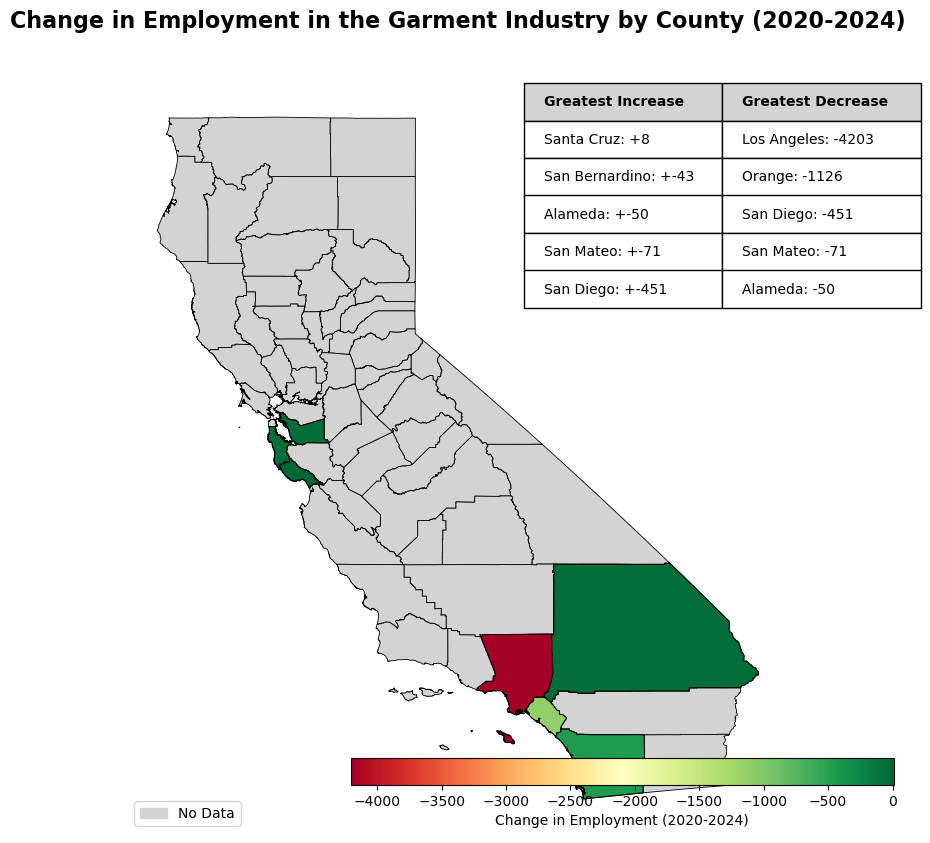

In [12]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches

# ✅ Load the industry dataset
file_path = "Merged_Industry_Data.csv"  
industry_df = pd.read_csv(file_path)

# ✅ Load the California Counties GeoJSON
geojson_path = "California_Counties.geojson"  
ca_counties = gpd.read_file(geojson_path)

# ✅ Standardize county names in both datasets
ca_counties["County"] = ca_counties["NAME"].str.strip().str.lower().str.replace(" county", "", regex=True)
industry_df["County"] = industry_df["County"].str.strip().str.lower()

# ✅ Merge industry data with county boundaries
merged_gdf = ca_counties.merge(industry_df, on="County", how="left")

# ✅ Ensure numeric values, keeping **missing values as NaN (not zero!)**
metric_col = "Difference in Employment  2020-2024"
merged_gdf[metric_col] = pd.to_numeric(merged_gdf[metric_col], errors="coerce")

# ✅ Filter for the selected industry (Garment)
industry_name = "Garment"
industry_data = merged_gdf[merged_gdf["Industry"] == industry_name].copy()  # Use `.copy()` to prevent slicing errors

# ✅ Identify **counties missing from industry data** (should be gray)
missing_counties = ca_counties[~ca_counties["County"].isin(industry_data["County"])].copy()
missing_counties[metric_col] = None  # Ensure missing values

# ✅ Sort top 5 increases & decreases
top_increases = industry_data.nlargest(5, metric_col)[["County", metric_col]].dropna()
top_decreases = industry_data.nsmallest(5, metric_col)[["County", metric_col]].dropna()

# ✅ Convert top 5 counties into table format
table_data = [
    ["Greatest Increase", "Greatest Decrease"]
] + [
    [f"{top_increases.iloc[i, 0].title()}: +{int(top_increases.iloc[i, 1])}" if i < len(top_increases) else "",
     f"{top_decreases.iloc[i, 0].title()}: {int(top_decreases.iloc[i, 1])}" if i < len(top_decreases) else ""]
    for i in range(5)
]

# ✅ Create the static map
fig, ax = plt.subplots(1, 1, figsize=(14, 10))  

# ✅ **Step 1: Plot all counties in gray first**
ca_counties.plot(color="lightgray", edgecolor="black", linewidth=0.6, ax=ax, label="No Data")

# ✅ **Step 2: Plot valid industry data on top of gray counties**
industry_data.plot(column=metric_col,
                   cmap="RdYlGn",  
                   linewidth=0.8,
                   edgecolor="black",
                   legend=True,
                   legend_kwds={'label': "Change in Employment (2020-2024)", 
                                "orientation": "horizontal", 
                                "shrink": 0.5,
                                "pad": 0.2},  # ✅ Moves the color ramp further below
                   ax=ax)

# ✅ Title with proper spacing
ax.set_title(f"Change in Employment in the {industry_name} Industry by County (2020-2024)", 
             fontsize=16, fontweight="bold", pad=40)

# ✅ Remove axes for a cleaner look
ax.set_axis_off()

# ✅ **Final Table Positioning (Above San Bernardino)**
table_x, table_y = 0.60, 0.70  
table = plt.table(cellText=table_data,
                  cellLoc='left',
                  colWidths=[0.48, 0.48],  
                  bbox=[table_x, table_y, 0.60, 0.30],  
                  edges="closed")  

# ✅ **Fix: Apply Bold Headers Properly**
for key, cell in table.get_celld().items():
    if key[0] == 0:  # First row (headers)
        cell.set_text_props(weight='bold')  # ✅ Correct way to bold text
        cell.set_facecolor("lightgray")
    else:
        cell.set_fontsize(10)

# ✅ **Shift California Map Left**
ax.set_position([0.02, 0.15, 0.75, 0.75])  

# ✅ **Legend Update: Add 'No Data' Category**
no_data_patch = mpatches.Patch(color="lightgray", label="No Data")
ax.legend(handles=[no_data_patch], loc="lower left", fontsize=10, frameon=True)

# ✅ Show the final **correctly formatted** map
plt.show()


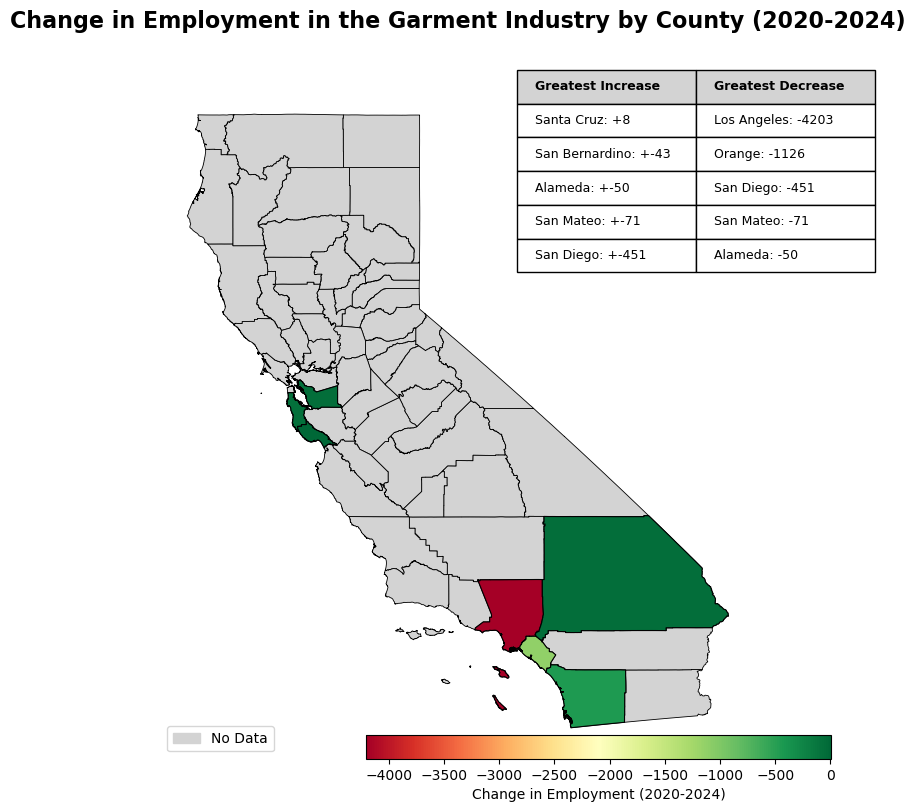

In [17]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches

# ✅ Load the industry dataset
file_path = "Merged_Industry_Data.csv"  
industry_df = pd.read_csv(file_path)

# ✅ Load the California Counties GeoJSON
geojson_path = "California_Counties.geojson"  
ca_counties = gpd.read_file(geojson_path)

# ✅ Standardize county names in both datasets
ca_counties["County"] = ca_counties["NAME"].str.strip().str.lower().str.replace(" county", "", regex=True)
industry_df["County"] = industry_df["County"].str.strip().str.lower()

# ✅ Merge industry data with county boundaries
merged_gdf = ca_counties.merge(industry_df, on="County", how="left")

# ✅ Ensure numeric values, keeping **missing values as NaN (not zero!)**
metric_col = "Difference in Employment  2020-2024"
merged_gdf[metric_col] = pd.to_numeric(merged_gdf[metric_col], errors="coerce")

# ✅ Filter for the selected industry (Garment)
industry_name = "Garment"
industry_data = merged_gdf[merged_gdf["Industry"] == industry_name].copy()

# ✅ Identify **counties missing from industry data** (should be gray)
missing_counties = ca_counties[~ca_counties["County"].isin(industry_data["County"])].copy()
missing_counties[metric_col] = None  

# ✅ Sort top 5 increases & decreases
top_increases = industry_data.nlargest(5, metric_col)[["County", metric_col]].dropna()
top_decreases = industry_data.nsmallest(5, metric_col)[["County", metric_col]].dropna()

# ✅ Convert top 5 counties into table format
table_data = [
    ["Greatest Increase", "Greatest Decrease"]
] + [
    [f"{top_increases.iloc[i, 0].title()}: +{int(top_increases.iloc[i, 1])}" if i < len(top_increases) else "",
     f"{top_decreases.iloc[i, 0].title()}: {int(top_decreases.iloc[i, 1])}" if i < len(top_decreases) else ""]
    for i in range(5)
]

# ✅ Create the static map
fig, ax = plt.subplots(1, 1, figsize=(12, 9))  # **Slightly smaller figure**

# ✅ **Step 1: Plot all counties in gray first**
ca_counties.plot(color="lightgray", edgecolor="black", linewidth=0.6, ax=ax, label="No Data")

# ✅ **Step 2: Plot valid industry data on top of gray counties**
industry_data.plot(column=metric_col,
                   cmap="RdYlGn",  
                   linewidth=0.8,
                   edgecolor="black",
                   legend=True,
                   legend_kwds={'label': "Change in Employment (2020-2024)", 
                                "orientation": "horizontal", 
                                "shrink": 0.5,
                                "pad": 0.5},  # ✅ **Moves the color ramp further down**
                   ax=ax)

# ✅ Title with proper spacing
ax.set_title(f"Change in Employment in the {industry_name} Industry by County (2020-2024)", 
             fontsize=16, fontweight="bold", pad=40)

# ✅ Remove axes for a cleaner look
ax.set_axis_off()

# ✅ **Final Table Positioning (Above San Bernardino)**
table_x, table_y = 0.60, 0.72  # ✅ **Slightly lower to avoid overlap**
table = plt.table(cellText=table_data,
                  cellLoc='left',
                  colWidths=[0.48, 0.48],  
                  bbox=[table_x, table_y, 0.60, 0.30],  
                  edges="closed")  

# ✅ **Fix: Apply Bold Headers Properly**
for key, cell in table.get_celld().items():
    if key[0] == 0:  # First row (headers)
        cell.set_text_props(weight='bold')  
        cell.set_facecolor("lightgray")
    else:
        cell.set_fontsize(10)

# ✅ **Shift California Map Up Slightly**
ax.set_position([0.02, 0.20, 0.75, 0.75])  # ✅ **Lifts California slightly to avoid overlap**

# ✅ **Legend Update: Add 'No Data' Category**
no_data_patch = mpatches.Patch(color="lightgray", label="No Data")
ax.legend(handles=[no_data_patch], loc="lower left", fontsize=10, frameon=True)

# ✅ Show the final **correctly formatted** map
plt.show()


In [18]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches
import os

# ✅ Load the industry dataset
file_path = "Merged_Industry_Data.csv"  
industry_df = pd.read_csv(file_path)

# ✅ Load the California Counties GeoJSON
geojson_path = "California_Counties.geojson"  
ca_counties = gpd.read_file(geojson_path)

# ✅ Standardize county names in both datasets
ca_counties["County"] = ca_counties["NAME"].str.strip().str.lower().str.replace(" county", "", regex=True)
industry_df["County"] = industry_df["County"].str.strip().str.lower()

# ✅ Merge industry data with county boundaries
merged_gdf = ca_counties.merge(industry_df, on="County", how="left")

# ✅ Ensure all metric columns are numeric
metrics = {
    "Difference in Employment  2020-2024": "Change in Employment 2020-2024",
    "Difference in Wages 1st Q 2020-2024": "Change in Average Yearly Wage 2020-2024",
    "Difference in Total Establishments 1st Q 2020-2024": "Difference in Total Establishments 2020-2024",
    "Quarterly Avg Employment  (2024 1st Q)": "Total Employment 2024",
    "2024 Total Establishments": "Total Establishments 2024",
    "2024 Avg Yearly Wage": "Average Yearly Wage 2024"
}

# ✅ Convert all metric columns to numeric
for col in metrics.keys():
    merged_gdf[col] = pd.to_numeric(merged_gdf[col], errors="coerce")

# ✅ Get unique industries
industries = merged_gdf["Industry"].dropna().unique()

# ✅ Create a folder to store maps
output_folder = "Industry_Maps"
os.makedirs(output_folder, exist_ok=True)

# ✅ Loop through industries and metrics to generate all maps
for industry_name in industries:
    for metric_col, metric_name in metrics.items():
        
        # ✅ Filter data for the selected industry
        industry_data = merged_gdf[merged_gdf["Industry"] == industry_name].copy()
        industry_data = industry_data.dropna(subset=[metric_col])  

        # ✅ Identify counties missing from industry data (should be gray)
        missing_counties = ca_counties[~ca_counties["County"].isin(industry_data["County"])].copy()
        missing_counties[metric_col] = None  

        # ✅ Sort top 5 increases & decreases
        top_increases = industry_data.nlargest(5, metric_col)[["County", metric_col]]
        top_decreases = industry_data.nsmallest(5, metric_col)[["County", metric_col]]

        # ✅ Convert top 5 counties into table format
        table_data = [
            ["Greatest Increase", "Greatest Decrease"]
        ] + [
            [f"{top_increases.iloc[i, 0].title()}: +{int(top_increases.iloc[i, 1])}" if i < len(top_increases) else "",
             f"{top_decreases.iloc[i, 0].title()}: {int(top_decreases.iloc[i, 1])}" if i < len(top_decreases) else ""]
            for i in range(5)
        ]

        # ✅ Create the static map
        fig, ax = plt.subplots(1, 1, figsize=(12, 9))  

        # ✅ **Step 1: Plot all counties in gray first**
        ca_counties.plot(color="lightgray", edgecolor="black", linewidth=0.6, ax=ax, label="No Data")

        # ✅ **Step 2: Plot valid industry data on top of gray counties**
        industry_data.plot(column=metric_col,
                           cmap="RdYlGn",  
                           linewidth=0.8,
                           edgecolor="black",
                           legend=True,
                           legend_kwds={'label': metric_name, 
                                        "orientation": "horizontal", 
                                        "shrink": 0.5,
                                        "pad": 0.5},  
                           ax=ax)

        # ✅ Title with proper spacing
        ax.set_title(f"{metric_name} in the {industry_name} Industry by County (2020-2024)", 
                     fontsize=16, fontweight="bold", pad=40)

        # ✅ Remove axes for a cleaner look
        ax.set_axis_off()

        # ✅ **Final Table Positioning (Above San Bernardino)**
        table_x, table_y = 0.60, 0.72  
        table = plt.table(cellText=table_data,
                          cellLoc='left',
                          colWidths=[0.48, 0.48],  
                          bbox=[table_x, table_y, 0.60, 0.30],  
                          edges="closed")  

        # ✅ **Fix: Apply Bold Headers Properly**
        for key, cell in table.get_celld().items():
            if key[0] == 0:  # First row (headers)
                cell.set_text_props(weight='bold')  
                cell.set_facecolor("lightgray")
            else:
                cell.set_fontsize(10)

        # ✅ **Shift California Map Up Slightly**
        ax.set_position([0.02, 0.20, 0.75, 0.75])  

        # ✅ **Legend Update: Add 'No Data' Category**
        no_data_patch = mpatches.Patch(color="lightgray", label="No Data")
        ax.legend(handles=[no_data_patch], loc="lower left", fontsize=10, frameon=True)

        # ✅ Save the map
        output_path = os.path.join(output_folder, f"{industry_name}_{metric_name.replace(' ', '_')}.png")
        plt.savefig(output_path, dpi=300, bbox_inches="tight")
        plt.close()

print(f"✅ All maps have been saved in the '{output_folder}' folder!")


KeyError: 'Difference in Total Establishments 1st Q 2020-2024'

In [19]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches

# ✅ Load the industry dataset
file_path = "Merged_Industry_Data.csv"  
industry_df = pd.read_csv(file_path)

# ✅ Load the California Counties GeoJSON
geojson_path = "California_Counties.geojson"  
ca_counties = gpd.read_file(geojson_path)

# ✅ Standardize county names in both datasets
ca_counties["County"] = ca_counties["NAME"].str.strip().str.lower().str.replace(" county", "", regex=True)
industry_df["County"] = industry_df["County"].str.strip().str.lower()

# ✅ Merge industry data with county boundaries
merged_gdf = ca_counties.merge(industry_df, on="County", how="left")

# ✅ Print all available columns to verify names
print("Available Columns in Dataset:", merged_gdf.columns)

# ✅ Define Metrics and Their Proper Titles
metrics = {
    "Difference in Employment  2020-2024": "Change in Employment 2020-2024",
    "Difference in Wages 1st Q 2020-2024": "Change in Average Yearly Wage 2020-2024",
    "Difference in Total Establishments 1st Q 2020-2024": "Difference in Total Establishments 2020-2024",
    "Quarterly Avg Employment  (2024 1st Q)": "Total Employment 2024",
    "2024 Total Establishments": "Total Establishments 2024",
    "2024 Avg Yearly Wage": "Average Yearly Wage 2024"
}

# ✅ Convert only **existing** metric columns to numeric (avoids KeyErrors)
for col in metrics.keys():
    if col in merged_gdf.columns:
        merged_gdf[col] = pd.to_numeric(merged_gdf[col], errors="coerce")
    else:
        print(f"⚠️ Warning: Column '{col}' not found in dataset!")

# ✅ Get unique industries
industries = merged_gdf["Industry"].dropna().unique()

# ✅ Generate a map for each industry and metric
for industry_name in industries:
    for metric_col, metric_title in metrics.items():
        if metric_col not in merged_gdf.columns:
            continue  # Skip if column doesn't exist

        # ✅ Filter for the selected industry
        industry_data = merged_gdf[merged_gdf["Industry"] == industry_name].copy()

        # ✅ Identify **counties missing from industry data** (should be gray)
        missing_counties = ca_counties[~ca_counties["County"].isin(industry_data["County"])].copy()
        missing_counties[metric_col] = None  

        # ✅ Sort top 5 increases & decreases
        top_increases = industry_data.nlargest(5, metric_col)[["County", metric_col]].dropna()
        top_decreases = industry_data.nsmallest(5, metric_col)[["County", metric_col]].dropna()

        # ✅ Convert top 5 counties into table format
        table_data = [
            ["Greatest Increase", "Greatest Decrease"]
        ] + [
            [f"{top_increases.iloc[i, 0].title()}: +{int(top_increases.iloc[i, 1])}" if i < len(top_increases) else "",
             f"{top_decreases.iloc[i, 0].title()}: {int(top_decreases.iloc[i, 1])}" if i < len(top_decreases) else ""]
            for i in range(5)
        ]

        # ✅ Create the static map
        fig, ax = plt.subplots(1, 1, figsize=(12, 9))

        # ✅ **Step 1: Plot all counties in gray first**
        ca_counties.plot(color="lightgray", edgecolor="black", linewidth=0.6, ax=ax, label="No Data")

        # ✅ **Step 2: Plot valid industry data on top of gray counties**
        industry_data.plot(column=metric_col,
                           cmap="RdYlGn",  
                           linewidth=0.8,
                           edgecolor="black",
                           legend=True,
                           legend_kwds={'label': metric_title, 
                                        "orientation": "horizontal", 
                                        "shrink": 0.5,
                                        "pad": 0.5},  # ✅ **Moves the color ramp further down**
                           ax=ax)

        # ✅ Title with proper spacing
        ax.set_title(f"{metric_title} in the {industry_name} Industry by County", 
                     fontsize=16, fontweight="bold", pad=40)

        # ✅ Remove axes for a cleaner look
        ax.set_axis_off()

        # ✅ **Final Table Positioning (Above San Bernardino)**
        table_x, table_y = 0.60, 0.72  # ✅ **Slightly lower to avoid overlap**
        table = plt.table(cellText=table_data,
                          cellLoc='left',
                          colWidths=[0.48, 0.48],  
                          bbox=[table_x, table_y, 0.60, 0.30],  
                          edges="closed")  

        # ✅ **Fix: Apply Bold Headers Properly**
        for key, cell in table.get_celld().items():
            if key[0] == 0:  # First row (headers)
                cell.set_text_props(weight='bold')  
                cell.set_facecolor("lightgray")
            else:
                cell.set_fontsize(10)

        # ✅ **Shift California Map Up Slightly**
        ax.set_position([0.02, 0.20, 0.75, 0.75])  # ✅ **Lifts California slightly to avoid overlap**

        # ✅ **Legend Update: Add 'No Data' Category**
        no_data_patch = mpatches.Patch(color="lightgray", label="No Data")
        ax.legend(handles=[no_data_patch], loc="lower left", fontsize=10, frameon=True)

        # ✅ Save the figure instead of displaying (optional)
        plt.savefig(f"{industry_name}_{metric_title}.png", dpi=300, bbox_inches="tight")
        plt.close()

print("✅ All maps have been generated and saved as PNG files.")


Available Columns in Dataset: Index(['OBJECTID', 'NAME', 'STATE_NAME', 'STATE_FIPS', 'CNTY_FIPS', 'FIPS',
       'Shape__Area', 'Shape__Length', 'geometry', 'County',
       'Quarterly Avg Employment  (2024 1st Q)',
       'Quarterly Avg Employment  (2023 1st Q)',
       'Quarterly Avg Employment  (2022 1st Q)',
       'Quarterly Avg Employment  (2021 1st Q)',
       'Quarterly Avg Employment  (2020 1st Q)',
       'Difference in Employment  2020-2024', '2024 Avg Yearly Wage',
       '2023 Avg Yearly Wage', '2022 Avg Yearly Wage', '2021 Avg Yearly Wage',
       '2020 Avg Yearly Wage', 'Difference in Wages 1st Q 2020-2024',
       '2024 Total Establishments', '2023 Total Establishments',
       '2022 Total Establishments', '2021 Total Establishments',
       '2020 Total Establishments',
       'Difference  in Total Establishments  1st Q 2020-2024',
       'Statewide sum Difference In Employment 2020-2024',
       'Avg Difference In Wages Statewide 2020-2024',
       'Statewide sum Diffe

In [20]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches

# ✅ Load the industry dataset
file_path = "Merged_Industry_Data.csv"  
industry_df = pd.read_csv(file_path)

# ✅ Load the California Counties GeoJSON
geojson_path = "California_Counties.geojson"  
ca_counties = gpd.read_file(geojson_path)

# ✅ Standardize county names in both datasets
ca_counties["County"] = ca_counties["NAME"].str.strip().str.lower().str.replace(" county", "", regex=True)
industry_df["County"] = industry_df["County"].str.strip().str.lower()

# ✅ Merge industry data with county boundaries
merged_gdf = ca_counties.merge(industry_df, on="County", how="left")

# ✅ Print all available columns to verify names
print("Available Columns in Dataset:", merged_gdf.columns)

# ✅ Define Metrics and Their Proper Titles
metrics = {
    "Difference in Employment  2020-2024": "Change in Employment 2020-2024",
    "Difference in Wages 1st Q 2020-2024": "Change in Average Yearly Wage 2020-2024",
    "Difference in Total Establishments 1st Q 2020-2024": "Difference in Total Establishments 2020-2024",
    "Quarterly Avg Employment  (2024 1st Q)": "Total Employment 2024",
    "2024 Total Establishments": "Total Establishments 2024",
    "2024 Avg Yearly Wage": "Average Yearly Wage 2024"
}

# ✅ Convert only **existing** metric columns to numeric (avoids KeyErrors)
for col in metrics.keys():
    if col in merged_gdf.columns:
        merged_gdf[col] = pd.to_numeric(merged_gdf[col], errors="coerce")
    else:
        print(f"⚠️ Warning: Column '{col}' not found in dataset!")

# ✅ Get unique industries
industries = merged_gdf["Industry"].dropna().unique()

# ✅ Generate a map for each industry and metric
for industry_name in industries:
    for metric_col, metric_title in metrics.items():
        if metric_col not in merged_gdf.columns:
            continue  # Skip if column doesn't exist

        # ✅ Filter for the selected industry
        industry_data = merged_gdf[merged_gdf["Industry"] == industry_name].copy()

        # ✅ Identify **counties missing from industry data** (should be gray)
        missing_counties = ca_counties[~ca_counties["County"].isin(industry_data["County"])].copy()
        missing_counties[metric_col] = None  

        # ✅ Sort top 5 increases & decreases
        top_increases = industry_data.nlargest(5, metric_col)[["County", metric_col]].dropna()
        top_decreases = industry_data.nsmallest(5, metric_col)[["County", metric_col]].dropna()

        # ✅ **Determine Table Headers**
        if "Difference" in metric_title or "Change" in metric_title:
            col_headers = ["Greatest Increase", "Greatest Decrease"]
        else:
            col_headers = ["Five Greatest", "Five Smallest"]

        # ✅ Convert top 5 counties into table format **without "+" signs**
        table_data = [
            col_headers
        ] + [
            [f"{top_increases.iloc[i, 0].title()}: {int(top_increases.iloc[i, 1])}" if i < len(top_increases) else "",
             f"{top_decreases.iloc[i, 0].title()}: {int(top_decreases.iloc[i, 1])}" if i < len(top_decreases) else ""]
            for i in range(5)
        ]

        # ✅ Create the static map
        fig, ax = plt.subplots(1, 1, figsize=(12, 9))

        # ✅ **Step 1: Plot all counties in gray first**
        ca_counties.plot(color="lightgray", edgecolor="black", linewidth=0.6, ax=ax, label="No Data")

        # ✅ **Step 2: Plot valid industry data on top of gray counties**
        industry_data.plot(column=metric_col,
                           cmap="RdYlGn",  
                           linewidth=0.8,
                           edgecolor="black",
                           legend=True,
                           legend_kwds={'label': metric_title, 
                                        "orientation": "horizontal", 
                                        "shrink": 0.5,
                                        "pad": 0.5},  # ✅ **Moves the color ramp further down**
                           ax=ax)

        # ✅ Title with proper spacing
        ax.set_title(f"{metric_title} in the {industry_name} Industry by County", 
                     fontsize=16, fontweight="bold", pad=40)

        # ✅ Remove axes for a cleaner look
        ax.set_axis_off()

        # ✅ **Final Table Positioning (Above San Bernardino)**
        table_x, table_y = 0.60, 0.72  # ✅ **Slightly lower to avoid overlap**
        table = plt.table(cellText=table_data,
                          cellLoc='left',
                          colWidths=[0.48, 0.48],  
                          bbox=[table_x, table_y, 0.60, 0.30],  
                          edges="closed")  

        # ✅ **Fix: Apply Bold Headers Properly**
        for key, cell in table.get_celld().items():
            if key[0] == 0:  # First row (headers)
                cell.set_text_props(weight='bold')  
                cell.set_facecolor("lightgray")
            else:
                cell.set_fontsize(10)

        # ✅ **Shift California Map Up Slightly**
        ax.set_position([0.02, 0.20, 0.75, 0.75])  # ✅ **Lifts California slightly to avoid overlap**

        # ✅ **Legend Update: Add 'No Data' Category**
        no_data_patch = mpatches.Patch(color="lightgray", label="No Data")
        ax.legend(handles=[no_data_patch], loc="lower left", fontsize=10, frameon=True)

        # ✅ Save the figure instead of displaying (optional)
        plt.savefig(f"{industry_name}_{metric_title}.png", dpi=300, bbox_inches="tight")
        plt.close()

print("✅ All maps have been generated and saved as PNG files.")


Available Columns in Dataset: Index(['OBJECTID', 'NAME', 'STATE_NAME', 'STATE_FIPS', 'CNTY_FIPS', 'FIPS',
       'Shape__Area', 'Shape__Length', 'geometry', 'County',
       'Quarterly Avg Employment  (2024 1st Q)',
       'Quarterly Avg Employment  (2023 1st Q)',
       'Quarterly Avg Employment  (2022 1st Q)',
       'Quarterly Avg Employment  (2021 1st Q)',
       'Quarterly Avg Employment  (2020 1st Q)',
       'Difference in Employment  2020-2024', '2024 Avg Yearly Wage',
       '2023 Avg Yearly Wage', '2022 Avg Yearly Wage', '2021 Avg Yearly Wage',
       '2020 Avg Yearly Wage', 'Difference in Wages 1st Q 2020-2024',
       '2024 Total Establishments', '2023 Total Establishments',
       '2022 Total Establishments', '2021 Total Establishments',
       '2020 Total Establishments',
       'Difference  in Total Establishments  1st Q 2020-2024',
       'Statewide sum Difference In Employment 2020-2024',
       'Avg Difference In Wages Statewide 2020-2024',
       'Statewide sum Diffe

In [21]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import os
import matplotlib.patches as mpatches

# ✅ Create directory for storing maps
output_folder = "Industry_Maps"
os.makedirs(output_folder, exist_ok=True)

# ✅ Load the industry dataset
file_path = "Merged_Industry_Data.csv"  
industry_df = pd.read_csv(file_path)

# ✅ Load the California Counties GeoJSON
geojson_path = "California_Counties.geojson"  
ca_counties = gpd.read_file(geojson_path)

# ✅ Standardize county names in both datasets
ca_counties["County"] = ca_counties["NAME"].str.strip().str.lower().str.replace(" county", "", regex=True)
industry_df["County"] = industry_df["County"].str.strip().str.lower()

# ✅ Merge industry data with county boundaries
merged_gdf = ca_counties.merge(industry_df, on="County", how="left")

# ✅ Define the metrics to be mapped
metrics = {
    "Difference in Employment  2020-2024": "Change in Employment 2020-2024",
    "Difference in Wages 1stQ 2020-2024": "Change in Average Yearly Wage 2020-2024",
    "Difference in Total Establishments 1stQ 2020-2024": "Difference in Total Establishments 2020-2024",
    "Quarterly Avg Employment  (2024 1st Q)": "Total Employment 2024",
    "2024 Total Establishments": "Total Establishments 2024",
    "2024 Avg Yearly Wage": "Average Yearly Wage 2024"
}

# ✅ Convert all metric columns to numeric
for col in metrics.keys():
    merged_gdf[col] = pd.to_numeric(merged_gdf[col], errors="coerce")

# ✅ Get unique industries
industries = merged_gdf["Industry"].dropna().unique()

# ✅ Loop through each industry and metric to generate maps
for industry_name in industries:
    for metric_col, metric_title in metrics.items():
        
        # ✅ Filter for the selected industry
        industry_data = merged_gdf[merged_gdf["Industry"] == industry_name].copy()

        # ✅ Identify counties missing from industry data (should be gray)
        missing_counties = ca_counties[~ca_counties["County"].isin(industry_data["County"])].copy()
        missing_counties[metric_col] = None  

        # ✅ Sort top 5 increases & decreases
        top_increases = industry_data.nlargest(5, metric_col)[["County", metric_col]].dropna()
        top_decreases = industry_data.nsmallest(5, metric_col)[["County", metric_col]].dropna()

        # ✅ Column labels change for non-difference metrics
        if "Difference" in metric_title or "Change" in metric_title:
            col_labels = ["Greatest Increase", "Greatest Decrease"]
        else:
            col_labels = ["Five Greatest", "Five Smallest"]

        # ✅ Convert top 5 counties into table format
        table_data = [
            col_labels
        ] + [
            [f"{top_increases.iloc[i, 0].title()}: {int(top_increases.iloc[i, 1])}" if i < len(top_increases) else "",
             f"{top_decreases.iloc[i, 0].title()}: {int(top_decreases.iloc[i, 1])}" if i < len(top_decreases) else ""]
            for i in range(5)
        ]

        # ✅ Create the static map
        fig, ax = plt.subplots(1, 1, figsize=(12, 9))  

        # ✅ **Step 1: Plot all counties in gray first**
        ca_counties.plot(color="lightgray", edgecolor="black", linewidth=0.6, ax=ax, label="No Data")

        # ✅ **Step 2: Plot valid industry data on top of gray counties**
        industry_data.plot(column=metric_col,
                           cmap="RdYlGn",  
                           linewidth=0.8,
                           edgecolor="black",
                           legend=True,
                           legend_kwds={'label': metric_title, 
                                        "orientation": "horizontal", 
                                        "shrink": 0.5,
                                        "pad": 0.5},  
                           ax=ax)

        # ✅ Title with proper spacing
        ax.set_title(f"{metric_title} in the {industry_name} Industry by County", 
                     fontsize=16, fontweight="bold", pad=40)

        # ✅ Remove axes for a cleaner look
        ax.set_axis_off()

        # ✅ **Final Table Positioning (Above San Bernardino)**
        table_x, table_y = 0.60, 0.72  
        table = plt.table(cellText=table_data,
                          cellLoc='left',
                          colWidths=[0.48, 0.48],  
                          bbox=[table_x, table_y, 0.60, 0.30],  
                          edges="closed")  

        # ✅ **Fix: Apply Bold Headers Properly**
        for key, cell in table.get_celld().items():
            if key[0] == 0:  # First row (headers)
                cell.set_text_props(weight='bold')  
                cell.set_facecolor("lightgray")
            else:
                cell.set_fontsize(10)

        # ✅ **Shift California Map Up Slightly**
        ax.set_position([0.02, 0.20, 0.75, 0.75])  

        # ✅ **Legend Update: Add 'No Data' Category**
        no_data_patch = mpatches.Patch(color="lightgray", label="No Data")
        ax.legend(handles=[no_data_patch], loc="lower left", fontsize=10, frameon=True)

        # ✅ Save the figure
        filename = f"{industry_name}_{metric_title}.png".replace(" ", "_")
        plt.savefig(os.path.join(output_folder, filename), dpi=300, bbox_inches="tight")

        # ✅ Close the plot to free memory
        plt.close(fig)

print(f"✅ All maps saved to: {output_folder}")


KeyError: 'Difference in Wages 1stQ 2020-2024'

In [22]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches

# ✅ Load the industry dataset
file_path = "Merged_Industry_Data.csv"  
industry_df = pd.read_csv(file_path)

# ✅ Load the California Counties GeoJSON
geojson_path = "California_Counties.geojson"  
ca_counties = gpd.read_file(geojson_path)

# ✅ Standardize county names in both datasets
ca_counties["County"] = ca_counties["NAME"].str.strip().str.lower().str.replace(" county", "", regex=True)
industry_df["County"] = industry_df["County"].str.strip().str.lower()

# ✅ Merge industry data with county boundaries
merged_gdf = ca_counties.merge(industry_df, on="County", how="left")

# ✅ Print all available columns to verify names
print("Available Columns in Dataset:", merged_gdf.columns)

# ✅ Define Metrics and Their Proper Titles
metrics = {
    "Difference in Employment  2020-2024": "Change in Employment 2020-2024",
    "Difference in Wages 1st Q 2020-2024": "Change in Average Yearly Wage 2020-2024",
    "Difference in Total Establishments 1st Q 2020-2024": "Difference in Total Establishments 2020-2024",
    "Quarterly Avg Employment  (2024 1st Q)": "Total Employment 2024",
    "2024 Total Establishments": "Total Establishments 2024",
    "2024 Avg Yearly Wage": "Average Yearly Wage 2024"
}

# ✅ Convert only **existing** metric columns to numeric (avoids KeyErrors)
for col in metrics.keys():
    if col in merged_gdf.columns:
        merged_gdf[col] = pd.to_numeric(merged_gdf[col], errors="coerce")
    else:
        print(f"⚠️ Warning: Column '{col}' not found in dataset!")

# ✅ Get unique industries
industries = merged_gdf["Industry"].dropna().unique()

# ✅ Generate a map for each industry and metric
for industry_name in industries:
    for metric_col, metric_title in metrics.items():
        if metric_col not in merged_gdf.columns:
            continue  # Skip if column doesn't exist

        # ✅ Filter for the selected industry
        industry_data = merged_gdf[merged_gdf["Industry"] == industry_name].copy()

        # ✅ Identify **counties missing from industry data** (should be gray)
        missing_counties = ca_counties[~ca_counties["County"].isin(industry_data["County"])].copy()
        missing_counties[metric_col] = None  

        # ✅ Sort top 5 increases & decreases
        top_increases = industry_data.nlargest(5, metric_col)[["County", metric_col]].dropna()
        top_decreases = industry_data.nsmallest(5, metric_col)[["County", metric_col]].dropna()

        # ✅ **Determine Table Headers**
        if "Difference" in metric_title or "Change" in metric_title:
            col_headers = ["Greatest Increase", "Greatest Decrease"]
        else:
            col_headers = ["Five Greatest", "Five Smallest"]

        # ✅ Convert top 5 counties into table format **without "+" signs**
        table_data = [
            col_headers
        ] + [
            [f"{top_increases.iloc[i, 0].title()}: {int(top_increases.iloc[i, 1])}" if i < len(top_increases) else "",
             f"{top_decreases.iloc[i, 0].title()}: {int(top_decreases.iloc[i, 1])}" if i < len(top_decreases) else ""]
            for i in range(5)
        ]

        # ✅ Create the static map
        fig, ax = plt.subplots(1, 1, figsize=(12, 9))

        # ✅ **Step 1: Plot all counties in gray first**
        ca_counties.plot(color="lightgray", edgecolor="black", linewidth=0.6, ax=ax, label="No Data")

        # ✅ **Step 2: Plot valid industry data on top of gray counties**
        industry_data.plot(column=metric_col,
                           cmap="RdYlGn",  
                           linewidth=0.8,
                           edgecolor="black",
                           legend=True,
                           legend_kwds={'label': metric_title, 
                                        "orientation": "horizontal", 
                                        "shrink": 0.5,
                                        "pad": 0.5},  # ✅ **Moves the color ramp further down**
                           ax=ax)

        # ✅ Title with proper spacing
        ax.set_title(f"{metric_title} in the {industry_name} Industry by County", 
                     fontsize=16, fontweight="bold", pad=40)

        # ✅ Remove axes for a cleaner look
        ax.set_axis_off()

        # ✅ **Final Table Positioning (Above San Bernardino)**
        table_x, table_y = 0.60, 0.72  # ✅ **Slightly lower to avoid overlap**
        table = plt.table(cellText=table_data,
                          cellLoc='left',
                          colWidths=[0.48, 0.48],  
                          bbox=[table_x, table_y, 0.60, 0.30],  
                          edges="closed")  

        # ✅ **Fix: Apply Bold Headers Properly**
        for key, cell in table.get_celld().items():
            if key[0] == 0:  # First row (headers)
                cell.set_text_props(weight='bold')  
                cell.set_facecolor("lightgray")
            else:
                cell.set_fontsize(10)

        # ✅ **Shift California Map Up Slightly**
        ax.set_position([0.02, 0.20, 0.75, 0.75])  # ✅ **Lifts California slightly to avoid overlap**

        # ✅ **Legend Update: Add 'No Data' Category**
        no_data_patch = mpatches.Patch(color="lightgray", label="No Data")
        ax.legend(handles=[no_data_patch], loc="lower left", fontsize=10, frameon=True)

        # ✅ Save the figure instead of displaying (optional)
        plt.savefig(f"{industry_name}_{metric_title}.png", dpi=300, bbox_inches="tight")
        plt.close()

print("✅ All maps have been generated and saved as PNG files.")


Available Columns in Dataset: Index(['OBJECTID', 'NAME', 'STATE_NAME', 'STATE_FIPS', 'CNTY_FIPS', 'FIPS',
       'Shape__Area', 'Shape__Length', 'geometry', 'County',
       'Quarterly Avg Employment  (2024 1st Q)',
       'Quarterly Avg Employment  (2023 1st Q)',
       'Quarterly Avg Employment  (2022 1st Q)',
       'Quarterly Avg Employment  (2021 1st Q)',
       'Quarterly Avg Employment  (2020 1st Q)',
       'Difference in Employment  2020-2024', '2024 Avg Yearly Wage',
       '2023 Avg Yearly Wage', '2022 Avg Yearly Wage', '2021 Avg Yearly Wage',
       '2020 Avg Yearly Wage', 'Difference in Wages 1st Q 2020-2024',
       '2024 Total Establishments', '2023 Total Establishments',
       '2022 Total Establishments', '2021 Total Establishments',
       '2020 Total Establishments',
       'Difference  in Total Establishments  1st Q 2020-2024',
       'Statewide sum Difference In Employment 2020-2024',
       'Avg Difference In Wages Statewide 2020-2024',
       'Statewide sum Diffe

In [23]:
import os

# ✅ Define the folder containing the PNG maps
maps_folder = "Industry_maps"

# ✅ Get a list of all PNG files in the folder
map_files = [f for f in os.listdir(maps_folder) if f.endswith(".png")]

# ✅ Start building the HTML content
html_content = """<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Industry Maps Viewer</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            text-align: center;
            margin: 20px;
        }
        #map-container {
            display: flex;
            flex-wrap: wrap;
            justify-content: center;
            gap: 10px;
        }
        .map-image {
            width: 45%;
            max-width: 600px;
            display: none;
        }
        @media (max-width: 800px) {
            .map-image {
                width: 90%;
            }
        }
    </style>
</head>
<body>

    <h1>Industry Maps Viewer</h1>

    <label for="map-select">Select Maps:</label>
    <select id="map-select" multiple size="6">
"""

# ✅ Add each map as an option in the dropdown menu
for map_file in map_files:
    html_content += f'        <option value="{map_file}">{map_file.replace("_", " ").replace(".png", "")}</option>\n'

# ✅ Continue building the HTML content
html_content += """    </select>

    <div id="map-container"></div>

    <script>
        const mapSelect = document.getElementById("map-select");
        const mapContainer = document.getElementById("map-container");

        mapSelect.addEventListener("change", function() {
            mapContainer.innerHTML = "";  // Clear previous maps
            let selectedMaps = Array.from(mapSelect.selectedOptions).map(option => option.value);
            
            selectedMaps.forEach(map => {
                let img = document.createElement("img");
                img.src = '""" + maps_folder + """/' + map;
                img.className = "map-image";
                img.style.display = "block";
                mapContainer.appendChild(img);
            });

            // Adjust size dynamically based on number of selected images
            document.querySelectorAll(".map-image").forEach(img => {
                let count = selectedMaps.length;
                img.style.width = count > 2 ? "30%" : "45%";
            });
        });
    </script>

</body>
</html>
"""

# ✅ Save the HTML content to a file
output_html = os.path.join(maps_folder, "maps.html")
with open(output_html, "w", encoding="utf-8") as f:
    f.write(html_content)

print(f"✅ HTML file saved at: {output_html}")


FileNotFoundError: [Errno 2] No such file or directory: 'Industry_maps'

In [24]:
import os

# ✅ Define the correct folder path
maps_folder = "Low Wage Industries/Industry_Maps"

# ✅ Ensure the folder exists
if not os.path.exists(maps_folder):
    os.makedirs(maps_folder)
    print(f"🛑 Warning: Folder '{maps_folder}' was missing. A new folder has been created, but there are no maps yet!")

# ✅ Get a list of all PNG files in the folder
map_files = [f for f in os.listdir(maps_folder) if f.endswith(".png")]

# ✅ Handle the case where no PNG files are found
if not map_files:
    print(f"🛑 Warning: No PNG files found in '{maps_folder}'. The HTML file will be created, but no maps will be selectable.")

# ✅ Start building the HTML content
html_content = """<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Industry Maps Viewer</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            text-align: center;
            margin: 20px;
        }
        #map-container {
            display: flex;
            flex-wrap: wrap;
            justify-content: center;
            gap: 10px;
        }
        .map-image {
            width: 45%;
            max-width: 600px;
            display: none;
        }
        @media (max-width: 800px) {
            .map-image {
                width: 90%;
            }
        }
    </style>
</head>
<body>

    <h1>Industry Maps Viewer</h1>

    <label for="map-select">Select Maps:</label>
    <select id="map-select" multiple size="6">
"""

# ✅ Add each map as an option in the dropdown menu
for map_file in map_files:
    html_content += f'        <option value="{map_file}">{map_file.replace("_", " ").replace(".png", "")}</option>\n'

# ✅ Continue building the HTML content
html_content += """    </select>

    <div id="map-container"></div>

    <script>
        const mapSelect = document.getElementById("map-select");
        const mapContainer = document.getElementById("map-container");

        mapSelect.addEventListener("change", function() {
            mapContainer.innerHTML = "";  // Clear previous maps
            let selectedMaps = Array.from(mapSelect.selectedOptions).map(option => option.value);
            
            selectedMaps.forEach(map => {
                let img = document.createElement("img");
                img.src = '""" + maps_folder + """/' + map;
                img.className = "map-image";
                img.style.display = "block";
                mapContainer.appendChild(img);
            });

            // Adjust size dynamically based on number of selected images
            document.querySelectorAll(".map-image").forEach(img => {
                let count = selectedMaps.length;
                img.style.width = count > 2 ? "30%" : "45%";
            });
        });
    </script>

</body>
</html>
"""

# ✅ Save the HTML content to a file in the correct location
output_html = os.path.join(maps_folder, "maps.html")
with open(output_html, "w", encoding="utf-8") as f:
    f.write(html_content)

print(f"✅ HTML file saved at: {output_html}")


🛑 Warning: Folder 'Low Wage Industries/Industry_Maps' was missing. A new folder has been created, but there are no maps yet!
🛑 Warning: No PNG files found in 'Low Wage Industries/Industry_Maps'. The HTML file will be created, but no maps will be selectable.
✅ HTML file saved at: Low Wage Industries/Industry_Maps/maps.html


In [25]:
import os

# ✅ Get the current working directory
cwd = os.getcwd()
print(f"🔍 Current Working Directory: {cwd}")

# ✅ List all folders and files in the current directory
print("\n📂 Files & Folders in Current Directory:")
for item in os.listdir(cwd):
    print(f" - {item}")

# ✅ Check if the Industry_Maps folder exists inside the correct directory
expected_path = os.path.join(cwd, "Industry_Maps")
if os.path.exists(expected_path):
    print(f"\n✅ Found 'Industry_Maps' at: {expected_path}")
else:
    print(f"\n🛑 'Industry_Maps' folder **NOT** found in: {cwd}")


🔍 Current Working Directory: /home/jovyan/Low Wage Industries

📂 Files & Folders in Current Directory:
 - Food Production_Total Establishments 2024.png
 - Farm Labor_Total Establishments 2024.png
 - Retail_Change in Employment 2020-2024.png
 - Domestic & Homecare_Total Employment 2024.png
 - Industry_Maps
 - Group Project
 - Warehouse_Total Employment 2024.png
 - Food Production_Change in Average Yearly Wage 2020-2024.png
 - Carwash_Total Employment 2024.png
 - Retail_Average Yearly Wage 2024.png
 - Janitorial_Change in Average Yearly Wage 2020-2024.png
 - Farm Labor_Average Yearly Wage 2024.png
 - data
 - Janitorial_Average Yearly Wage 2024.png
 - Domestic & Homecare_Total Establishments 2024.png
 - Garment_Change in Average Yearly Wage 2020-2024.png
 - Retail_Change in Average Yearly Wage 2020-2024.png
 - Warehouse_Change in Average Yearly Wage 2020-2024.png
 - Merged_Industry_Data.csv
 - Carwash_Average Yearly Wage 2024.png
 - Restaurant_Total Establishments 2024.png
 - Carwash_Tota

In [26]:
import os

# ✅ Corrected folder path
maps_folder = "/home/jovyan/Low Wage Industries/Industry_Maps"

# ✅ Get a list of all PNG files in the folder
map_files = [f for f in os.listdir(maps_folder) if f.endswith(".png")]

# ✅ Start building the HTML content
html_content = """<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Industry Maps</title>
    <style>
        body { font-family: Arial, sans-serif; text-align: center; }
        .map-container { display: flex; flex-wrap: wrap; justify-content: center; gap: 10px; }
        .map-container img { width: 45%; height: auto; border: 1px solid #ccc; padding: 5px; }
        select { width: 50%; padding: 10px; font-size: 16px; }
        button { margin: 10px; padding: 10px; font-size: 16px; cursor: pointer; }
    </style>
</head>
<body>
    <h1>Select Industry Maps to Display</h1>
    <select id="map-select" multiple size="6">
"""

# ✅ Add each map as an option
for map_file in map_files:
    html_content += f'        <option value="{map_file}">{map_file.replace("_", " ").replace(".png", "")}</option>\n'

# ✅ Continue HTML structure
html_content += """    
    </select>
    <br>
    <button onclick="displayMaps()">Show Selected Maps</button>
    <div class="map-container" id="map-container"></div>

    <script>
        function displayMaps() {
            let container = document.getElementById("map-container");
            container.innerHTML = "";
            let selectedOptions = document.getElementById("map-select").selectedOptions;
            for (let option of selectedOptions) {
                let img = document.createElement("img");
                img.src = "Industry_Maps/" + option.value;
                img.alt = option.value;
                container.appendChild(img);
            }
        }
    </script>
</body>
</html>
"""

# ✅ Save the HTML file
html_file_path = "/home/jovyan/Low Wage Industries/Industry_Maps/index.html"
with open(html_file_path, "w") as html_file:
    html_file.write(html_content)

print(f"✅ HTML page created successfully! Open: {html_file_path}")


✅ HTML page created successfully! Open: /home/jovyan/Low Wage Industries/Industry_Maps/index.html


In [27]:
import IPython.display
IPython.display.display(IPython.display.IFrame("Industry_Maps/index.html", width=1000, height=800))


In [ ]:
from IPython.display import display
from PIL import Image

img_path = "Industry_Maps/Farm_Labor_Average_Yearly_Wage_2024.png"
try:
    img = Image.open(img_path)
    display(img)
except FileNotFoundError:
    print("⚠️ Image not found:", img_path)
